# imports and setup

In [ ]:
# Jupyter
%matplotlib inline

# Env + basics
import os
import pandas as pd

# Project modules
from pipeline.engine import run_pipeline
from pipeline.reporting import show_run_report
from pipeline.review import ReviewConfig

# API key + model (used by project/config.py)
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY", "sk-...")

# Load data (ohne parse_dates)
file_path = r"path_to_file"
df = pd.read_csv(file_path, sep=",", on_bad_lines="skip", engine="python").reset_index(drop=True)

print(len(df))
df.head(12)

# stability experiment

In [2]:
prompts_with_alternatives = [
    {
        "id": 1,
        "base": "Show the distribution of end schedule deviation for operations labeled 'mit TA'.",
        "alts": [
            "Plot the distribution of end schedule deviation for operations labeled 'mit TA'.",
            "Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.",
            "Provide a histogram-style view of end schedule deviation for operations labeled 'mit TA'.",
        ],
    },
    {
        "id": 2,
        "base": "Display the distribution of cycle time deviation for sawing operations with completion in 2024.",
        "alts": [
            "Show the distribution of cycle time deviation for sawing operations with completion in 2024.",
            "Visualize the distribution of cycle time deviation for sawing operations completed in 2024.",
            "Plot cycle time deviation distribution for sawing operations with completion in 2024.",
        ],
    },
    {
        "id": 3,
        "base": "Show me a statistical summary of the cycle times for ressource group Drahtschneiden.",
        "alts": [
            "Provide a statistical summary of the cycle times for ressource group Drahtschneiden.",
            "Give me summary statistics for the cycle times in ressource group Drahtschneiden.",
            "Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.",
        ],
    },
    {
        "id": 4,
        "base": "Display key statistics of cycles times for finished operations.",
        "alts": [
            "Show key statistics of cycles times for finished operations.",
            "Provide key summary statistics for cycles times of finished operations.",
            "Report the main descriptive statistics of cycles times for finished operations.",
        ],
    },
    {
        "id": 5,
        "base": "What are average cycle times by ressource group for finished parts?",
        "alts": [
            "Show average cycle times by ressource group for finished parts.",
            "Compute the average cycle times by ressource group for finished parts.",
            "Give me a breakdown of average cycle times per ressource group for finished parts.",
        ],
    },
    {
        "id": 6,
        "base": "Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.",
        "alts": [
            "Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.",
            "Compare max lead times across operation type for Fräsen Gruppe Kleinteile.",
            "Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.",
        ],
    },
    {
        "id": 7,
        "base": "Over time, how is monthly start schedule deviation developing for function check operations?",
        "alts": [
            "Show how monthly start schedule deviation evolves over time for function check operations.",
            "Plot the monthly start schedule deviation trend over time for function check operations.",
            "How does monthly start schedule deviation change over time for function check operations?",
        ],
    },
    {
        "id": 8,
        "base": "Show me the trend for weekly end schedule deviations of operations in 2025.",
        "alts": [
            "Plot the weekly end schedule deviations trend for operations in 2025.",
            "Display how weekly end schedule deviations develop for operations in 2025.",
            "Visualize the weekly trend of end schedule deviations for operations in 2025.",
        ],
    },
    {
        "id": 9,
        "base": "How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?",
        "alts": [
            "Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.",
            "Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.",
            "Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.",
        ],
    },
    {
        "id": 10,
        "base": "Show me how the numerical values in the data are related to each other, finished operations only.",
        "alts": [
            "For finished operations only, show how the numerical values in the data relate to each other.",
            "Create an overview of relationships among the numerical values, finished operations only.",
            "For finished operations only, visualize relationships between the numerical values in the data.",
        ],
    },
    {
        "id": 11,
        "base": "What are the main drivers for end-dates being higher or lower? Only operations in 2024.",
        "alts": [
            "Identify the main drivers for end-dates being higher or lower, only operations in 2024.",
            "For only operations in 2024, what factors are driving end-dates to be higher or lower?",
            "Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.",
        ],
    },
    {
        "id": 12,
        "base": "Which drivers affected lead times for assembly operations?",
        "alts": [
            "Identify which drivers affected lead times for assembly operations.",
            "What factors are driving lead times for assembly operations?",
            "Show the key drivers influencing lead times for assembly operations.",
        ],
    },
    {
        "id": 13,
        "base": "Forecast weekly average end-date deviation for the next 6 weeks.",
        "alts": [
            "Predict weekly average end-date deviation for the next 6 weeks.",
            "Create a forecast of weekly average end-date deviation for the next 6 weeks.",
            "Estimate the weekly average end-date deviation over the next 6 weeks.",
        ],
    },
    {
        "id": 14,
        "base": "Show me how the maximum start deviation will change for the next 6 weeks.",
        "alts": [
            "Forecast how the maximum start deviation will change for the next 6 weeks.",
            "Predict the change in maximum start deviation for the next 6 weeks.",
            "Display the expected trend of maximum start deviation for the next 6 weeks.",
        ],
    },
    {
        "id": 15,
        "base": "What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.",
        "alts": [
            "Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.",
            "Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.",
            "Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?",
        ],
    },
    {
        "id": 16,
        "base": "If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?",
        "alts": [
            "Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.",
            "What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?",
            "Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.",
        ],
    },
    {
        "id": 17,
        "base": "Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.",
        "alts": [
            "What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?",
            "Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.",
            "Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.",
        ],
    },
    {
        "id": 18,
        "base": "Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.",
        "alts": [
            "Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.",
            "What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?",
            "Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.",
        ],
    },
    {
        "id": 19,
        "base": "Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?",
        "alts": [
            "Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.",
            "For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?",
            "Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.",
        ],
    },
    {
        "id": 20,
        "base": "Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.",
        "alts": [
            "Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.",
            "What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?",
            "Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.",
        ],
    },
    {
        "id": 21,
        "base": "How is the cycle time distributed for Profilschleifen across ta status categories?",
        "alts": [
            "Show the distribution of cycle time for Profilschleifen across ta status categories.",
            "Visualize how cycle time is distributed for Profilschleifen by ta status categories.",
            "Plot cycle time distributions for Profilschleifen split by ta status categories.",
        ],
    },
    {
        "id": 22,
        "base": "For Konstruktion operations, what are the main statistics about the end schedule deviation?",
        "alts": [
            "Show the main statistics about the end schedule deviation for Konstruktion operations.",
            "Provide summary statistics of end schedule deviation for Konstruktion operations.",
            "Report the key descriptive statistics for end schedule deviation in Konstruktion operations.",
        ],
    },
    {
        "id": 23,
        "base": "Which resource groups drive the end-date deviation the most?",
        "alts": [
            "Identify which resource groups drive end-date deviation the most.",
            "Which resource groups have the strongest impact on end-date deviation?",
            "Show the resource groups with the biggest contribution to end-date deviation.",
        ],
    },
    {
        "id": 24,
        "base": "Forecast the next 16 weeks of weekly average Lead-time deviation.",
        "alts": [
            "Predict the weekly average Lead-time deviation for the next 16 weeks.",
            "Create a forecast for weekly average Lead-time deviation over the next 16 weeks.",
            "Estimate weekly average Lead-time deviation across the next 16 weeks.",
        ],
    },
    {
        "id": 25,
        "base": "Which resource group should we route to to minimize end deviation?",
        "alts": [
            "Recommend which resource group to route to in order to minimize end deviation.",
            "Which resource group would best minimize end deviation if we route work there?",
            "Suggest a resource group to route to so that end deviation is minimized.",
        ],
    },
    {
        "id": 26,
        "base": "Which operation type would be best for low cycle times?",
        "alts": [
            "Identify the operation type that is best for low cycle times.",
            "Which operation type tends to give the lowest cycle times?",
            "Recommend an operation type for achieving low cycle times.",
        ],
    },
    {
        "id": 27,
        "base": "I want to improve cycle time (lower is better). What can I do? Show me decision options.",
        "alts": [
            "I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.",
            "To improve cycle time (lower is better), what can I do? Please show decision options.",
            "I want lower cycle time (lower is better). Show me decision options to achieve that.",
        ],
    },
    {
        "id": 28,
        "base": "For unfinshed operations: I want to decrease start deviation. What do I need to work on?",
        "alts": [
            "For unfinshed operations, what should I work on to decrease start deviation?",
            "For unfinshed operations: identify what I need to improve to decrease start deviation.",
            "For unfinshed operations: show the main levers to decrease start deviation.",
        ],
    },
    {
        "id": 29,
        "base": "Could I improve average cycle time if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?",
        "alts": [
            "Would average cycle time improve if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?",
            "Estimate the impact on average cycle time if we substitute  ‘CAM-Fertigung’ with '3D CAM'.",
            "If '3D CAM' replaces  ‘CAM-Fertigung’, could average cycle time get better?",
        ],
    },
    {
        "id": 30,
        "base": "What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?",
        "alts": [
            "Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.",
            "How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?",
            "Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.",
        ],
    },
]


--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


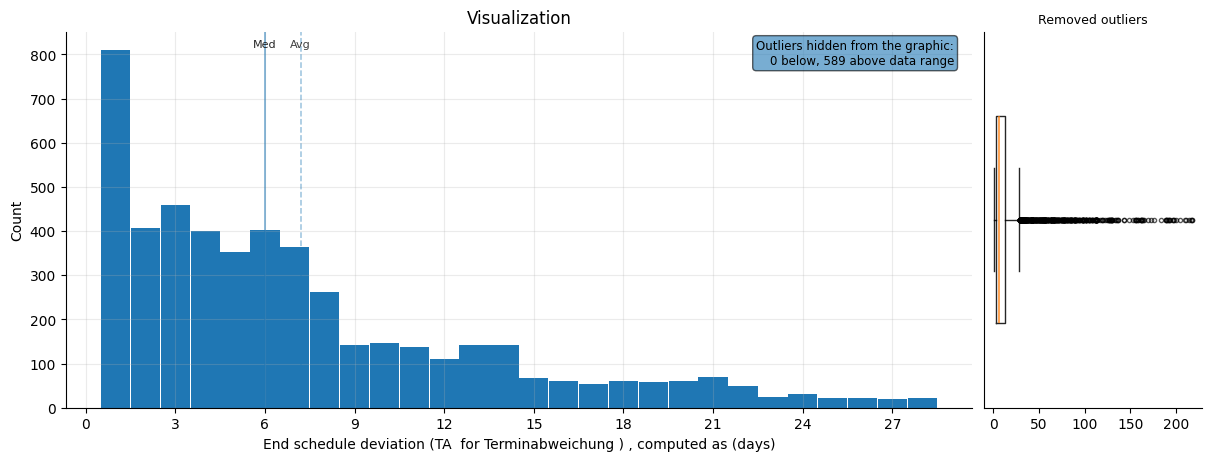


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Plot the distribution of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


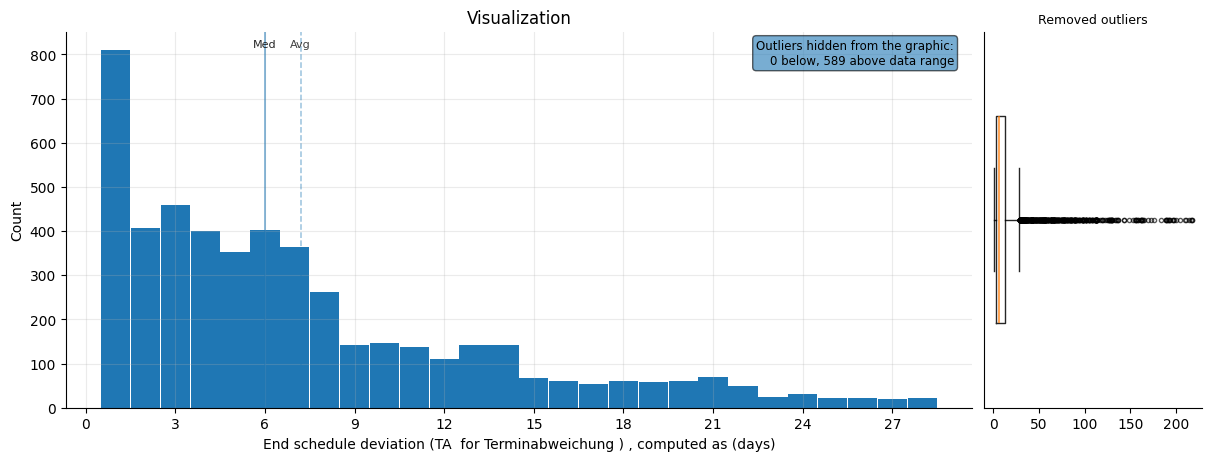


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


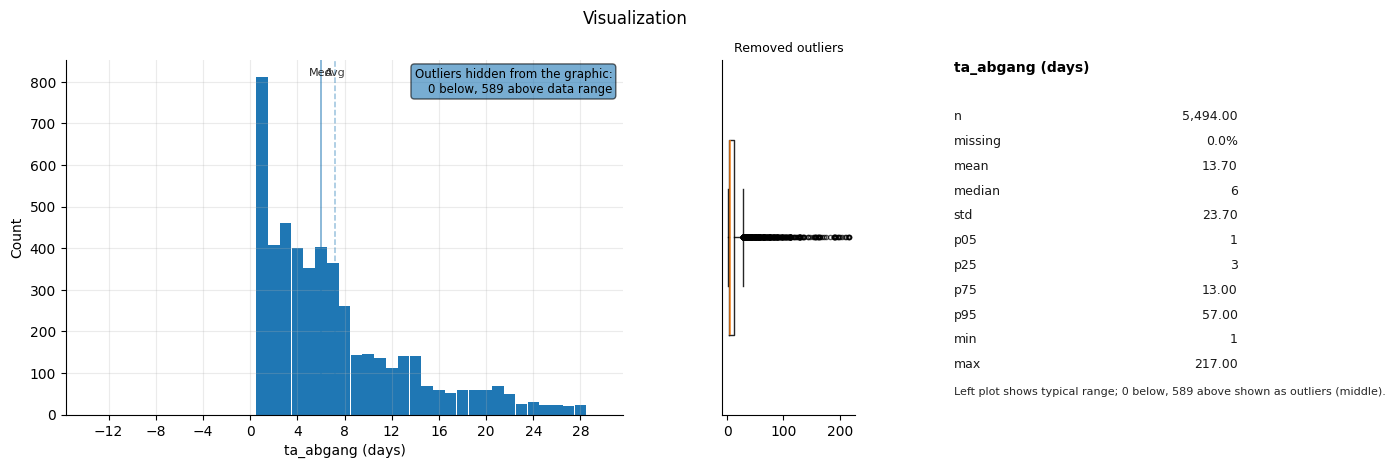


--- Summary ---
Generated analysis for: Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.

--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Provide a histogram-style view of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


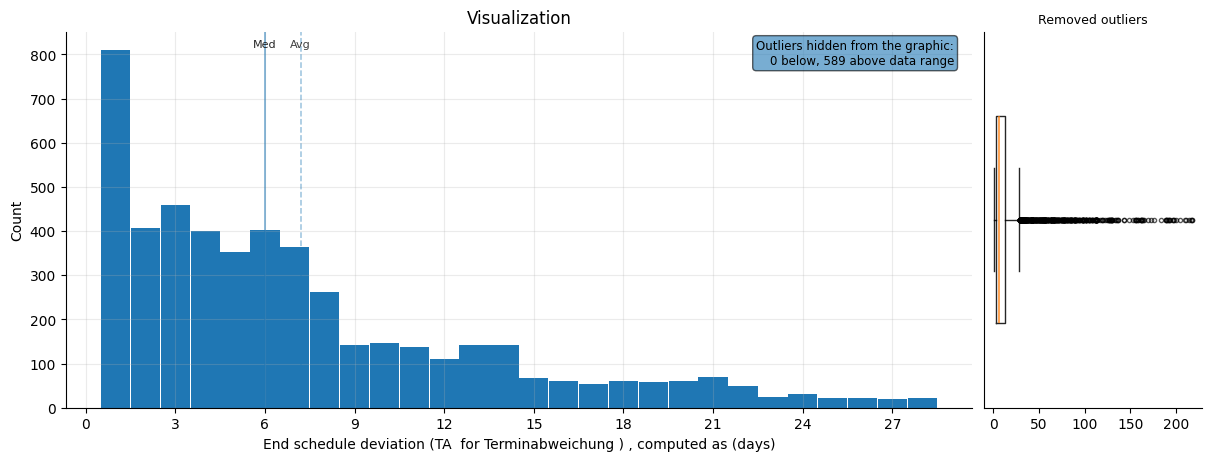


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Display the distribution of cycle time deviation for sawing operations with completion in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


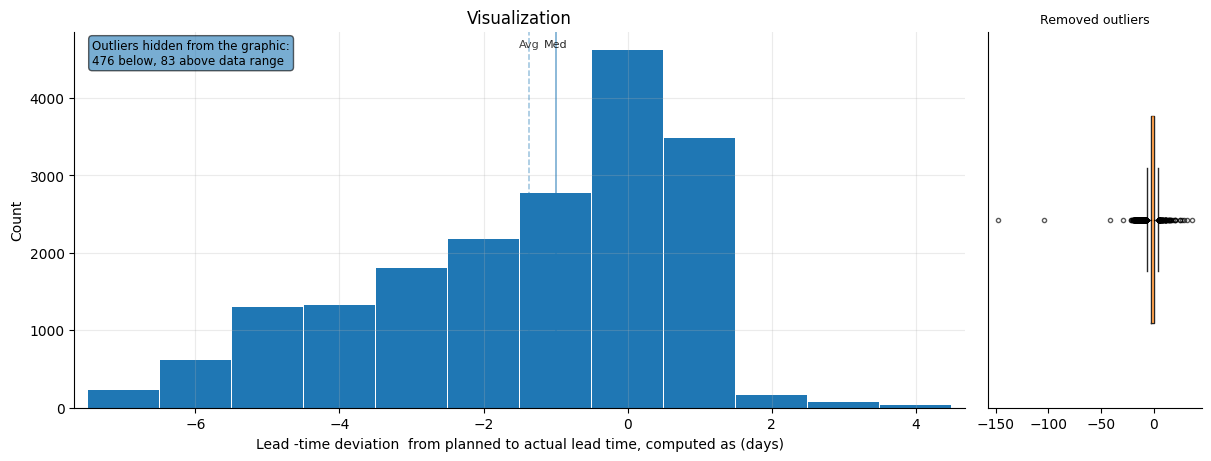


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of cycle time deviation for sawing operations with completion in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


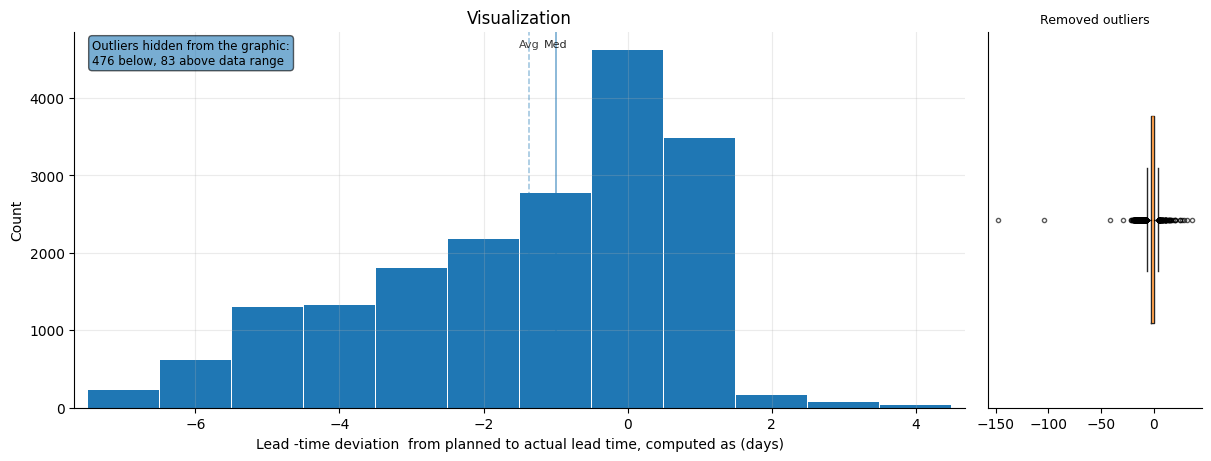


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Visualize the distribution of cycle time deviation for sawing operations completed in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


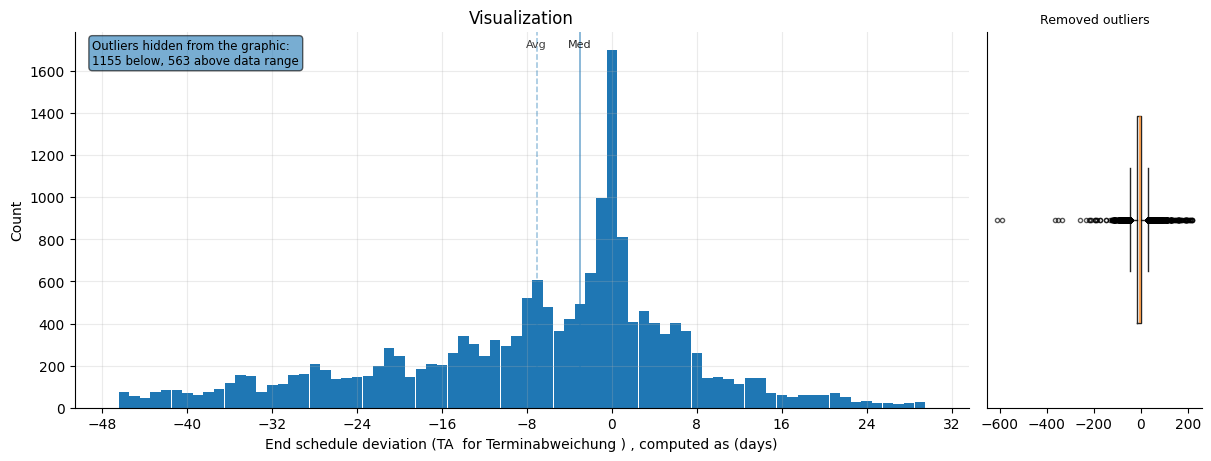


--- Summary ---
Computed distribution of ta_abgang (days): n=19164, mean≈-8.39, range≈[-613.00, 217.00].

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Plot cycle time deviation distribution for sawing operations with completion in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


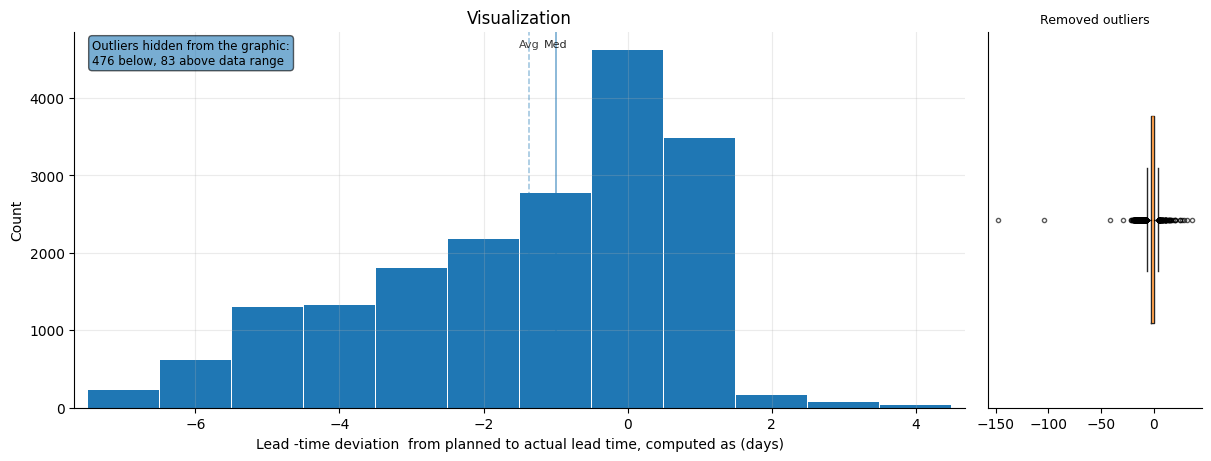


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show me a statistical summary of the cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Show me a statistical summary of the cycle times for ressource group Drahtschneiden.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide a statistical summary of the cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Provide a statistical summary of the cycle times for ressource group Drahtschneiden.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Give me summary statistics for the cycle times in ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Give me summary statistics for the cycle times in ressource group Drahtschneiden.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Display key statistics of cycles times for finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


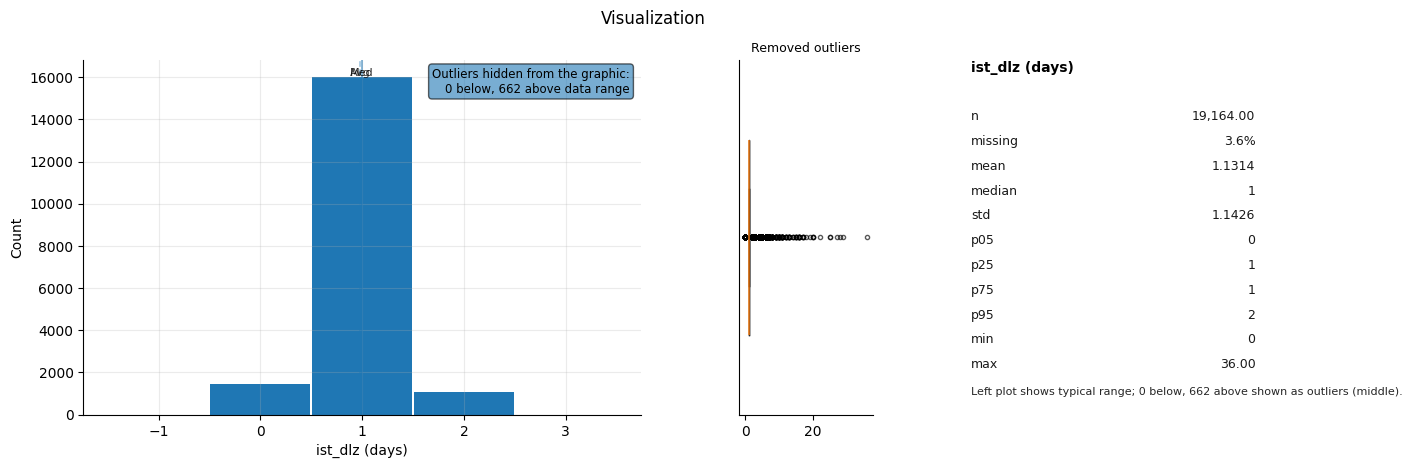


--- Summary ---
Generated analysis for: Display key statistics of cycles times for finished operations.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show key statistics of cycles times for finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


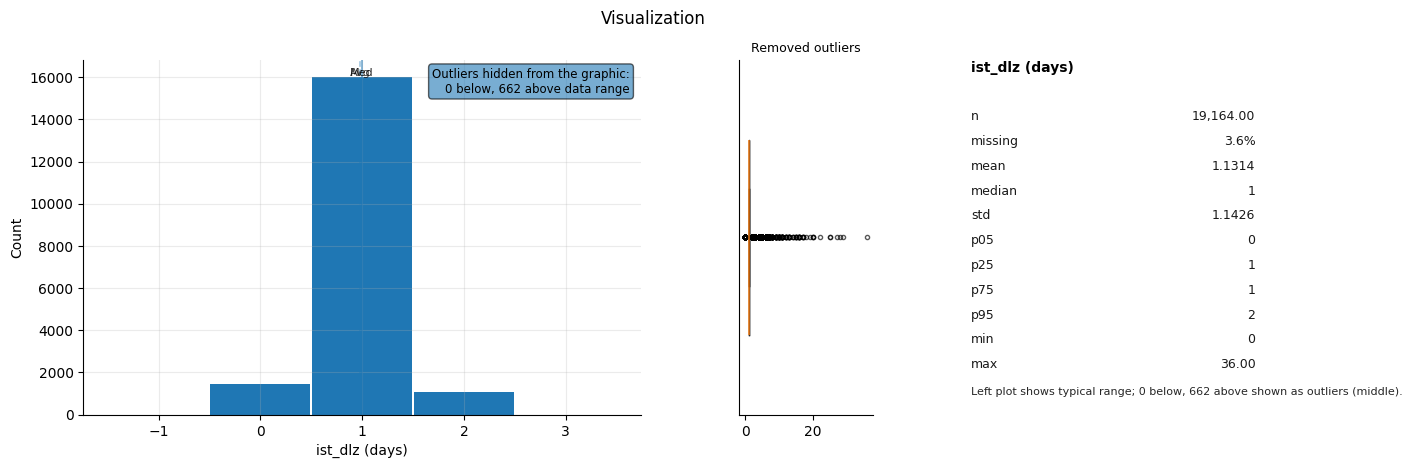


--- Summary ---
Generated analysis for: Show key statistics of cycles times for finished operations.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide key summary statistics for cycles times of finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


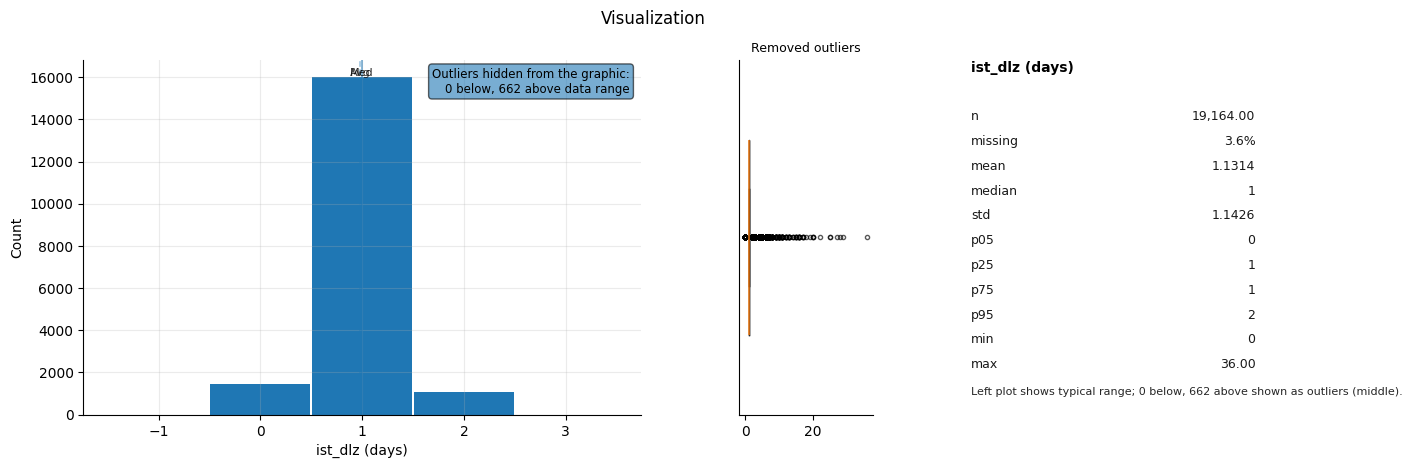


--- Summary ---
Generated analysis for: Provide key summary statistics for cycles times of finished operations.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Report the main descriptive statistics of cycles times for finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


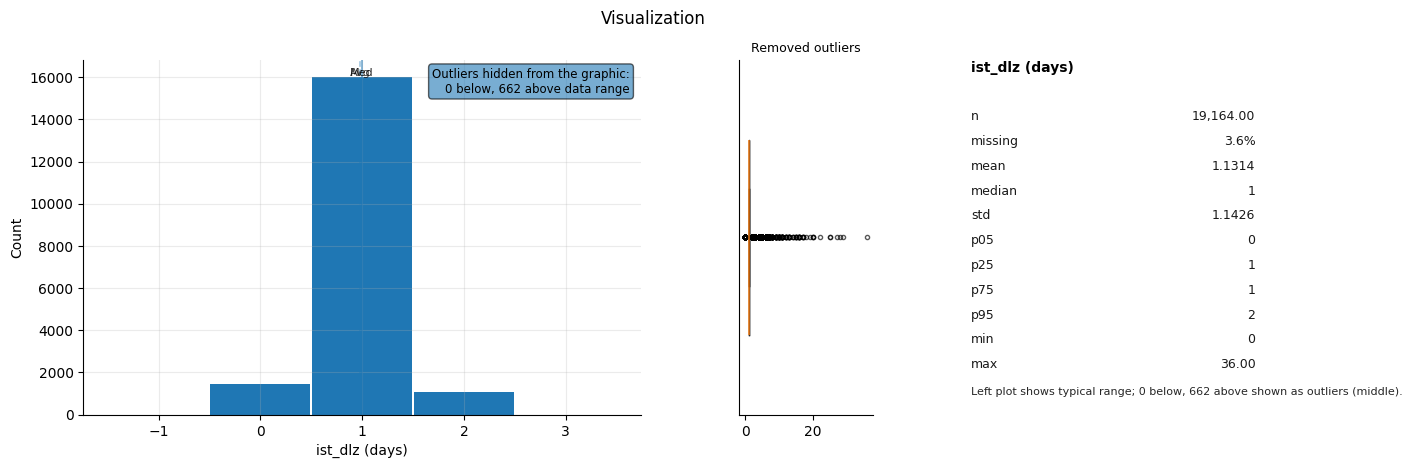


--- Summary ---
Generated analysis for: Report the main descriptive statistics of cycles times for finished operations.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What are average cycle times by ressource group for finished parts?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: What are average cycle times by ressource group for finished parts?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show average cycle times by ressource group for finished parts.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: Show average cycle times by ressource group for finished parts.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Compute the average cycle times by ressource group for finished parts.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: Compute the average cycle times by ressource group for finished parts.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Give me a breakdown of average cycle times per ressource group for finished parts.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: Give me a breakdown of average cycle times per ressource group for finished parts.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Compare max lead times across operation type for Fräsen Gruppe Kleinteile.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Compare max lead times across operation type for Fräsen Gruppe Kleinteile.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.

--- Output DF head() ---


time_bucket  avg_ta_zugang  n_records
0  2023-08-01    -477.500000          4
1  2024-01-01    -102.000000          3
2  2024-02-01    -103.000000         10
3  2024-03-01     -51.041667         24
4  2024-04-01     -25.028736        348


--- Run overview (inputs & key decisions) ---
Prompt: Over time, how is monthly start schedule deviation developing for function check operations?
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


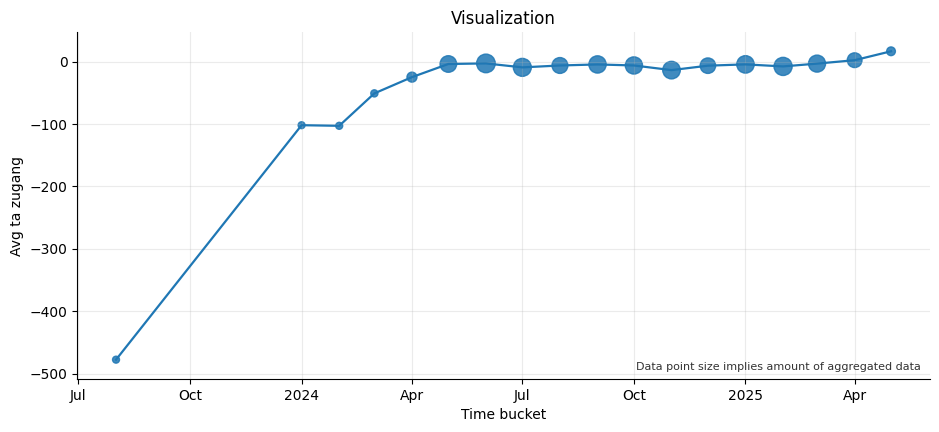


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 18 points; mean≈-45.01; Δend-start≈493.88).

--- Output DF head() ---


time_bucket  avg_ta_zugang  n_records
0  2023-08-01    -477.500000          4
1  2024-01-01    -102.000000          3
2  2024-02-01    -103.000000         10
3  2024-03-01     -51.041667         24
4  2024-04-01     -25.028736        348


--- Run overview (inputs & key decisions) ---
Prompt: Show how monthly start schedule deviation evolves over time for function check operations.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


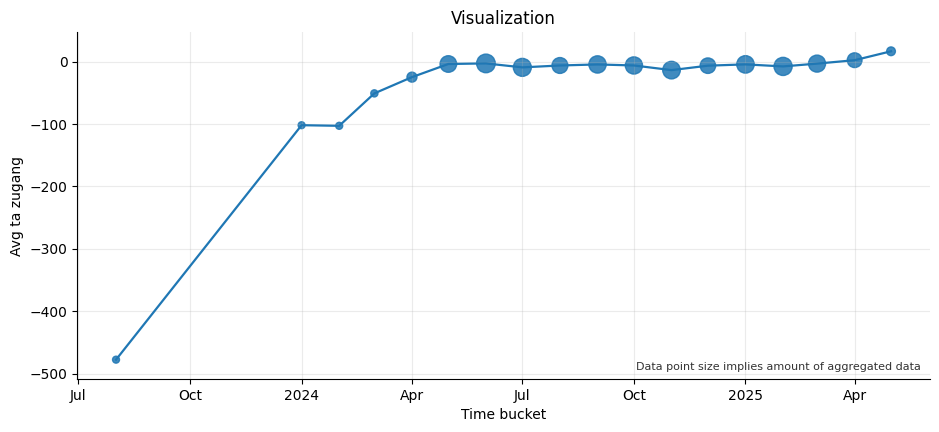


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 18 points; mean≈-45.01; Δend-start≈493.88).

--- Output DF head() ---


time_bucket  avg_ta_rel  n_records
0  2023-08-01   -2.750000          4
1  2024-01-01   -0.500000          2
2  2024-02-01   -2.454545         11
3  2024-03-01   -7.208333         24
4  2024-04-01   -1.640351        342


--- Run overview (inputs & key decisions) ---
Prompt: Plot the monthly start schedule deviation trend over time for function check operations.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/month; metrics=[avg_ta_rel(mean:ta_rel), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


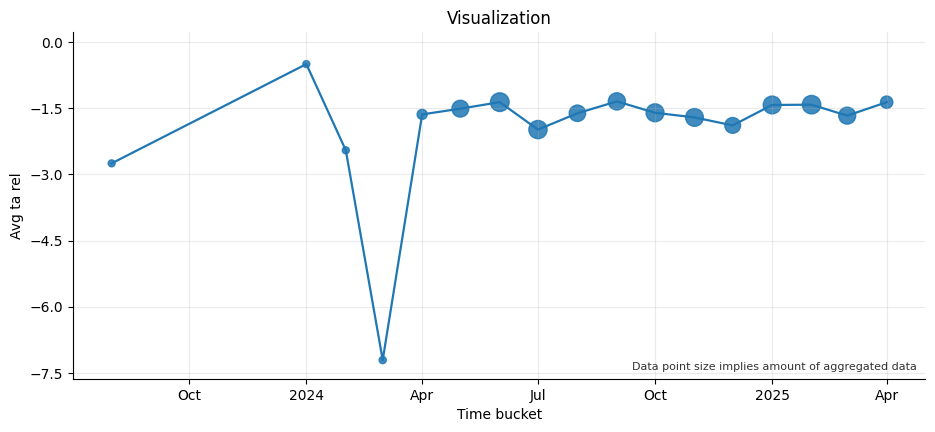


--- Summary ---
Computed monthly average avg_ta_rel by group (2023-08-01T00:00:00 → 2025-04-01T00:00:00, 17 points; mean≈-1.97; Δend-start≈1.39).

--- Output DF head() ---


time_bucket  avg_ta_zugang  n_records
0  2023-08-01    -477.500000          4
1  2024-01-01    -102.000000          3
2  2024-02-01    -103.000000         10
3  2024-03-01     -51.041667         24
4  2024-04-01     -25.028736        348


--- Run overview (inputs & key decisions) ---
Prompt: How does monthly start schedule deviation change over time for function check operations?
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


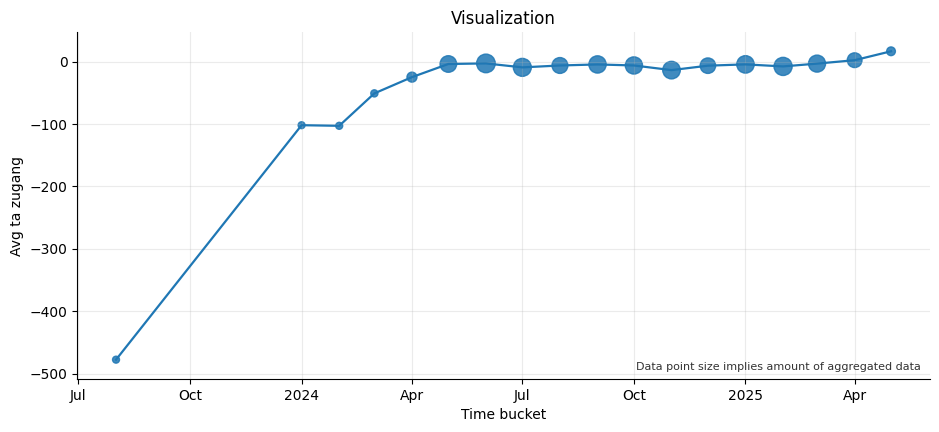


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 18 points; mean≈-45.01; Δend-start≈493.88).

--- Output DF head() ---


time_bucket  avg_ta_abgang  n_records
0  2023-08-07    -590.000000          1
1  2023-08-14    -613.000000          1
2  2023-08-21    -359.000000          2
3  2024-01-22     -99.000000          1
4  2024-01-29    -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Show me the trend for weekly end schedule deviations of operations in 2025.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


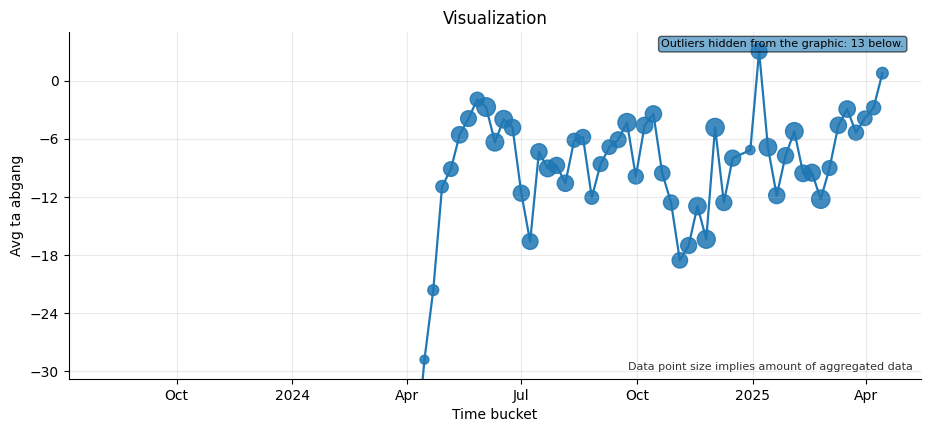


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---


time_bucket  avg_ta_abgang  n_records
0  2023-08-07    -590.000000          1
1  2023-08-14    -613.000000          1
2  2023-08-21    -359.000000          2
3  2024-01-22     -99.000000          1
4  2024-01-29    -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Plot the weekly end schedule deviations trend for operations in 2025.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


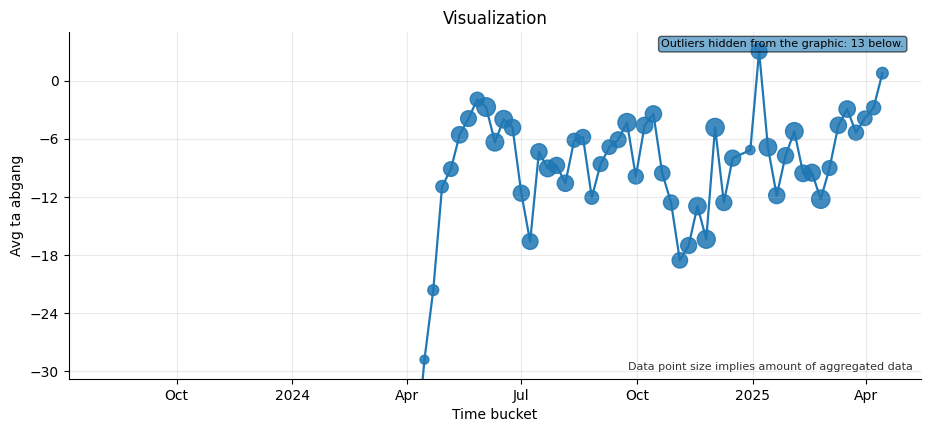


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Display how weekly end schedule deviations develop for operations in 2025.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


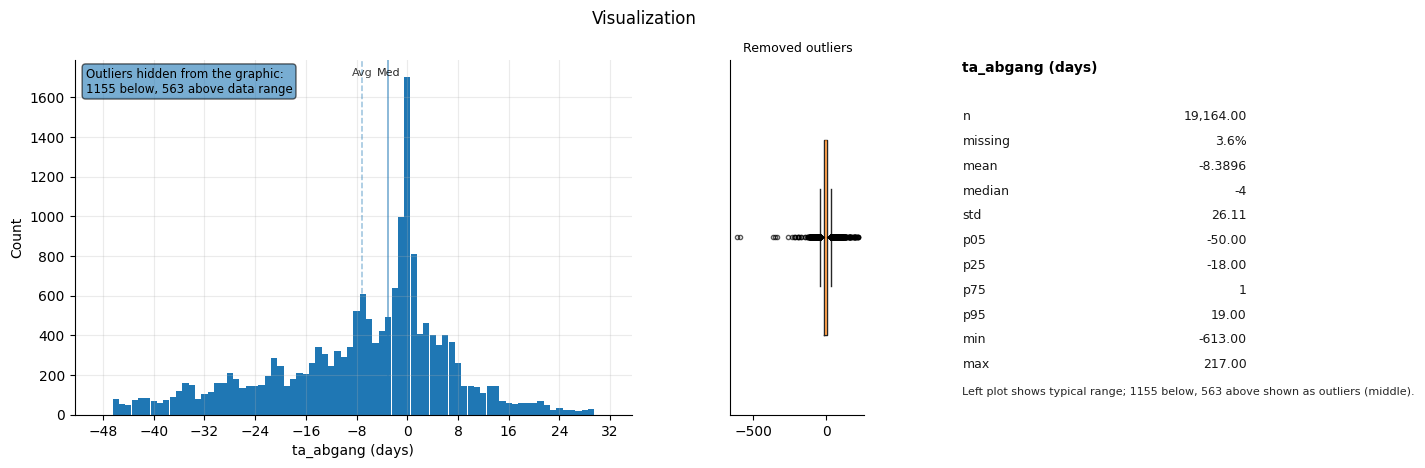


--- Summary ---
Generated analysis for: Display how weekly end schedule deviations develop for operations in 2025.

--- Output DF head() ---


time_bucket  avg_ta_abgang  n_records
0  2023-08-07    -590.000000          1
1  2023-08-14    -613.000000          1
2  2023-08-21    -359.000000          2
3  2024-01-22     -99.000000          1
4  2024-01-29    -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Visualize the weekly trend of end schedule deviations for operations in 2025.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


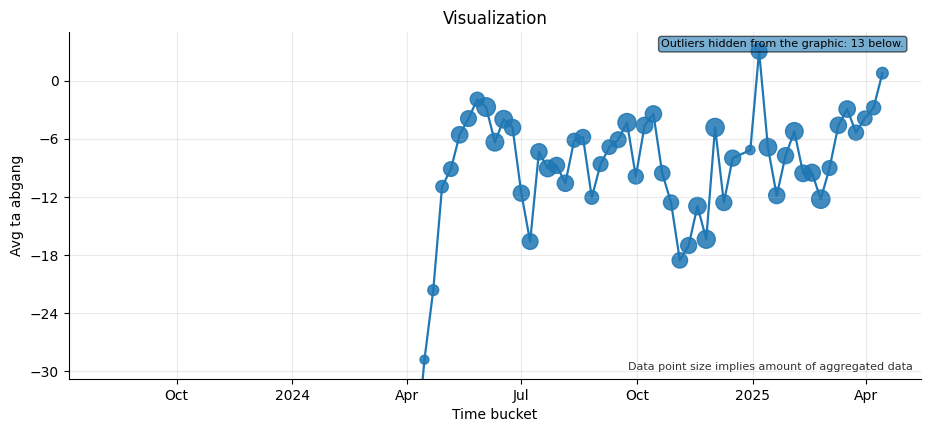


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang
0     NaN      NaN       19.0
1     NaN      NaN       17.0
2     NaN      NaN       13.0
3     NaN      NaN       85.0
4     NaN      NaN        8.0


--- Run overview (inputs & key decisions) ---
Prompt: How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


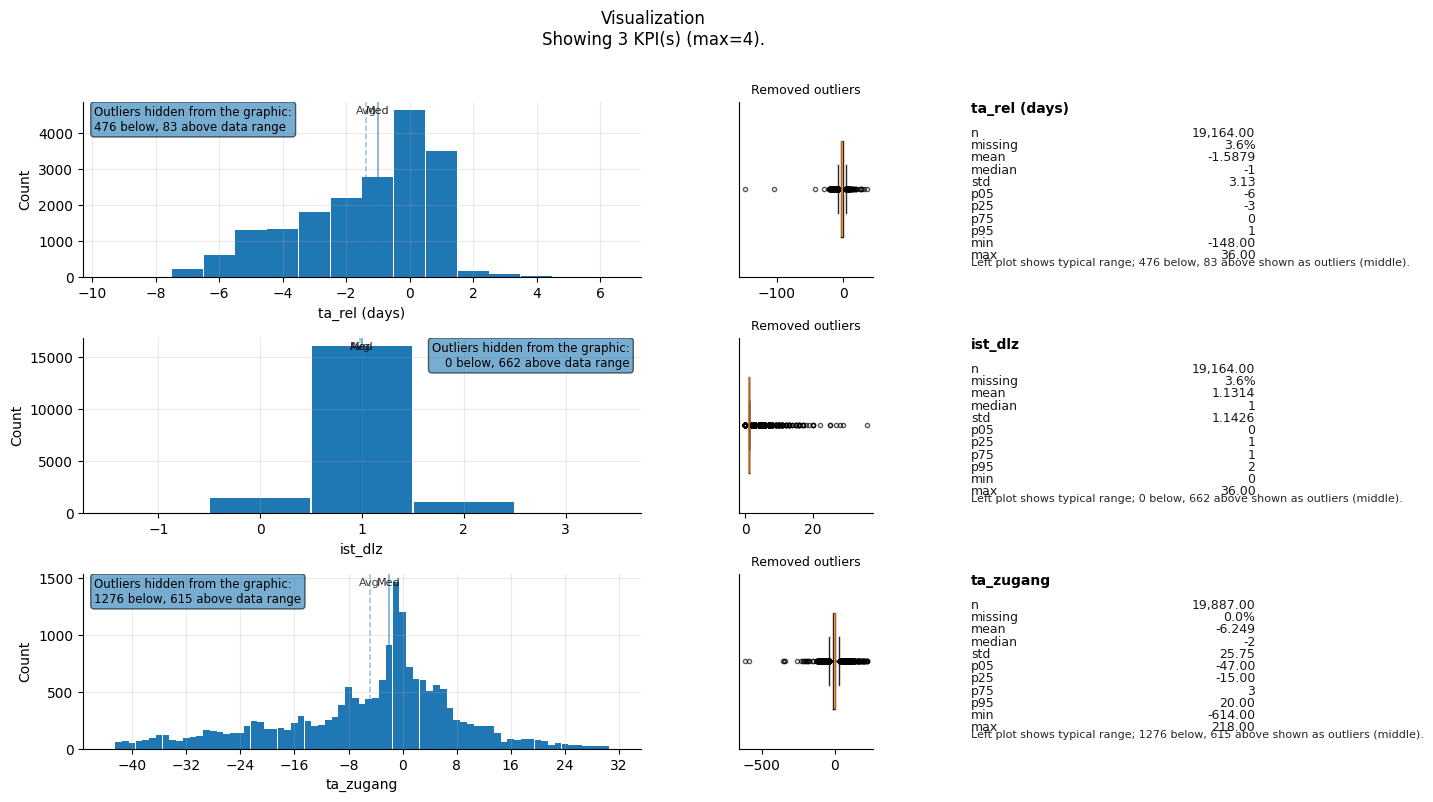


--- Summary ---
Generated analysis for: How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


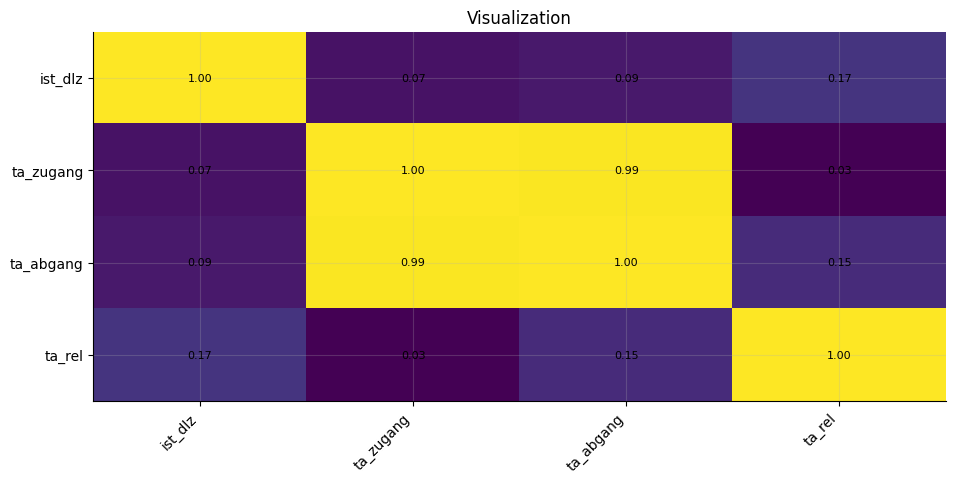


--- Summary ---
Generated analysis for: Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


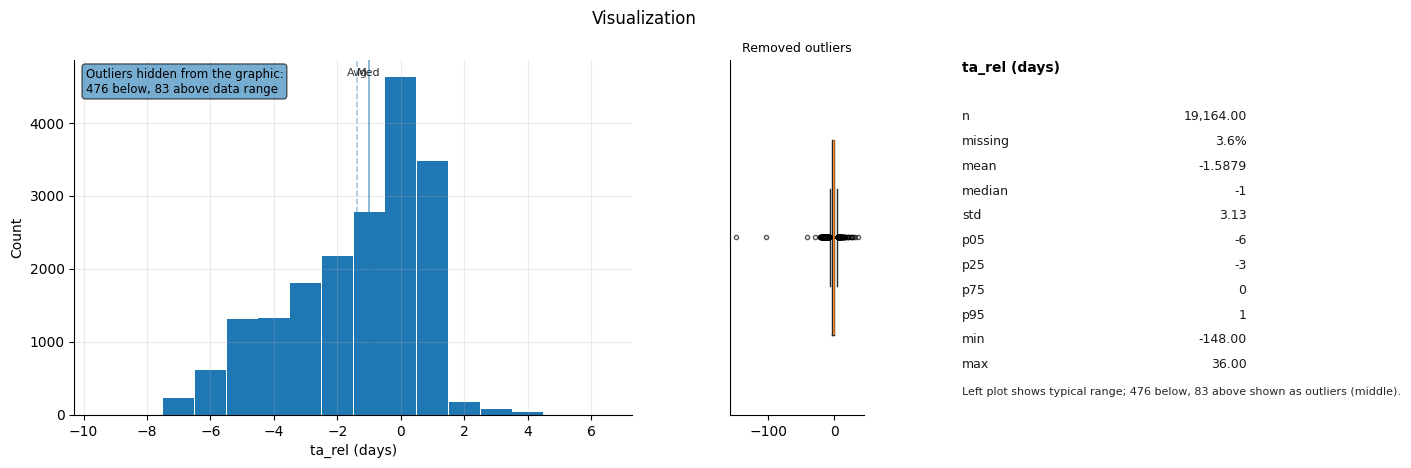


--- Summary ---
Generated analysis for: Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


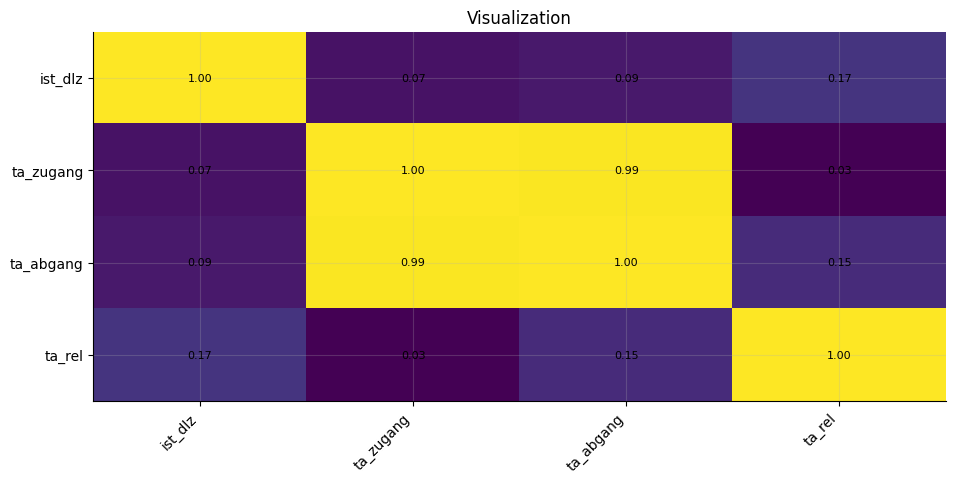


--- Summary ---
Generated analysis for: Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show me how the numerical values in the data are related to each other, finished operations only.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


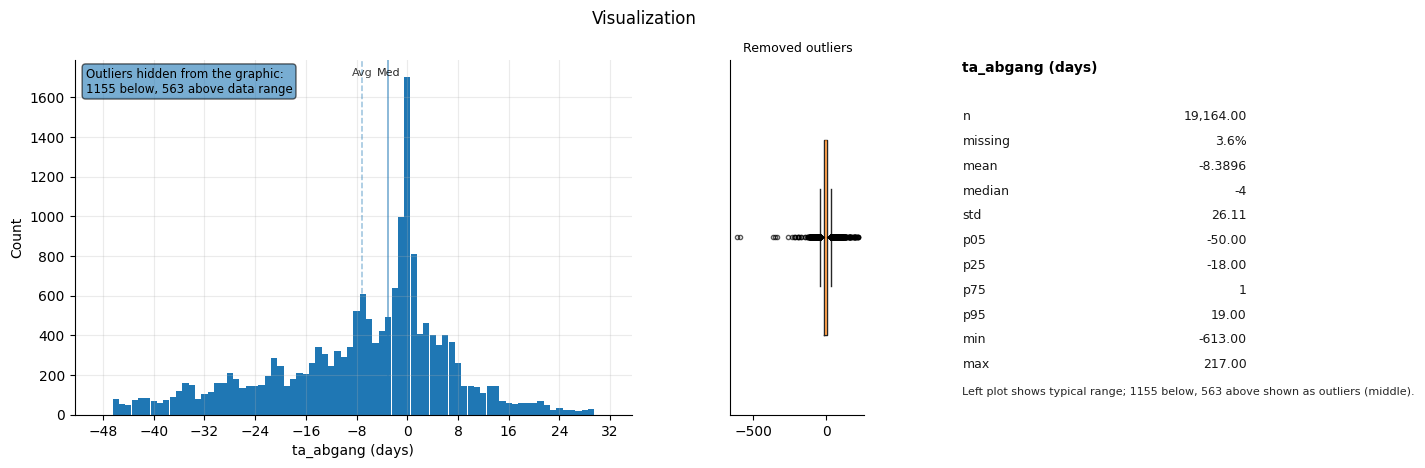


--- Summary ---
Generated analysis for: Show me how the numerical values in the data are related to each other, finished operations only.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: For finished operations only, show how the numerical values in the data relate to each other.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


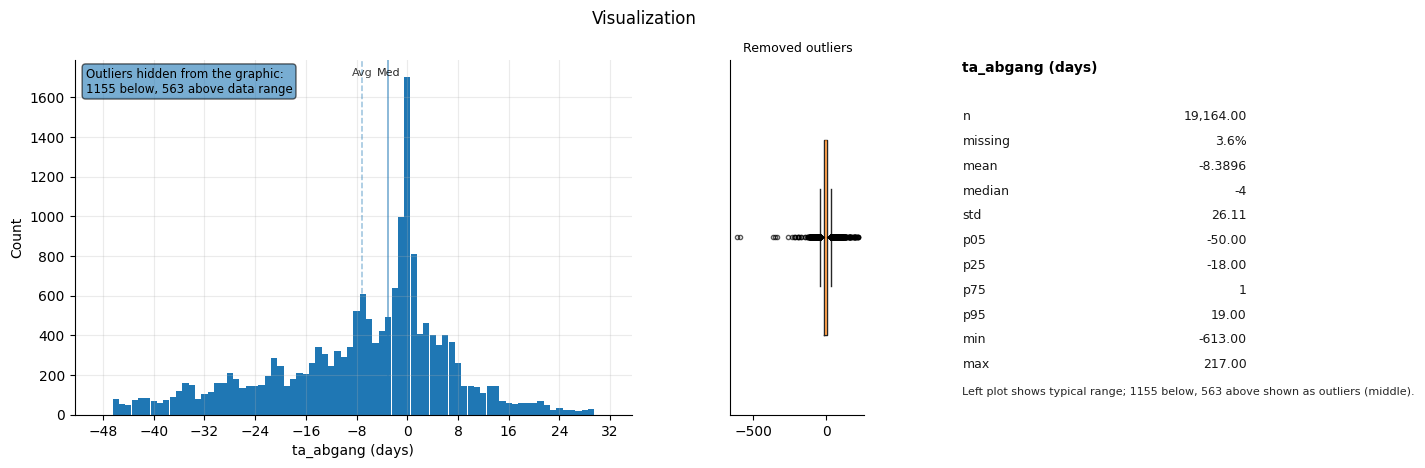


--- Summary ---
Generated analysis for: For finished operations only, show how the numerical values in the data relate to each other.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Create an overview of relationships among the numerical values, finished operations only.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


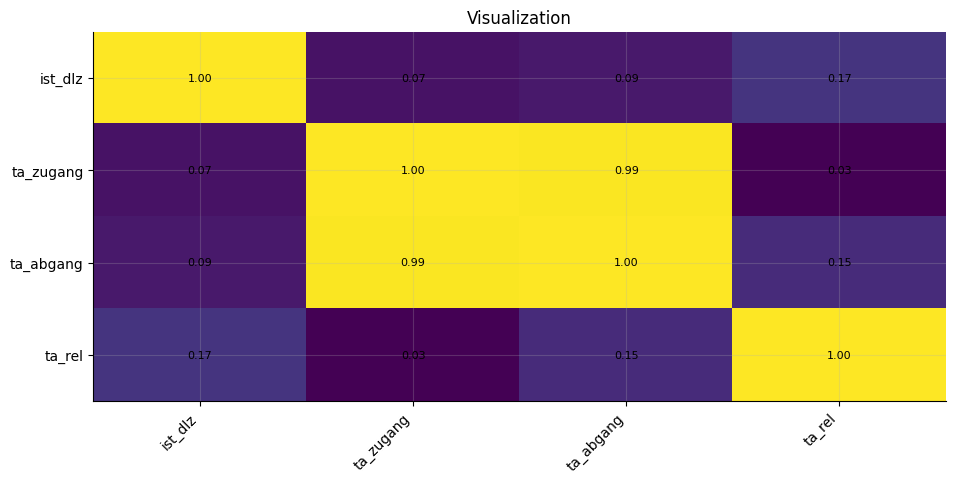


--- Summary ---
Generated analysis for: Create an overview of relationships among the numerical values, finished operations only.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: For finished operations only, visualize relationships between the numerical values in the data.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


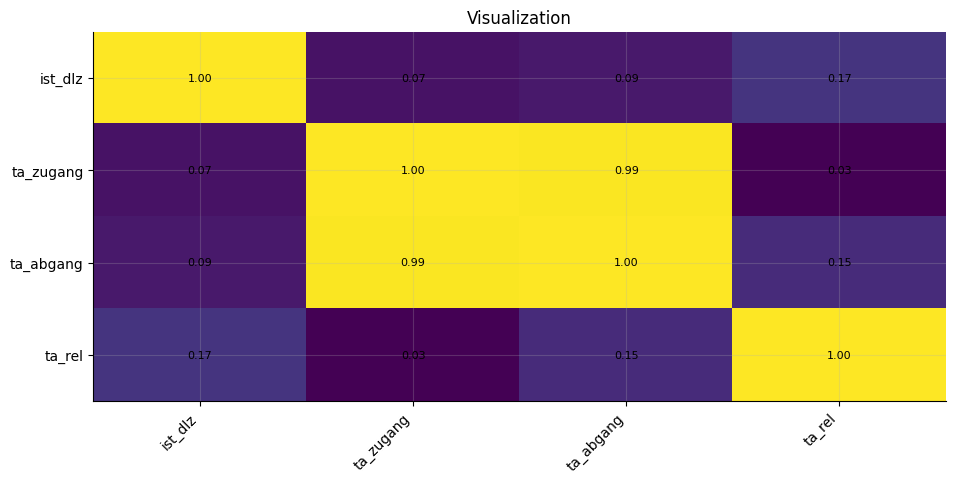


--- Summary ---
Generated analysis for: For finished operations only, visualize relationships between the numerical values in the data.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What are the main drivers for end-dates being higher or lower? Only operations in 2024.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


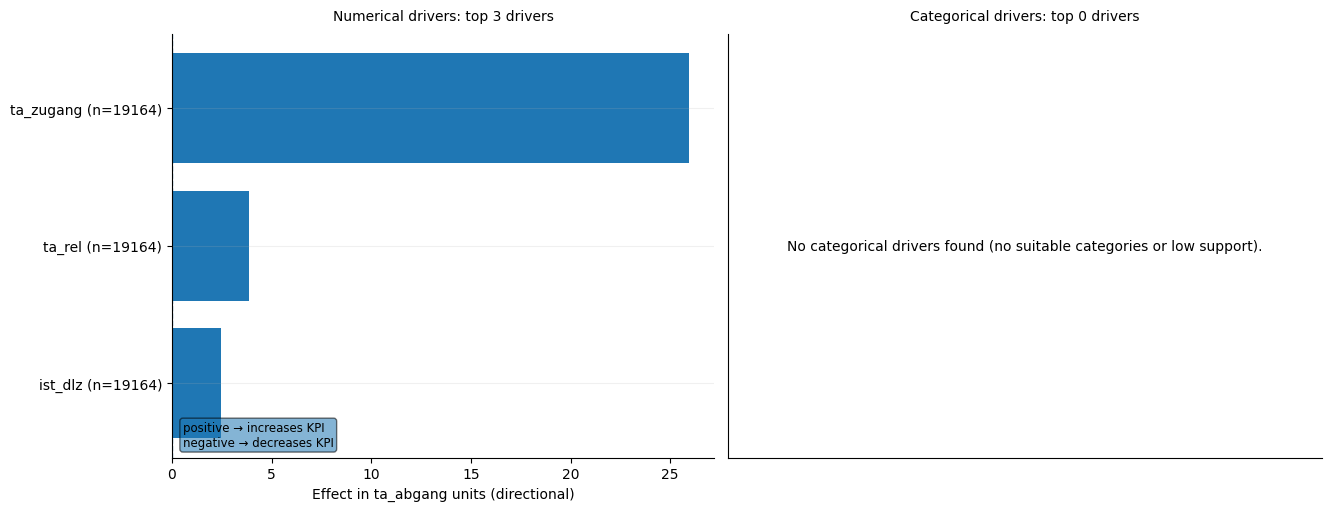


--- Summary ---
Generated analysis for: What are the main drivers for end-dates being higher or lower? Only operations in 2024.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify the main drivers for end-dates being higher or lower, only operations in 2024.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


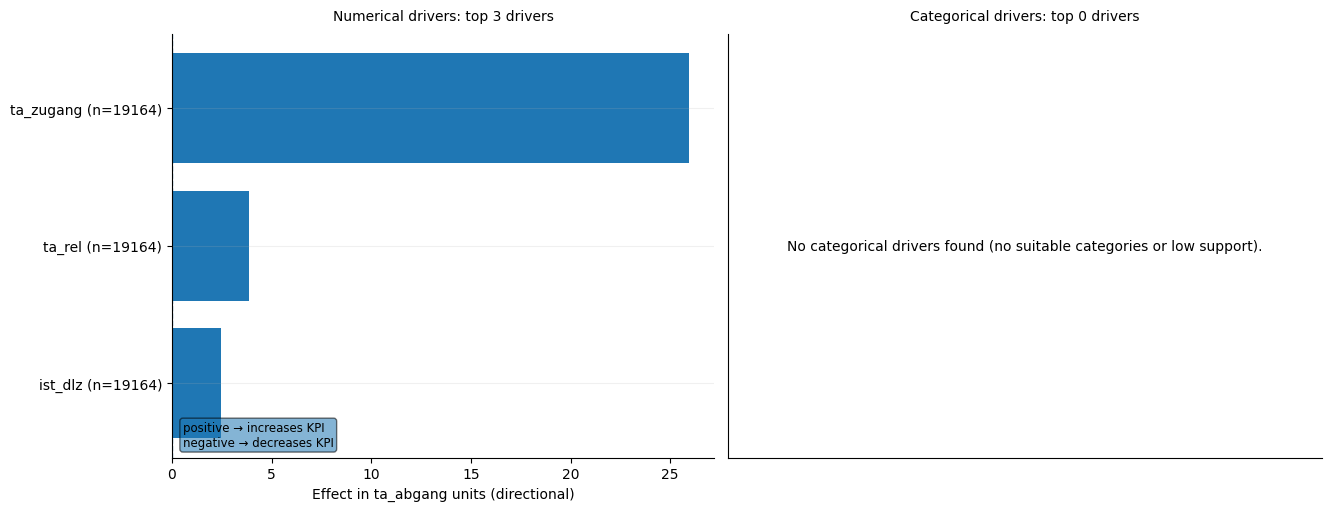


--- Summary ---
Generated analysis for: Identify the main drivers for end-dates being higher or lower, only operations in 2024.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: For only operations in 2024, what factors are driving end-dates to be higher or lower?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


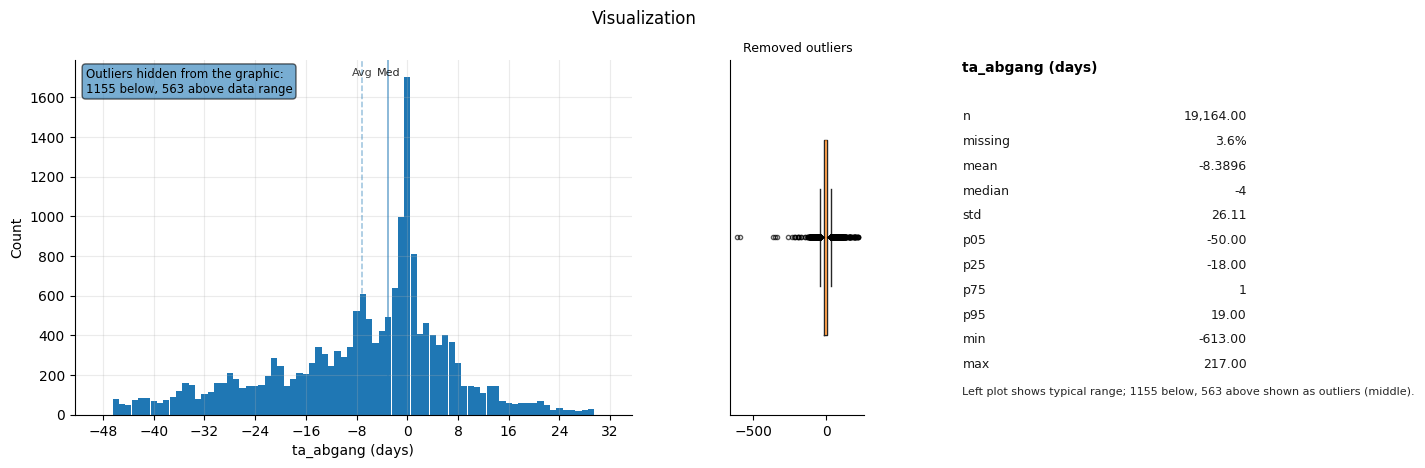


--- Summary ---
Generated analysis for: For only operations in 2024, what factors are driving end-dates to be higher or lower?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


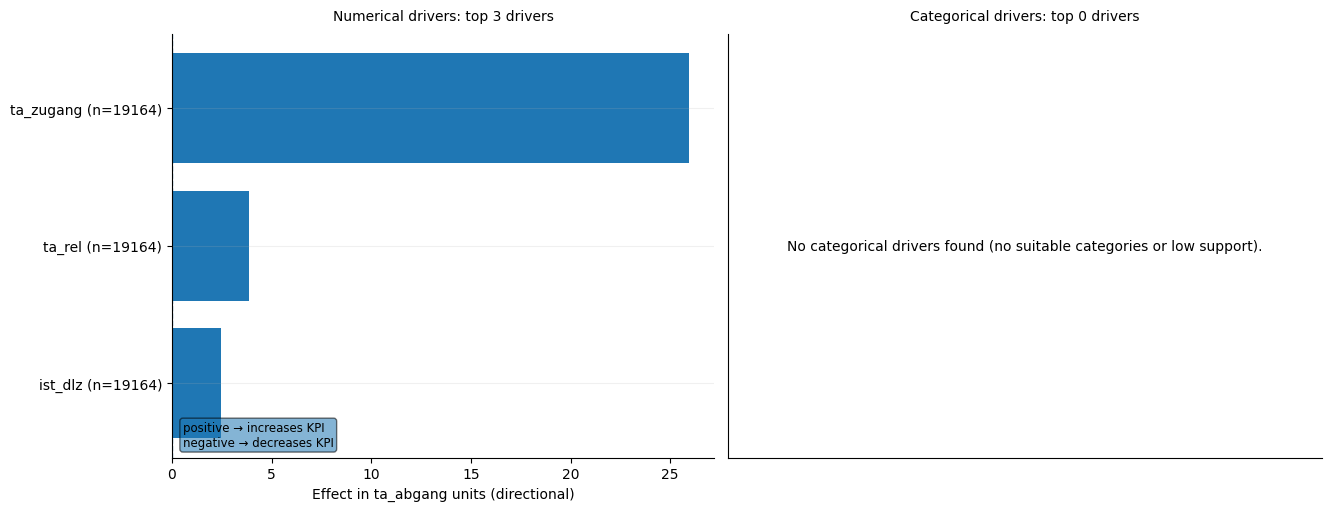


--- Summary ---
Generated analysis for: Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which drivers affected lead times for assembly operations?
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


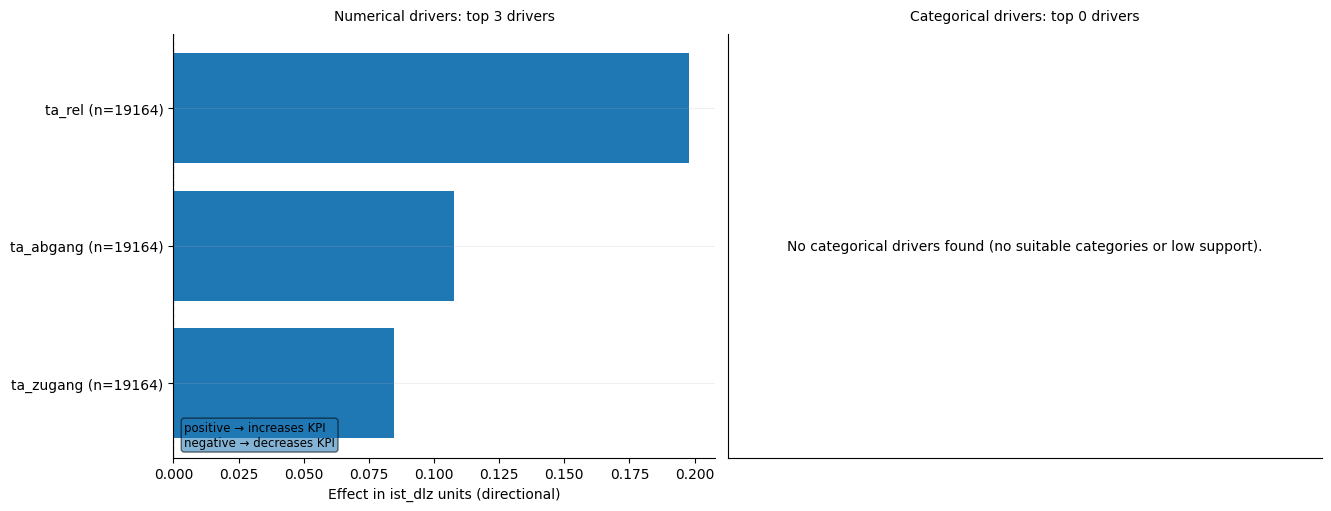


--- Summary ---
Generated analysis for: Which drivers affected lead times for assembly operations?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify which drivers affected lead times for assembly operations.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


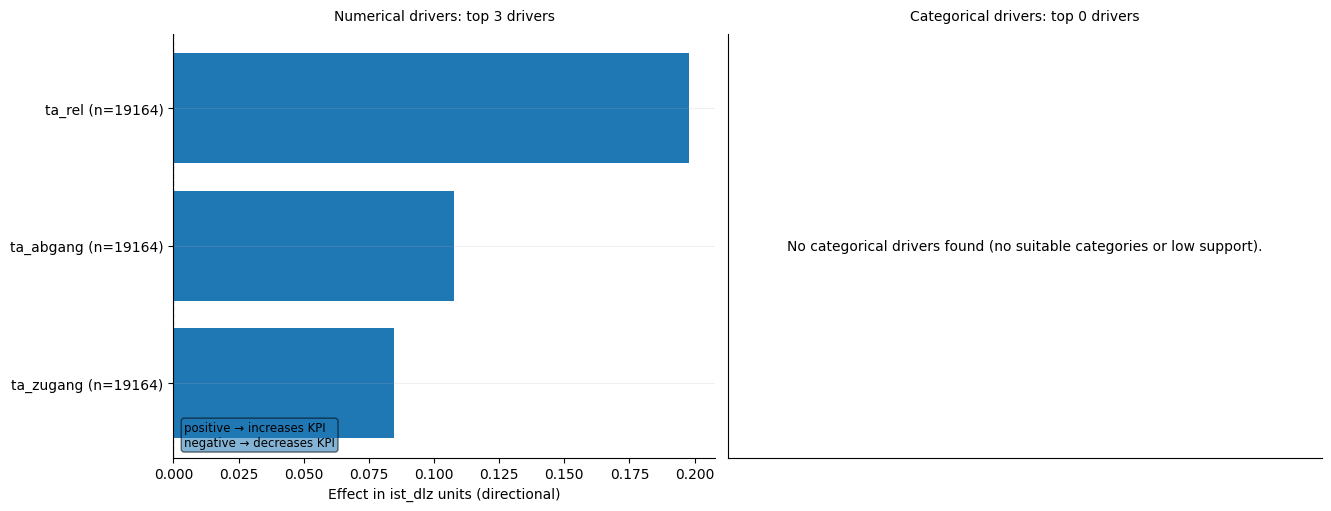


--- Summary ---
Generated analysis for: Identify which drivers affected lead times for assembly operations.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: What factors are driving lead times for assembly operations?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


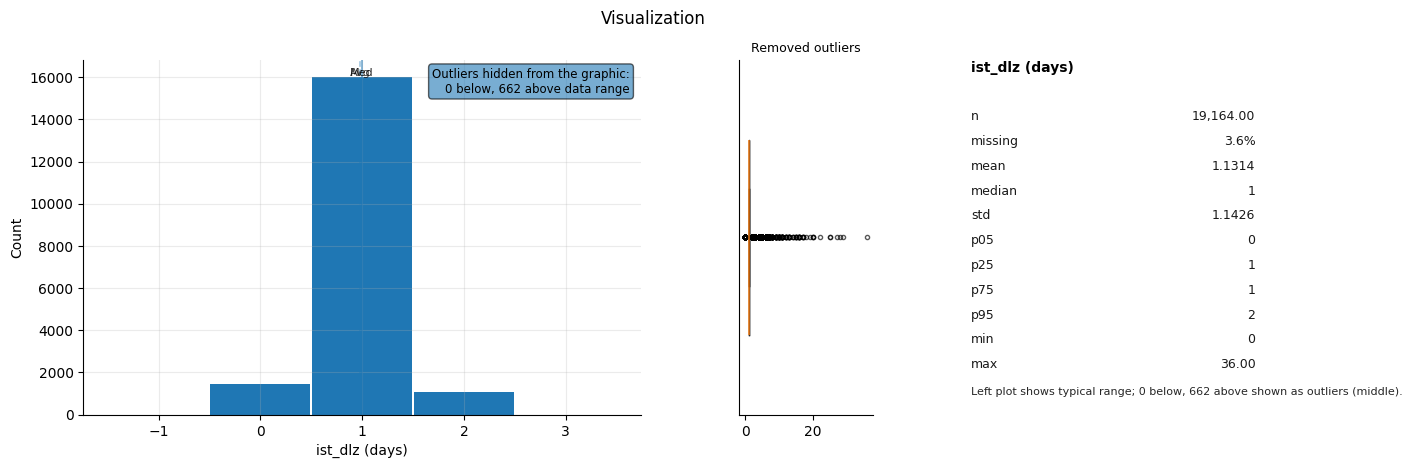


--- Summary ---
Generated analysis for: What factors are driving lead times for assembly operations?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the key drivers influencing lead times for assembly operations.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


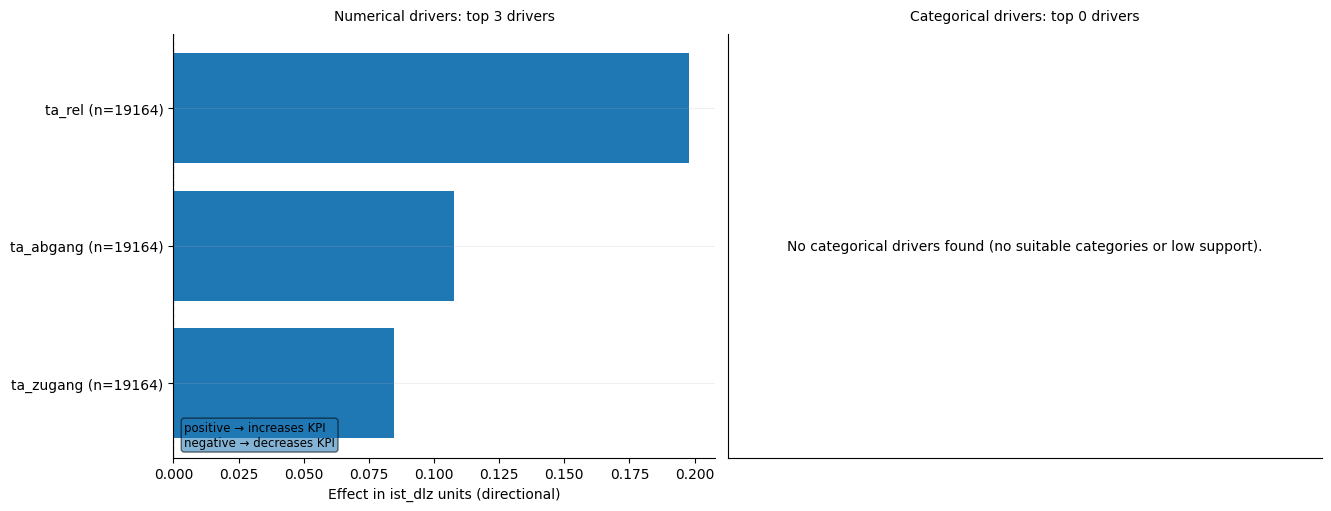


--- Summary ---
Generated analysis for: Show the key drivers influencing lead times for assembly operations.
[ERROR] block 13 base: cannot convert the series to <class 'float'>
[ERROR] block 13 alt1: cannot convert the series to <class 'float'>
[ERROR] block 13 alt2: cannot convert the series to <class 'float'>

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate the weekly average end-date deviation over the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


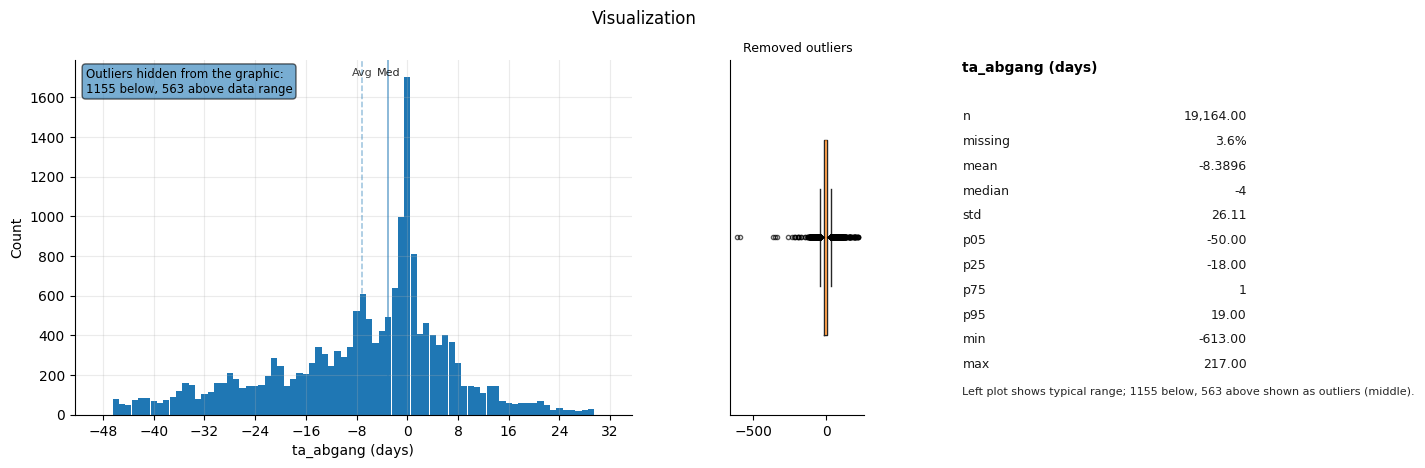


--- Summary ---
Generated analysis for: Estimate the weekly average end-date deviation over the next 6 weeks.

--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: Show me how the maximum start deviation will change for the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


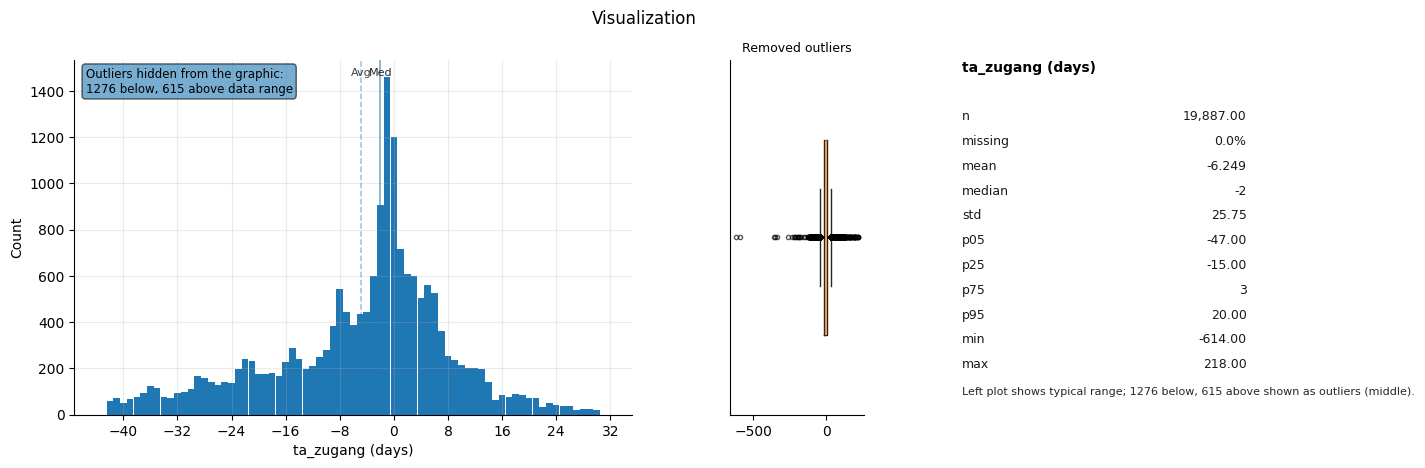


--- Summary ---
Generated analysis for: Show me how the maximum start deviation will change for the next 6 weeks.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Forecast how the maximum start deviation will change for the next 6 weeks.
Family: predictive (confidence=0.35)
Type: forecasting (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Forecast how the maximum start deviation will change for the next 6 weeks.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the change in maximum start deviation for the next 6 weeks.
Family: predictive (confidence=0.35)
Type: forecasting (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Predict the change in maximum start deviation for the next 6 weeks.

--- Output DF head() ---


time_bucket  avg_ta_rel  n_records
0  2023-08-01   -2.750000          4
1  2024-01-01   -0.500000          2
2  2024-02-01   -2.454545         11
3  2024-03-01   -7.208333         24
4  2024-04-01   -1.640351        342


--- Run overview (inputs & key decisions) ---
Prompt: Display the expected trend of maximum start deviation for the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/month; metrics=[avg_ta_rel(mean:ta_rel), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


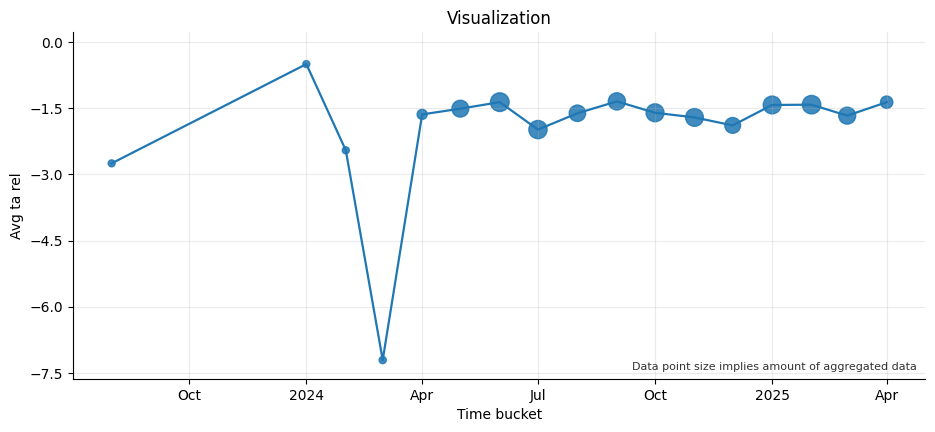


--- Summary ---
Computed monthly average avg_ta_rel by group (2023-08-01T00:00:00 → 2025-04-01T00:00:00, 17 points; mean≈-1.97; Δend-start≈1.39).

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


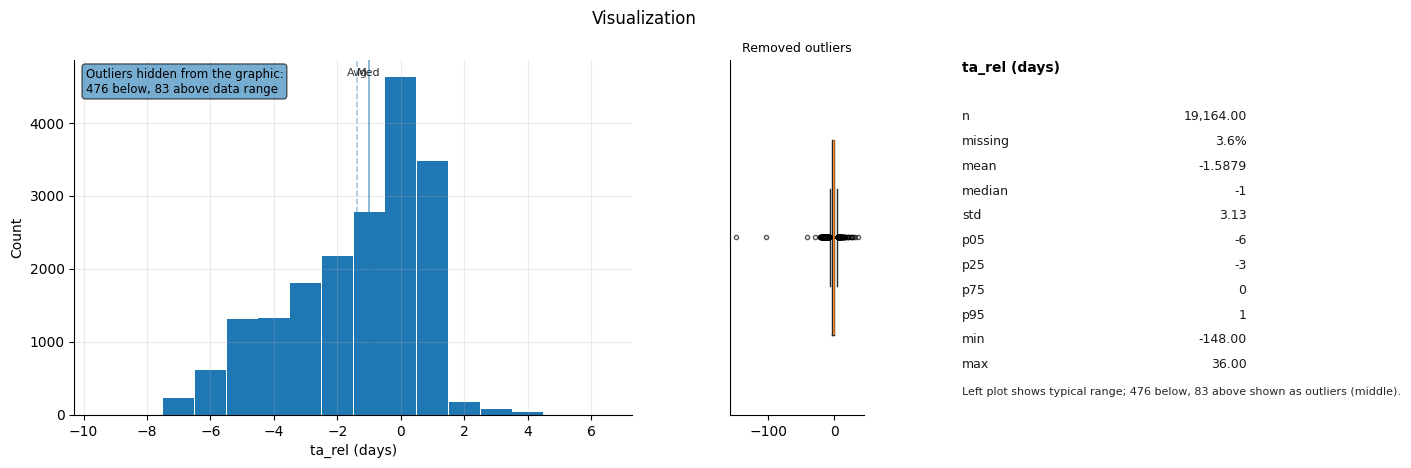


--- Summary ---
Generated analysis for: What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


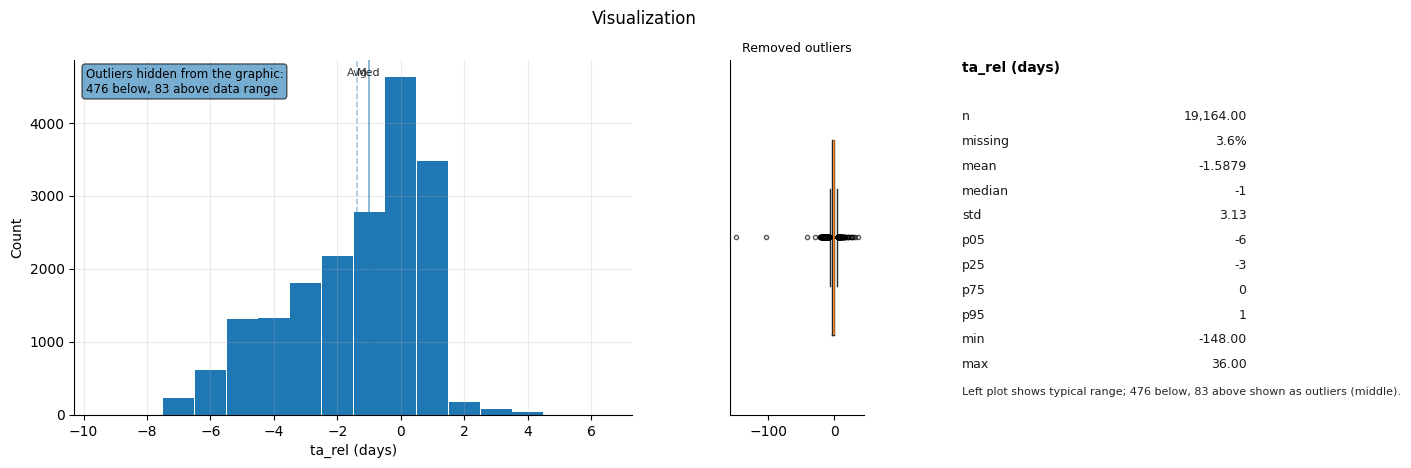


--- Summary ---
Generated analysis for: Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


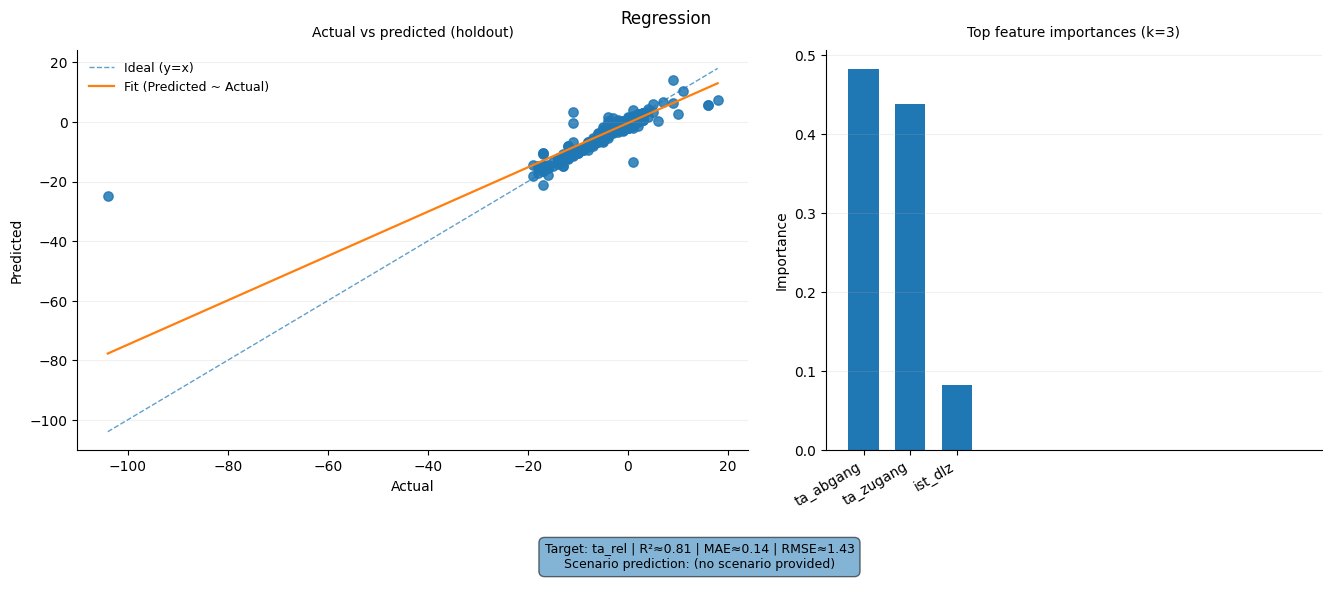


--- Summary ---
Generated analysis for: Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


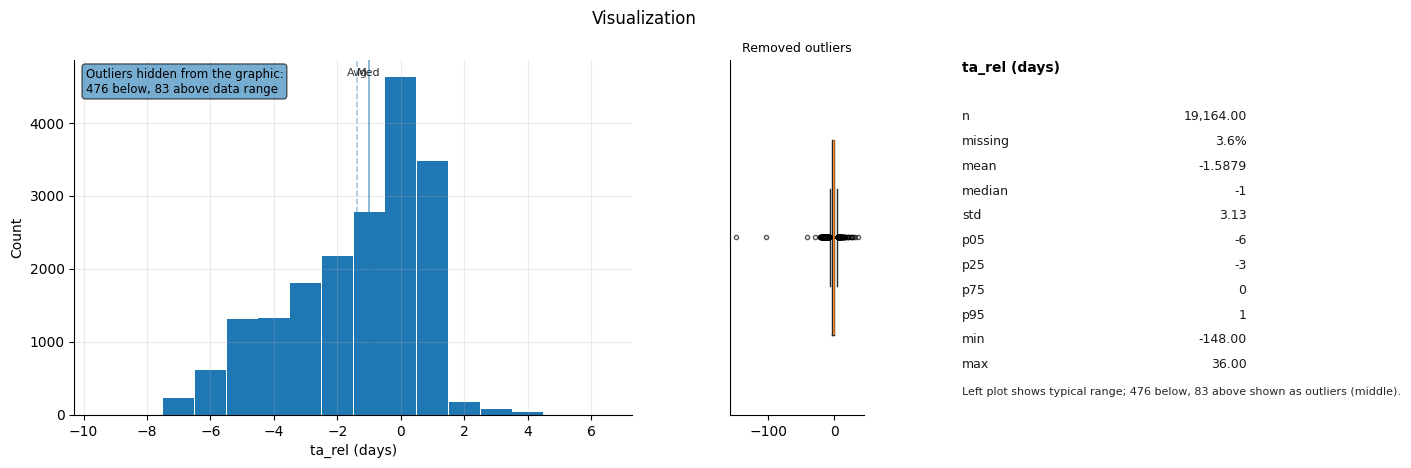


--- Summary ---
Generated analysis for: Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


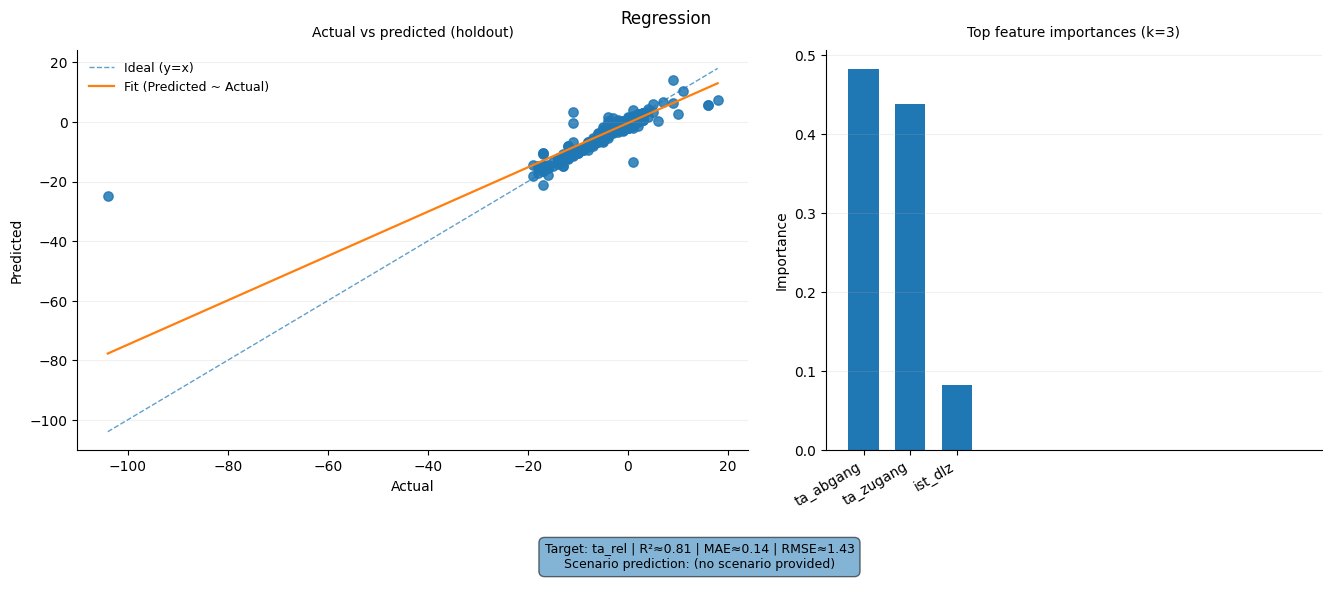


--- Summary ---
Generated analysis for: If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


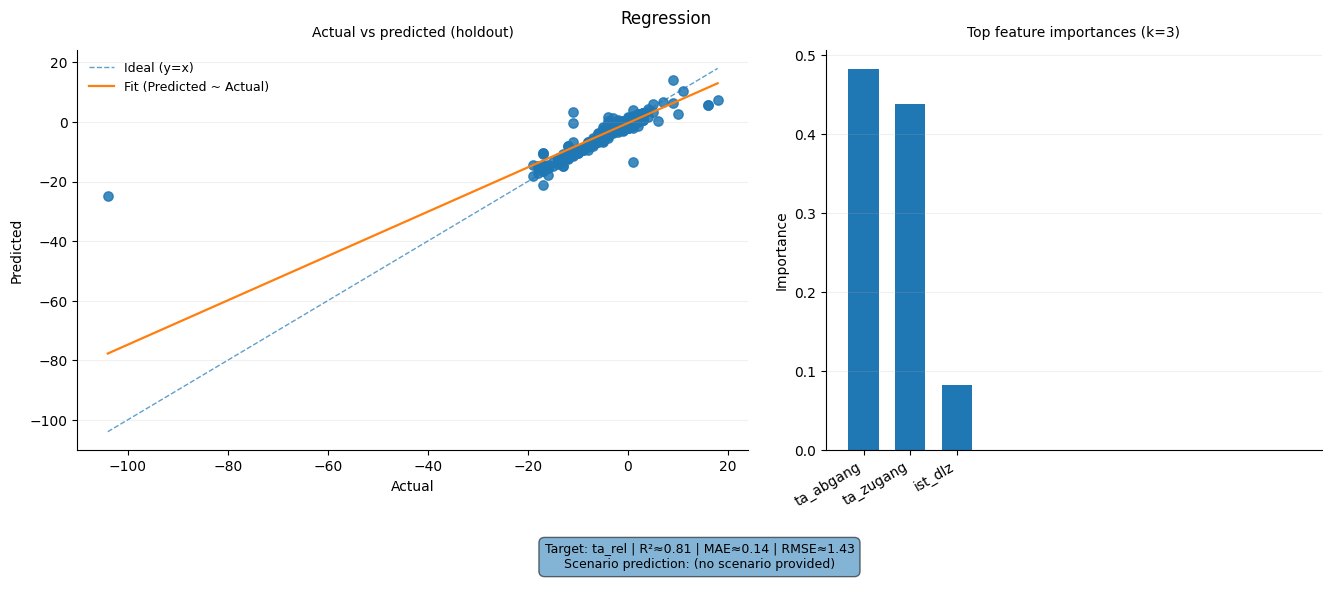


--- Summary ---
Generated analysis for: Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


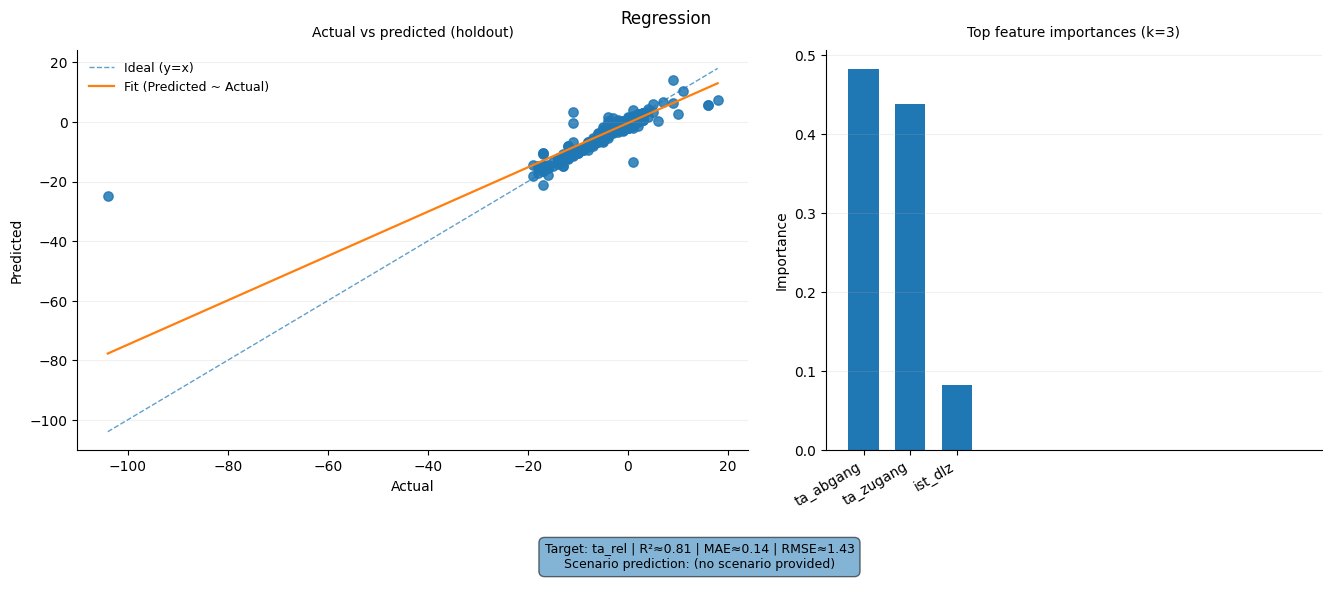


--- Summary ---
Generated analysis for: What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


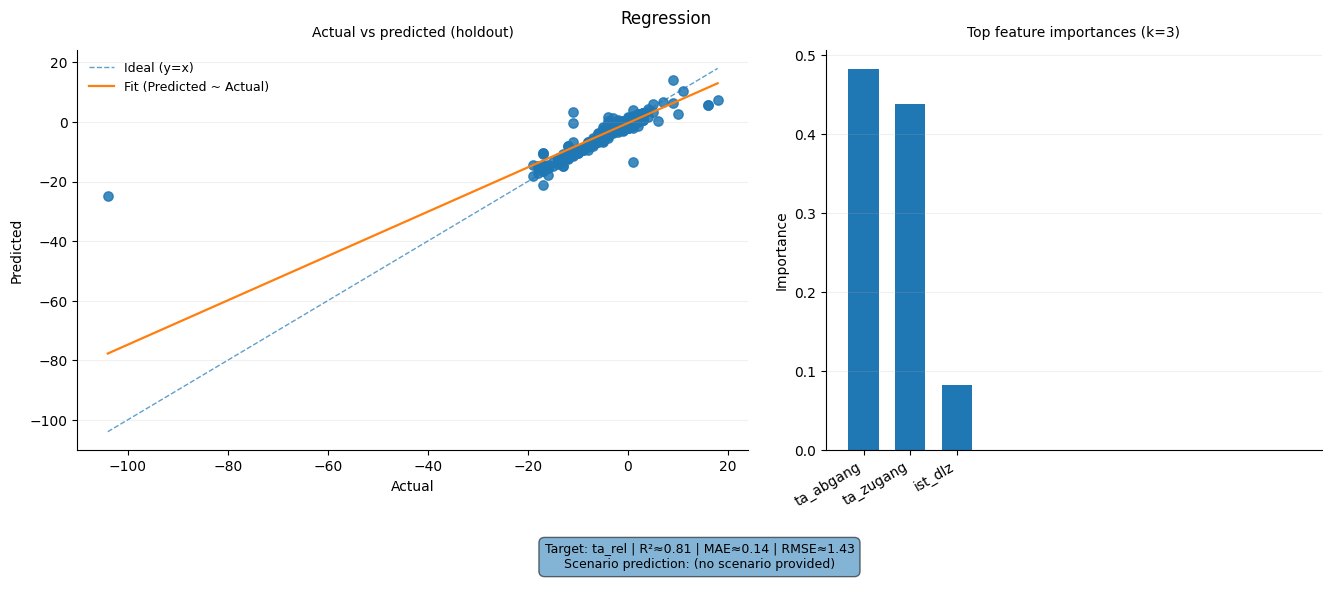


--- Summary ---
Generated analysis for: Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


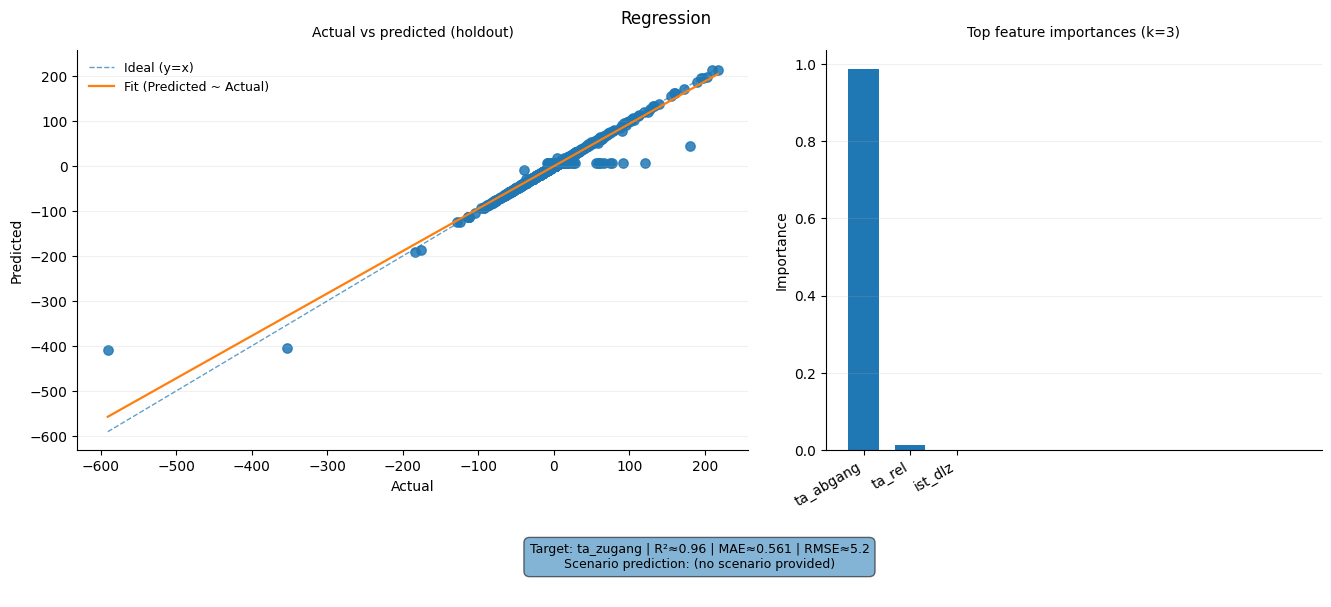


--- Summary ---
Generated analysis for: Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


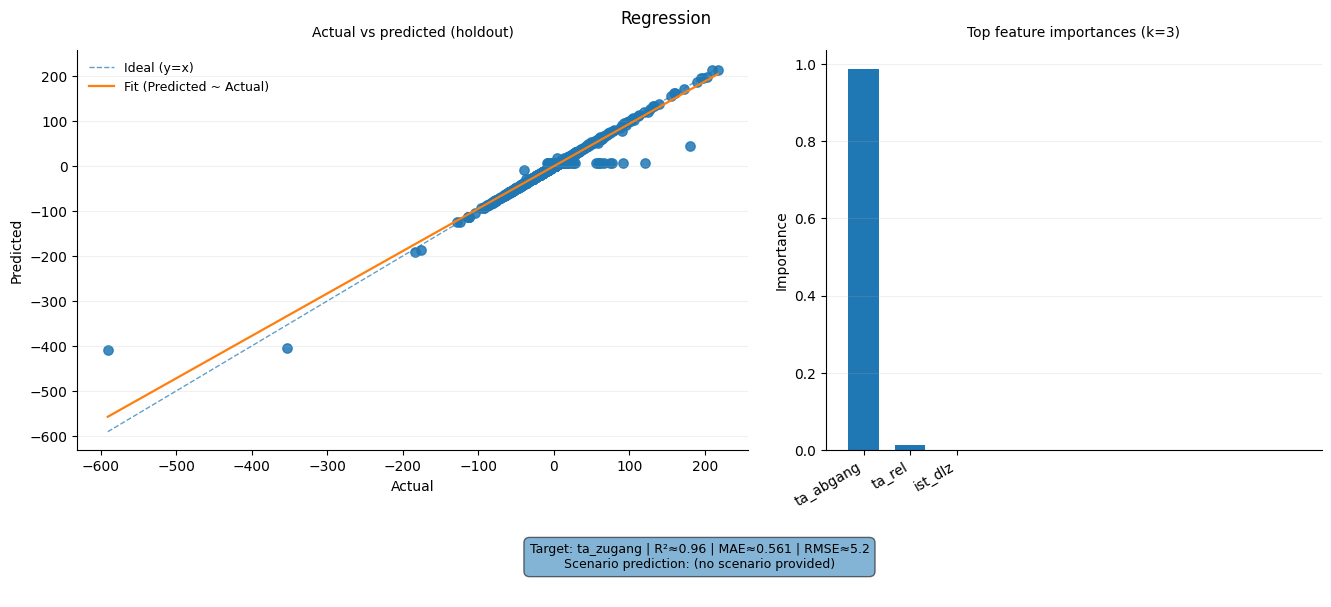


--- Summary ---
Generated analysis for: What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?.

--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


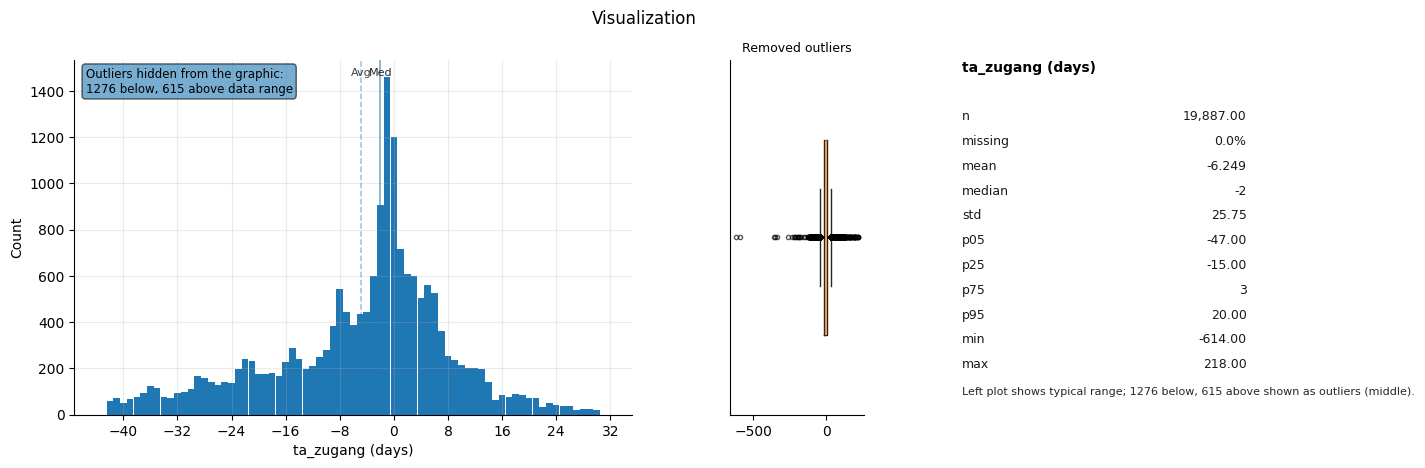


--- Summary ---
Generated analysis for: Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


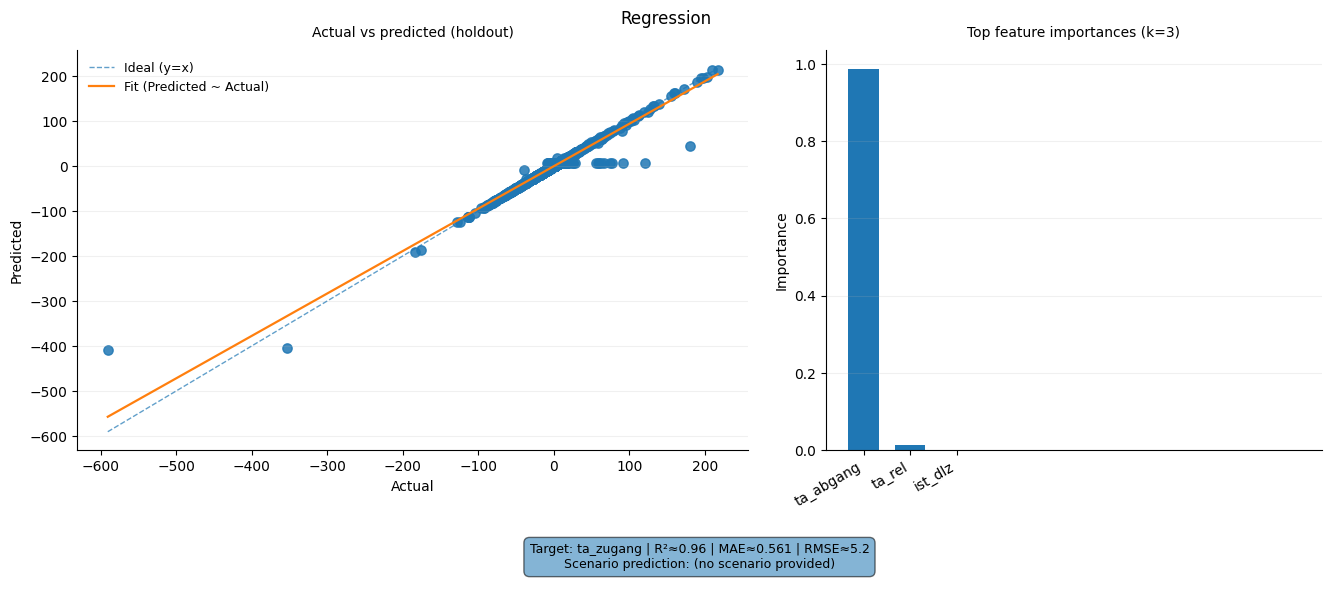


--- Summary ---
Generated analysis for: Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.

--- Output DF head() ---


status            ta_status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend  TA nicht erreichbar       19.0      NaN        NaN     NaN
1  laufend  TA nicht erreichbar       17.0      NaN        NaN     NaN
2  laufend  TA nicht erreichbar       13.0      NaN        NaN     NaN
3  laufend  TA nicht erreichbar       85.0      NaN        NaN     NaN
4  laufend  TA nicht erreichbar        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


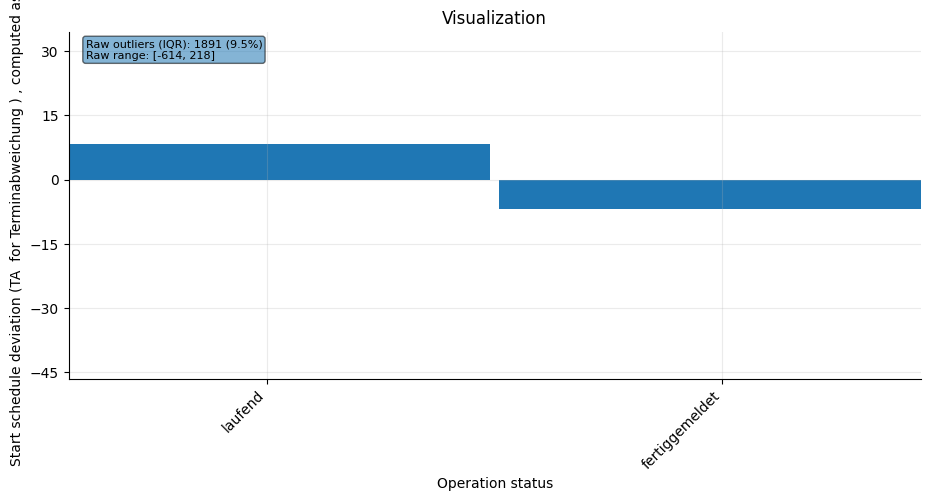


--- Summary ---
Generated analysis for: Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.

--- Output DF head() ---


status            ta_status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend  TA nicht erreichbar       19.0      NaN        NaN     NaN
1  laufend  TA nicht erreichbar       17.0      NaN        NaN     NaN
2  laufend  TA nicht erreichbar       13.0      NaN        NaN     NaN
3  laufend  TA nicht erreichbar       85.0      NaN        NaN     NaN
4  laufend  TA nicht erreichbar        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


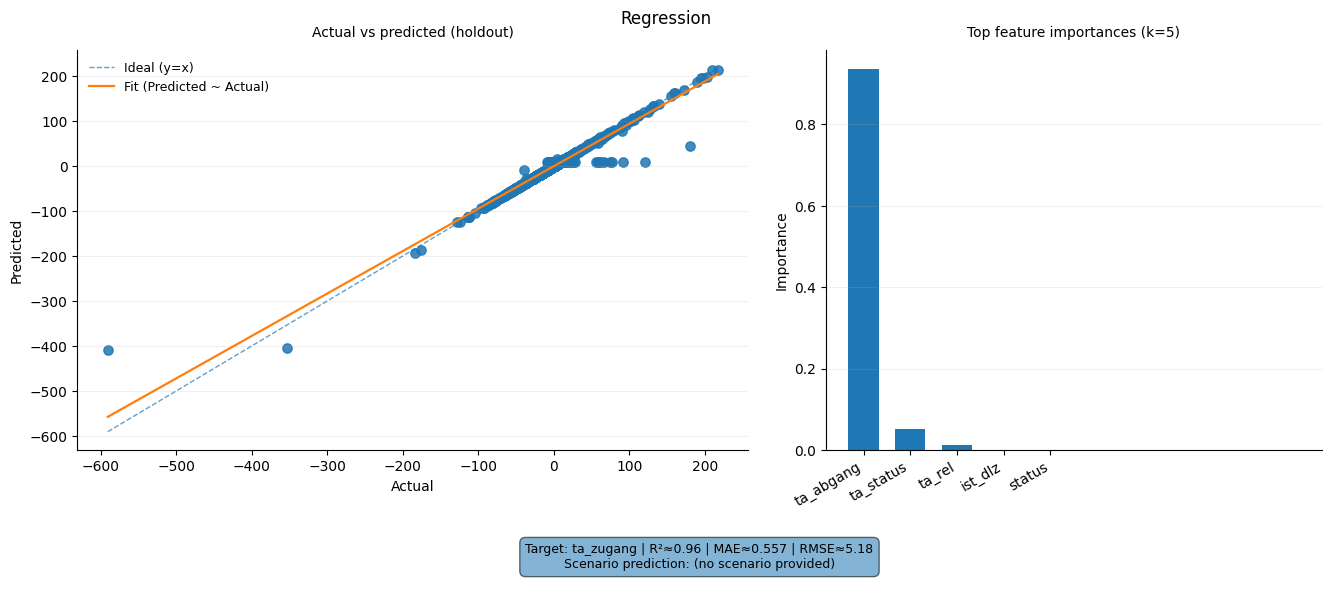


--- Summary ---
Generated analysis for: Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.

--- Output DF head() ---


status            ta_status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend  TA nicht erreichbar       19.0      NaN        NaN     NaN
1  laufend  TA nicht erreichbar       17.0      NaN        NaN     NaN
2  laufend  TA nicht erreichbar       13.0      NaN        NaN     NaN
3  laufend  TA nicht erreichbar       85.0      NaN        NaN     NaN
4  laufend  TA nicht erreichbar        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


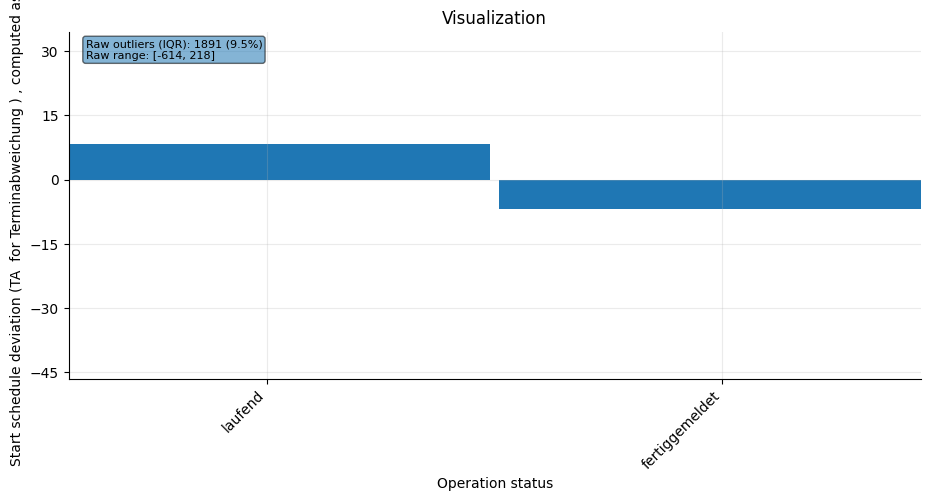


--- Summary ---
Generated analysis for: What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?.

--- Output DF head() ---


status            ta_status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend  TA nicht erreichbar       19.0      NaN        NaN     NaN
1  laufend  TA nicht erreichbar       17.0      NaN        NaN     NaN
2  laufend  TA nicht erreichbar       13.0      NaN        NaN     NaN
3  laufend  TA nicht erreichbar       85.0      NaN        NaN     NaN
4  laufend  TA nicht erreichbar        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


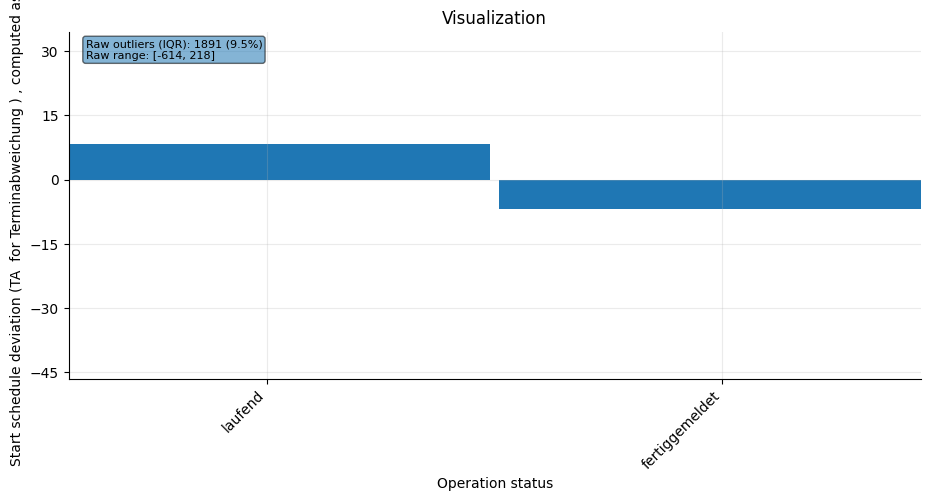


--- Summary ---
Generated analysis for: Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.

--- Output DF head() ---


ist_dlz   status
97       NaN  laufend
104      NaN  laufend
105      NaN  laufend
135      NaN  laufend
137      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


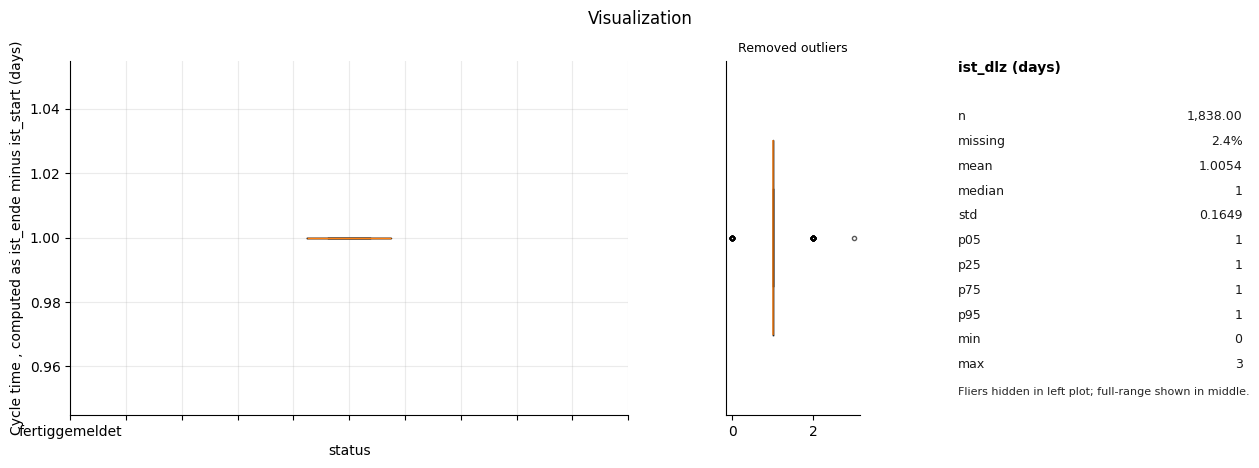


--- Summary ---
Generated analysis for: Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?.

--- Output DF head() ---


status  ist_dlz  ta_zugang  ta_abgang  ta_rel
97   laufend      NaN       13.0        NaN     NaN
104  laufend      NaN        1.0        NaN     NaN
105  laufend      NaN        1.0        NaN     NaN
135  laufend      NaN        0.0        NaN     NaN
137  laufend      NaN        0.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: status, ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


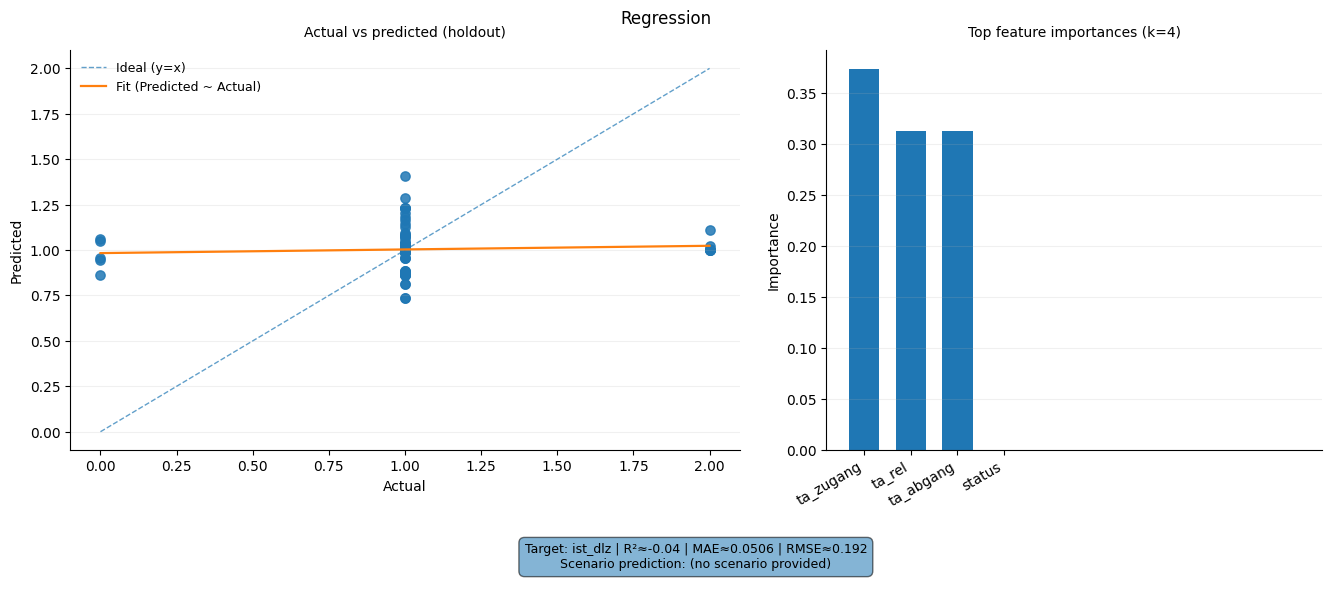


--- Summary ---
Generated analysis for: Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.

--- Output DF head() ---


ist_dlz   status
97       NaN  laufend
104      NaN  laufend
105      NaN  laufend
135      NaN  laufend
137      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


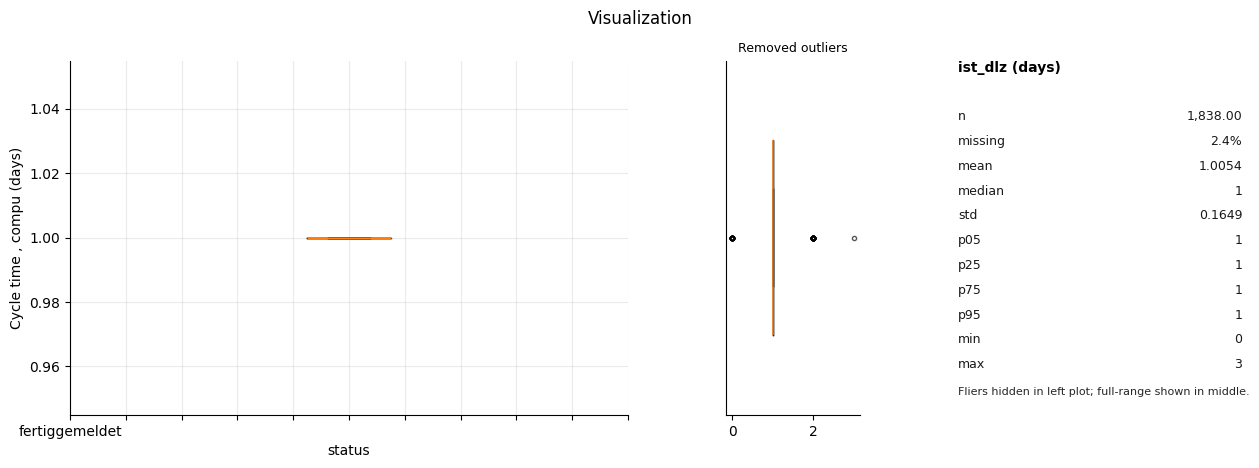


--- Summary ---
Generated analysis for: For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?.

--- Output DF head() ---


ist_dlz   status
97       NaN  laufend
104      NaN  laufend
105      NaN  laufend
135      NaN  laufend
137      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


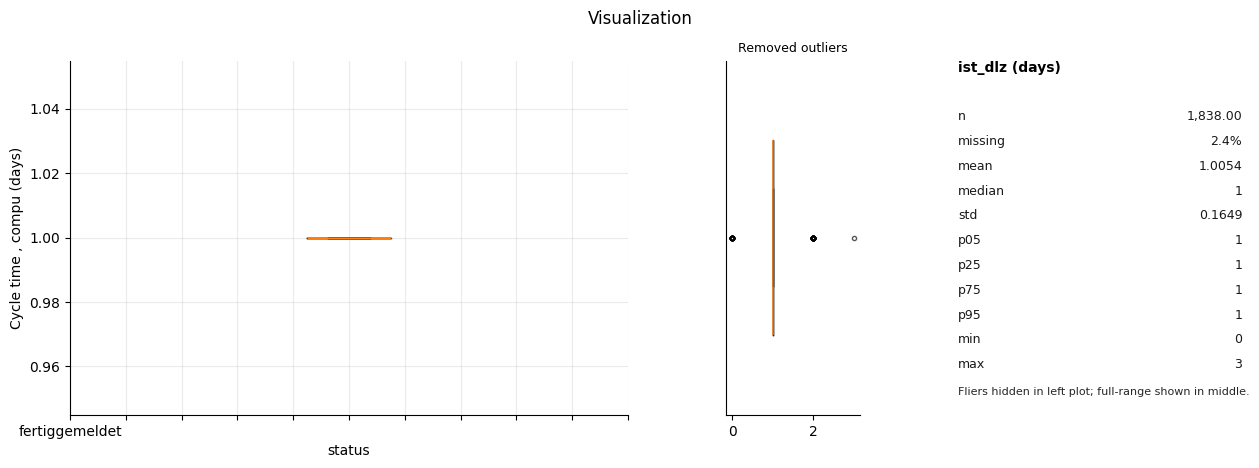


--- Summary ---
Generated analysis for: Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.

--- Output DF head() ---


ta_zugang   status
10        8.0  laufend
11       13.0  laufend
65       10.0  laufend
69       16.0  laufend
70        6.0  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


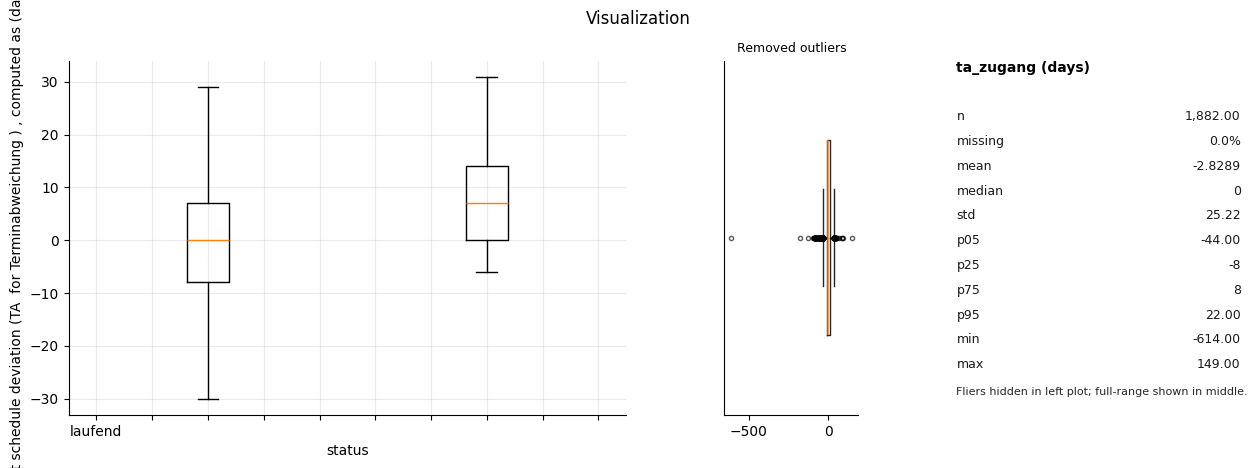


--- Summary ---
Generated analysis for: Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.

--- Output DF head() ---


status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend       19.0      NaN        NaN     NaN
1  laufend       17.0      NaN        NaN     NaN
2  laufend       13.0      NaN        NaN     NaN
3  laufend       85.0      NaN        NaN     NaN
4  laufend        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


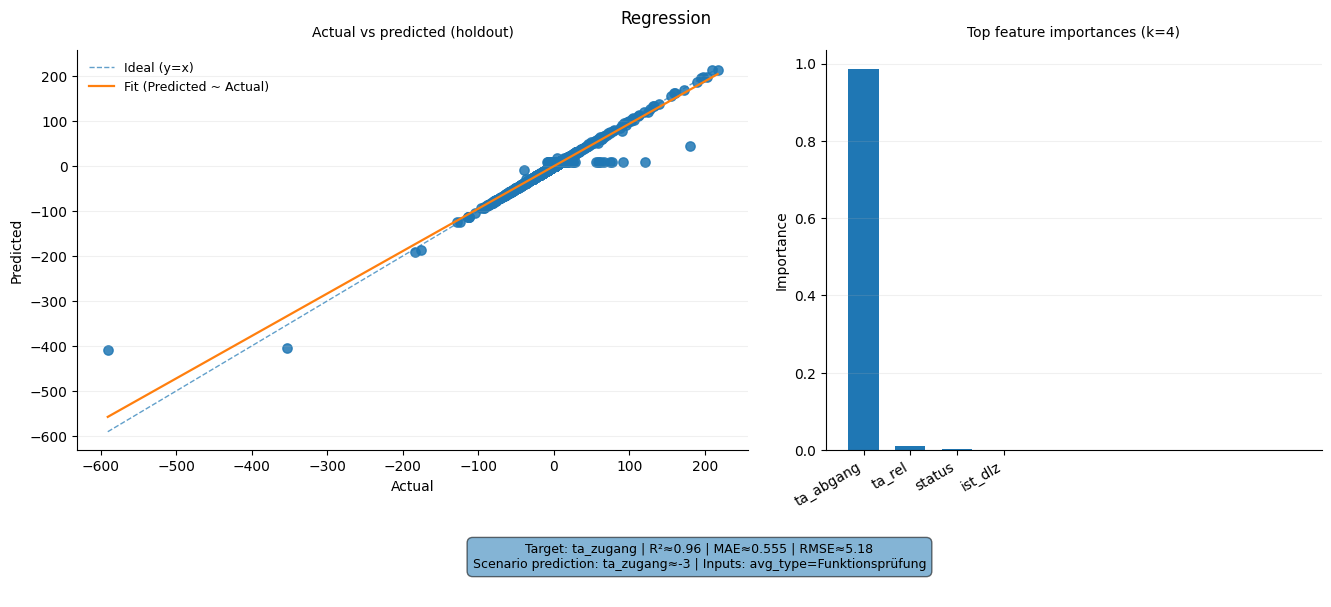


--- Summary ---
Generated analysis for: Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.

--- Output DF head() ---


ta_zugang   status
10        8.0  laufend
11       13.0  laufend
65       10.0  laufend
69       16.0  laufend
70        6.0  laufend


--- Run overview (inputs & key decisions) ---
Prompt: What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


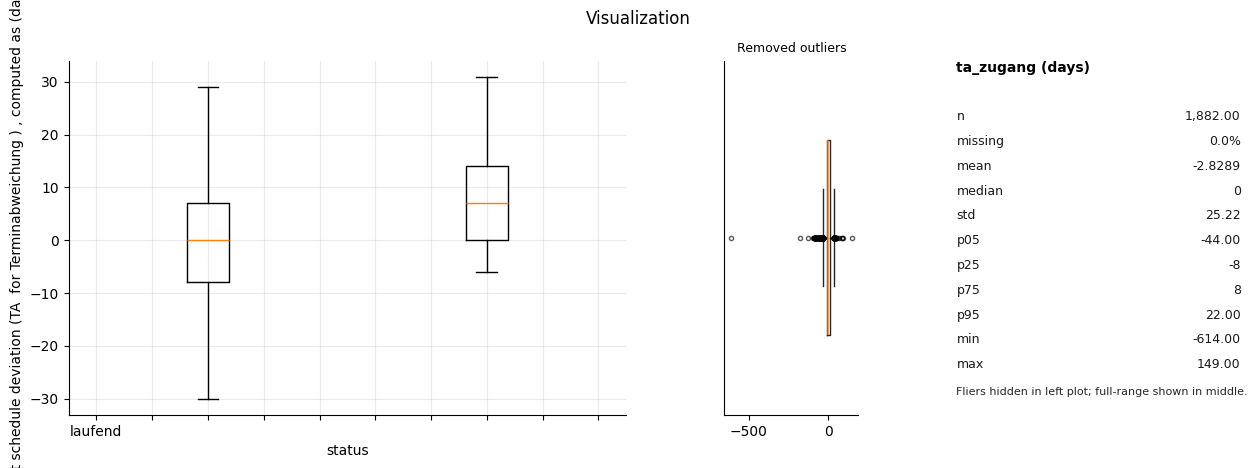


--- Summary ---
Generated analysis for: What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?.

--- Output DF head() ---


ta_zugang   status
10        8.0  laufend
11       13.0  laufend
65       10.0  laufend
69       16.0  laufend
70        6.0  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


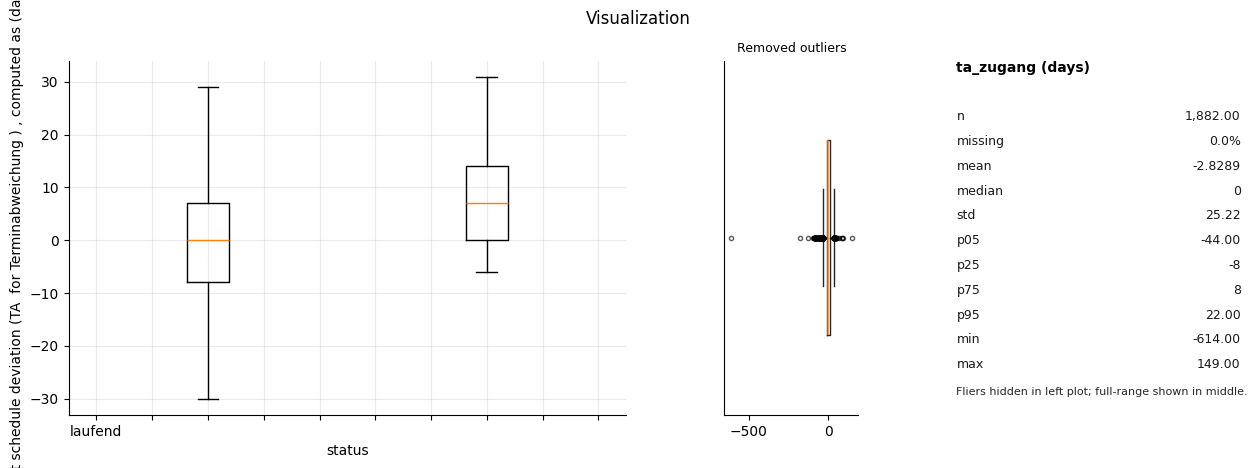


--- Summary ---
Generated analysis for: Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.

--- Output DF head() ---


ist_dlz   status
0      NaN  laufend
1      NaN  laufend
2      NaN  laufend
3      NaN  laufend
4      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: How is the cycle time distributed for Profilschleifen across ta status categories?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


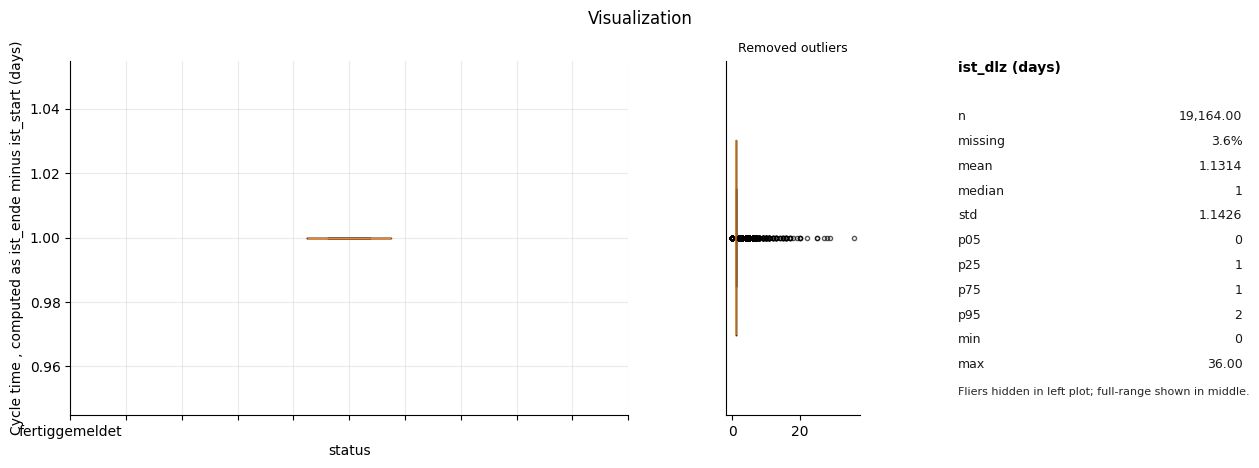


--- Summary ---
Generated analysis for: How is the cycle time distributed for Profilschleifen across ta status categories?.

--- Output DF head() ---


ist_dlz   status
0      NaN  laufend
1      NaN  laufend
2      NaN  laufend
3      NaN  laufend
4      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of cycle time for Profilschleifen across ta status categories.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


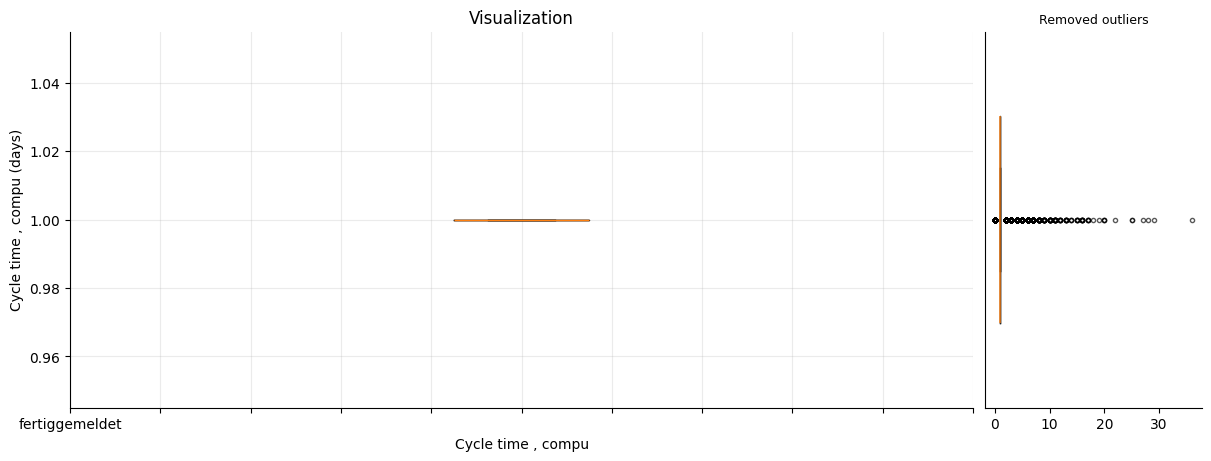


--- Summary ---
Computed distribution of ist_dlz (days): n=19164, mean≈1.13, range≈[0.00, 36.00].

--- Output DF head() ---


status  ist_dlz  ta_zugang  ta_abgang  ta_rel
0  laufend      NaN       19.0        NaN     NaN
1  laufend      NaN       17.0        NaN     NaN
2  laufend      NaN       13.0        NaN     NaN
3  laufend      NaN       85.0        NaN     NaN
4  laufend      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Visualize how cycle time is distributed for Profilschleifen by ta status categories.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


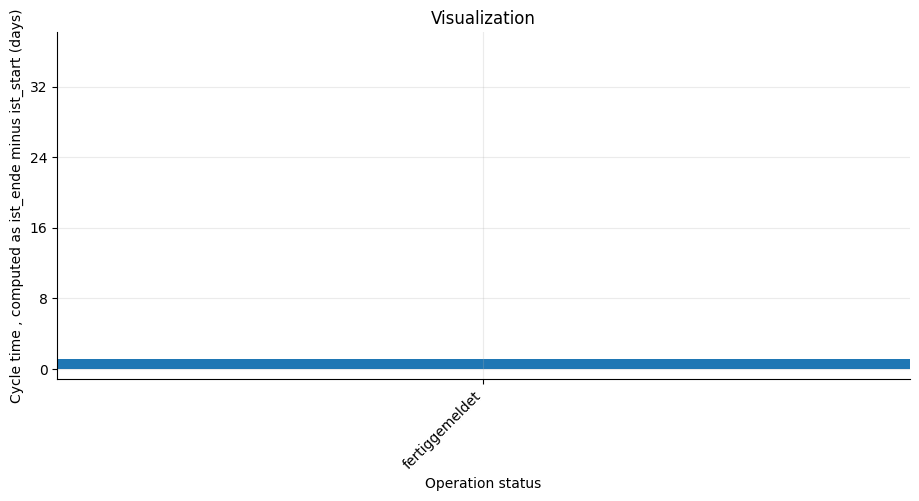


--- Summary ---
Generated analysis for: Visualize how cycle time is distributed for Profilschleifen by ta status categories.

--- Output DF head() ---


ist_dlz   status
0      NaN  laufend
1      NaN  laufend
2      NaN  laufend
3      NaN  laufend
4      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Plot cycle time distributions for Profilschleifen split by ta status categories.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


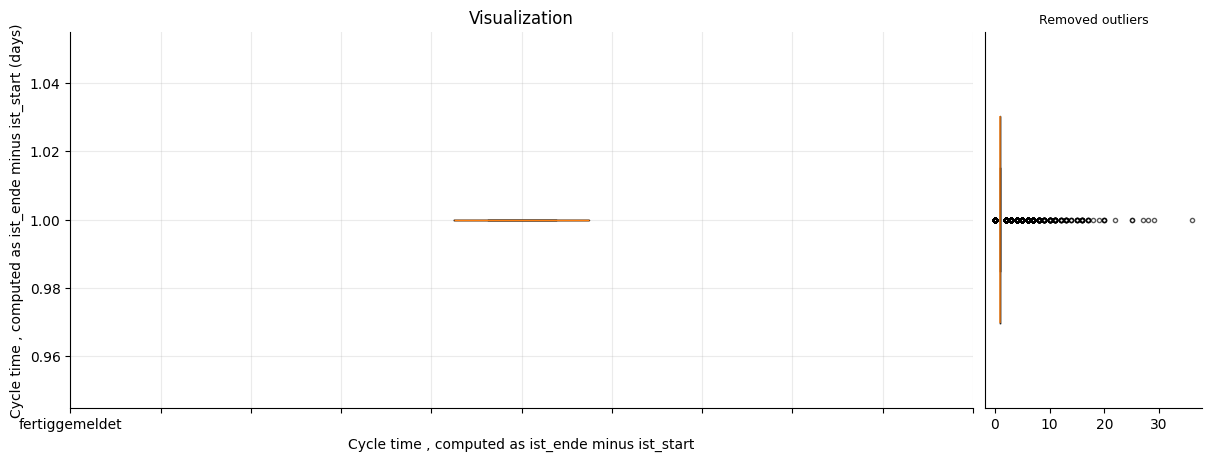


--- Summary ---
Computed distribution of ist_dlz (days): n=19164, mean≈1.13, range≈[0.00, 36.00].

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: For Konstruktion operations, what are the main statistics about the end schedule deviation?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


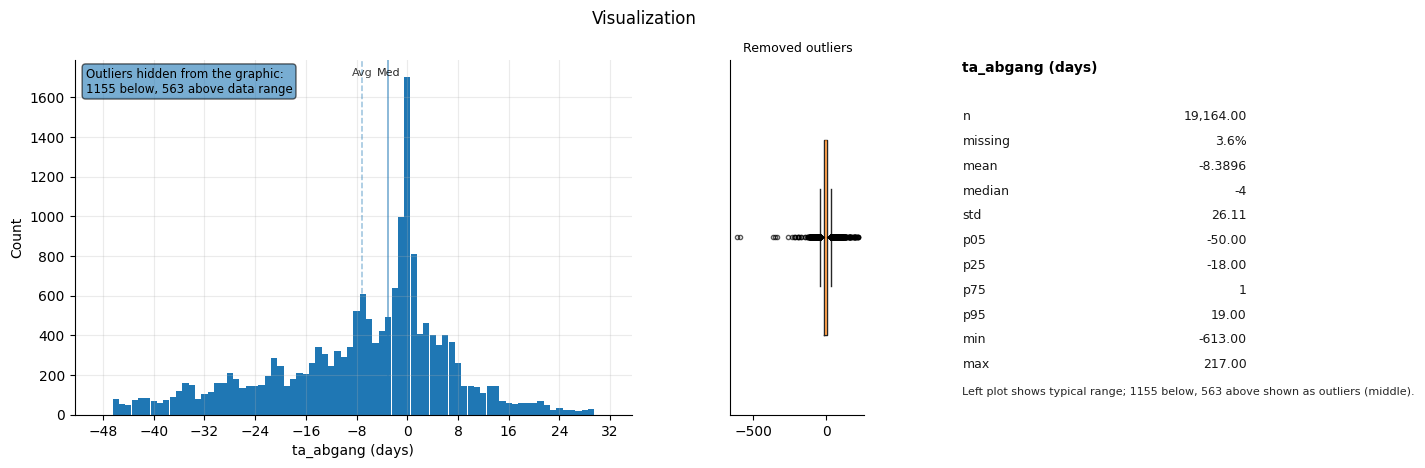


--- Summary ---
Generated analysis for: For Konstruktion operations, what are the main statistics about the end schedule deviation?.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the main statistics about the end schedule deviation for Konstruktion operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


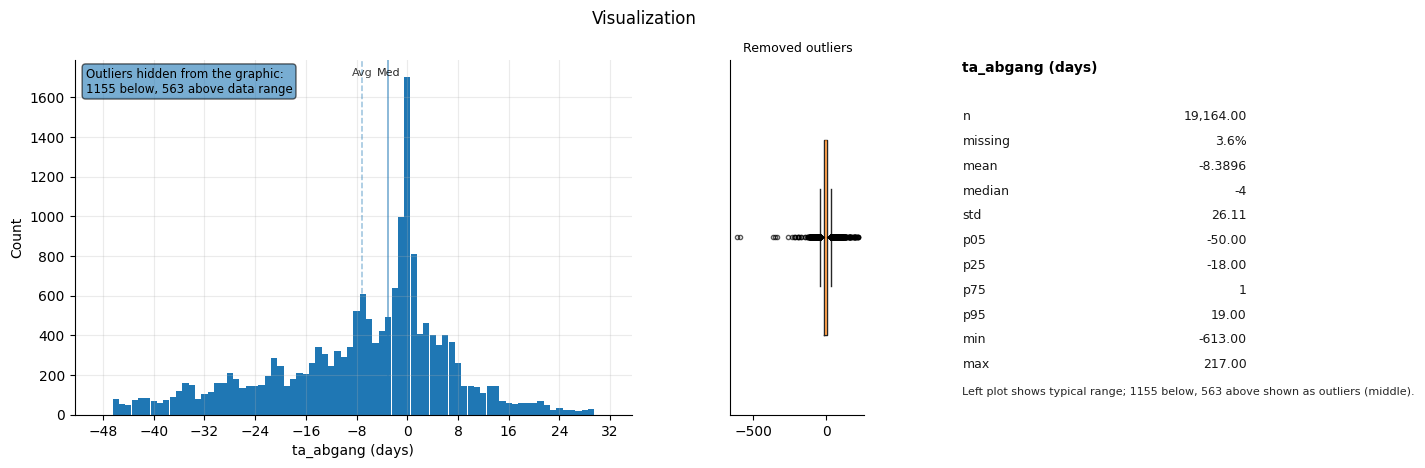


--- Summary ---
Generated analysis for: Show the main statistics about the end schedule deviation for Konstruktion operations.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide summary statistics of end schedule deviation for Konstruktion operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


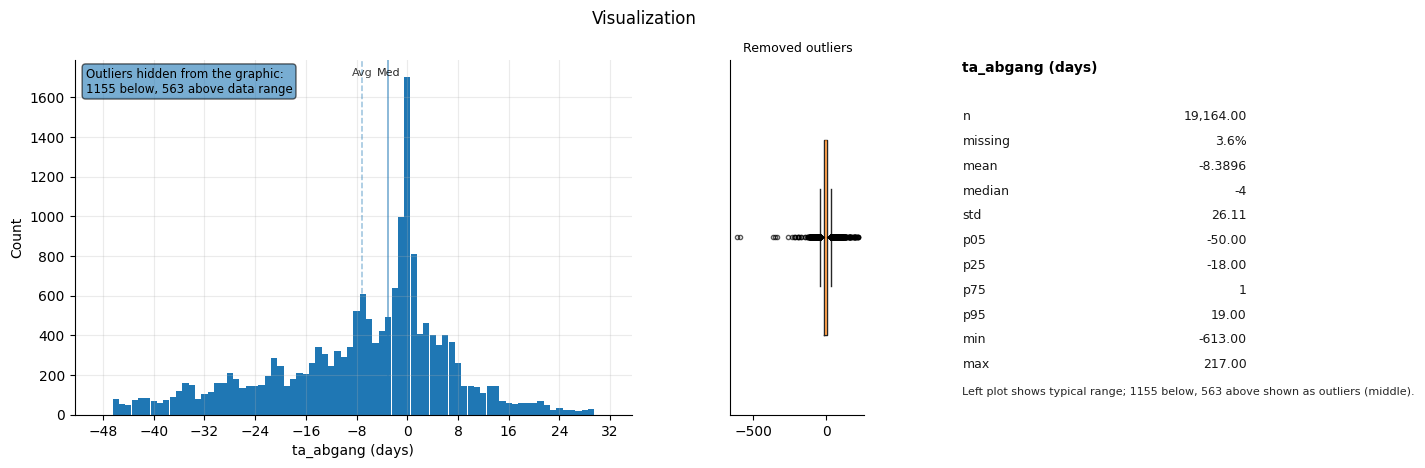


--- Summary ---
Generated analysis for: Provide summary statistics of end schedule deviation for Konstruktion operations.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Report the key descriptive statistics for end schedule deviation in Konstruktion operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


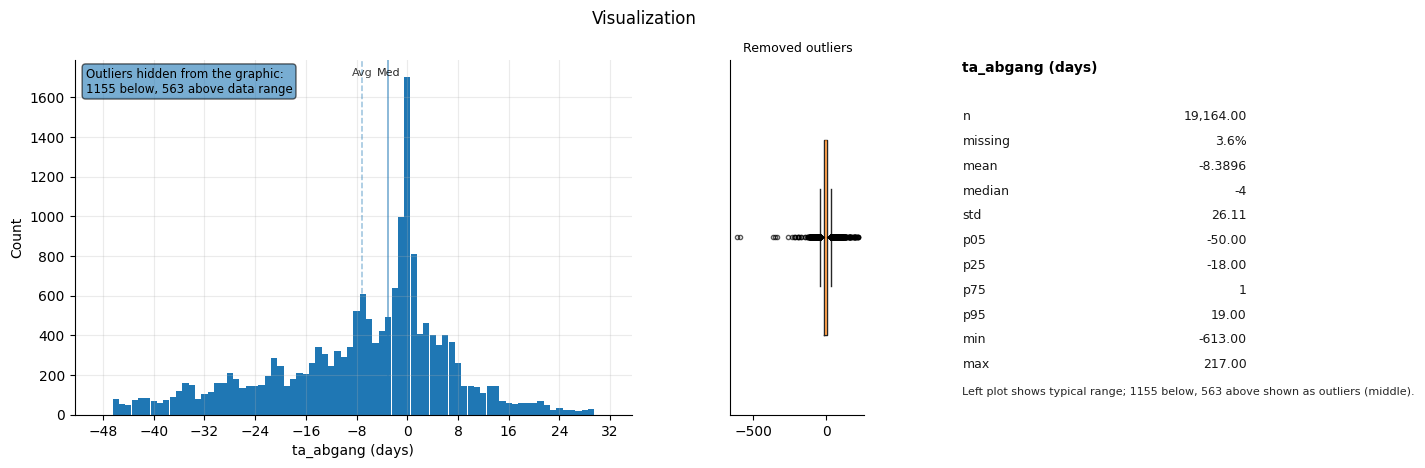


--- Summary ---
Generated analysis for: Report the key descriptive statistics for end schedule deviation in Konstruktion operations.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which resource groups drive the end-date deviation the most?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource groups drive the end-date deviation the most?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify which resource groups drive end-date deviation the most.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Identify which resource groups drive end-date deviation the most.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which resource groups have the strongest impact on end-date deviation?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource groups have the strongest impact on end-date deviation?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the resource groups with the biggest contribution to end-date deviation.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Show the resource groups with the biggest contribution to end-date deviation.
[ERROR] block 24 base: cannot convert the series to <class 'float'>
[ERROR] block 24 alt1: cannot convert the series to <class 'float'>
[ERROR] block 24 alt2: cannot convert the series to <class 'float'>

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate weekly average Lead-time deviation across the next 16 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


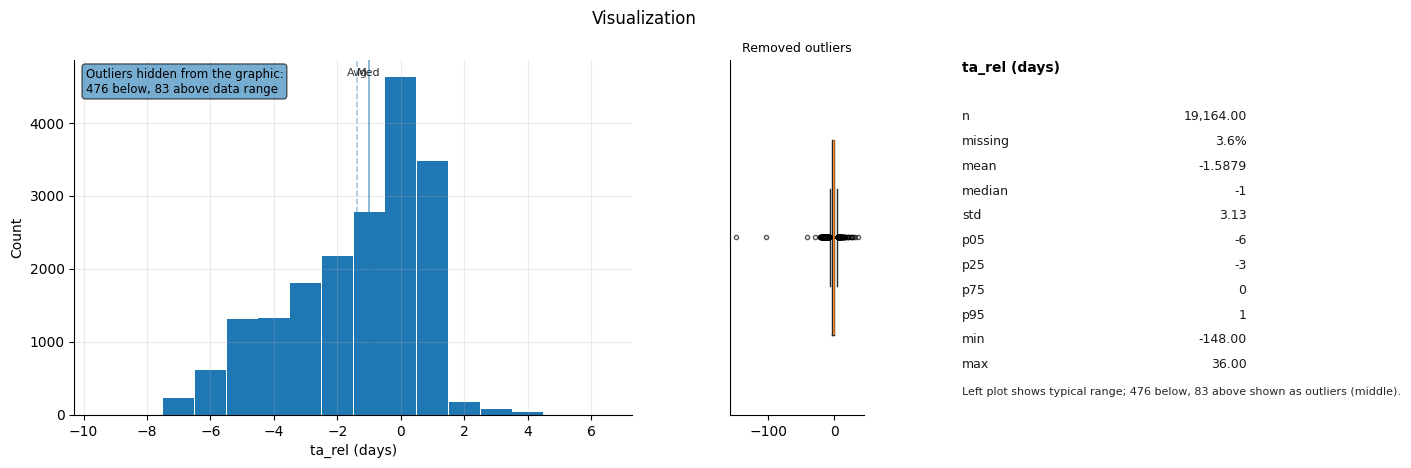


--- Summary ---
Generated analysis for: Estimate weekly average Lead-time deviation across the next 16 weeks.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which resource group should we route to to minimize end deviation?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource group should we route to to minimize end deviation?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Recommend which resource group to route to in order to minimize end deviation.
Family: prescriptive (confidence=0.35)
Type: candidate_ranking (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Recommend which resource group to route to in order to minimize end deviation.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which resource group would best minimize end deviation if we route work there?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource group would best minimize end deviation if we route work there?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Suggest a resource group to route to so that end deviation is minimized.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Suggest a resource group to route to so that end deviation is minimized.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which operation type would be best for low cycle times?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


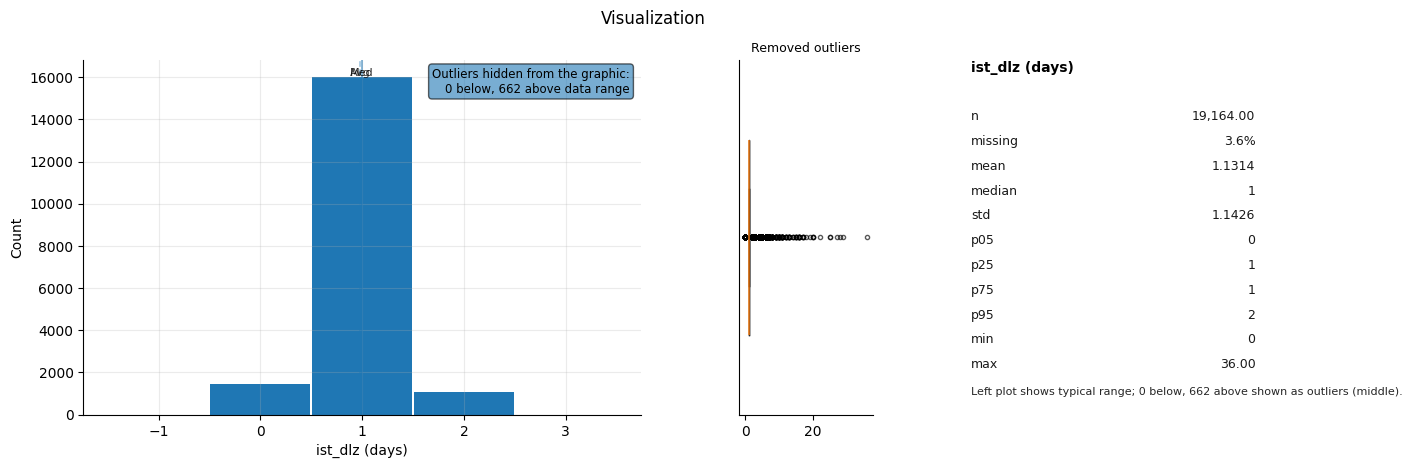


--- Summary ---
Generated analysis for: Which operation type would be best for low cycle times?.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify the operation type that is best for low cycle times.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


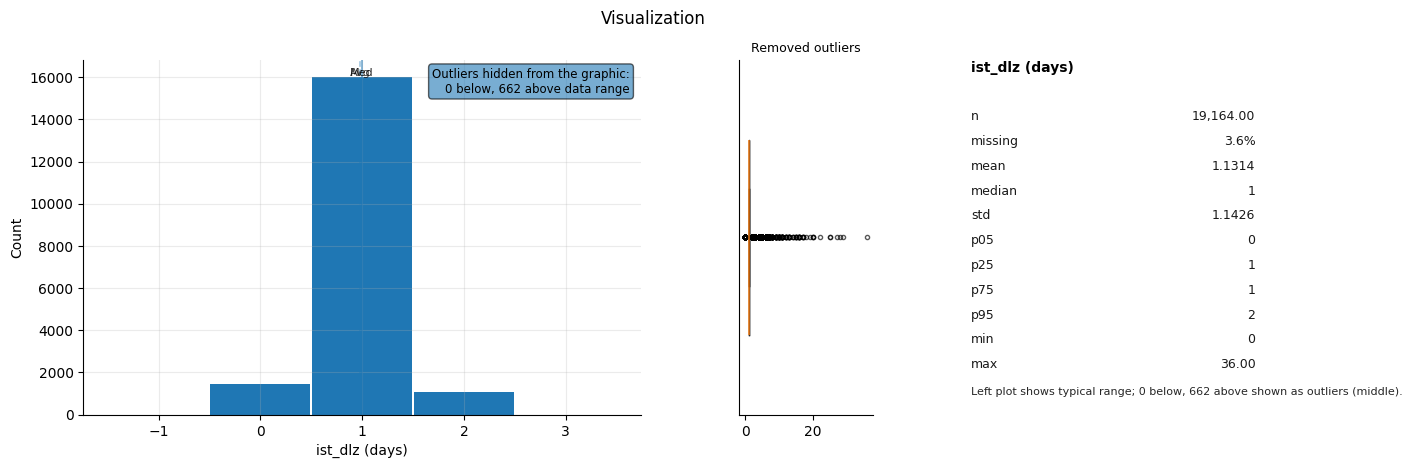


--- Summary ---
Generated analysis for: Identify the operation type that is best for low cycle times.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which operation type tends to give the lowest cycle times?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


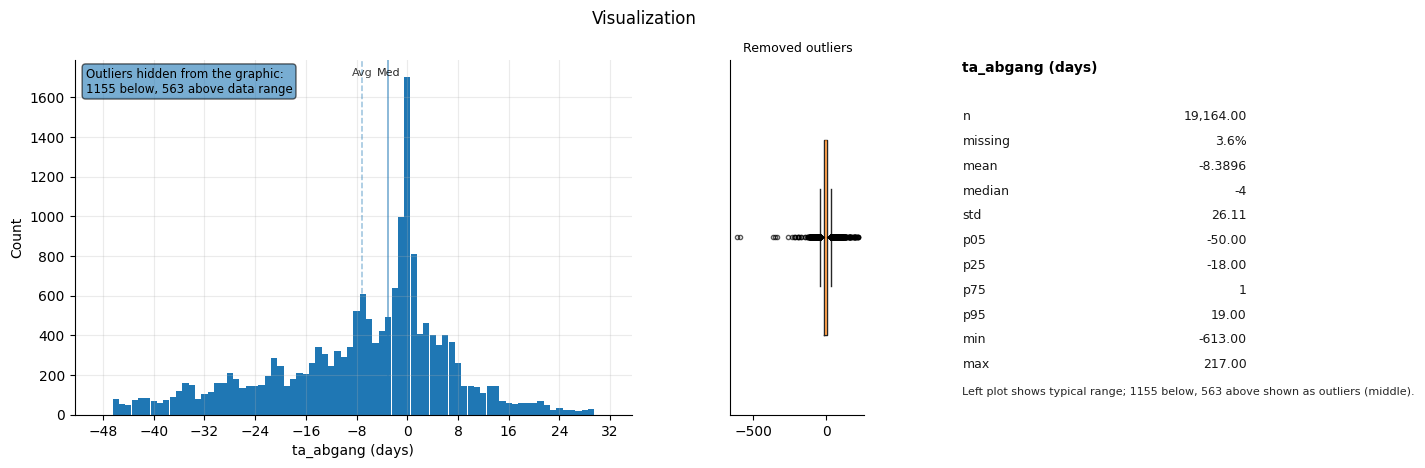


--- Summary ---
Generated analysis for: Which operation type tends to give the lowest cycle times?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Recommend an operation type for achieving low cycle times.
Family: prescriptive (confidence=0.35)
Type: candidate_ranking (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Recommend an operation type for achieving low cycle times.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: I want to improve cycle time (lower is better). What can I do? Show me decision options.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


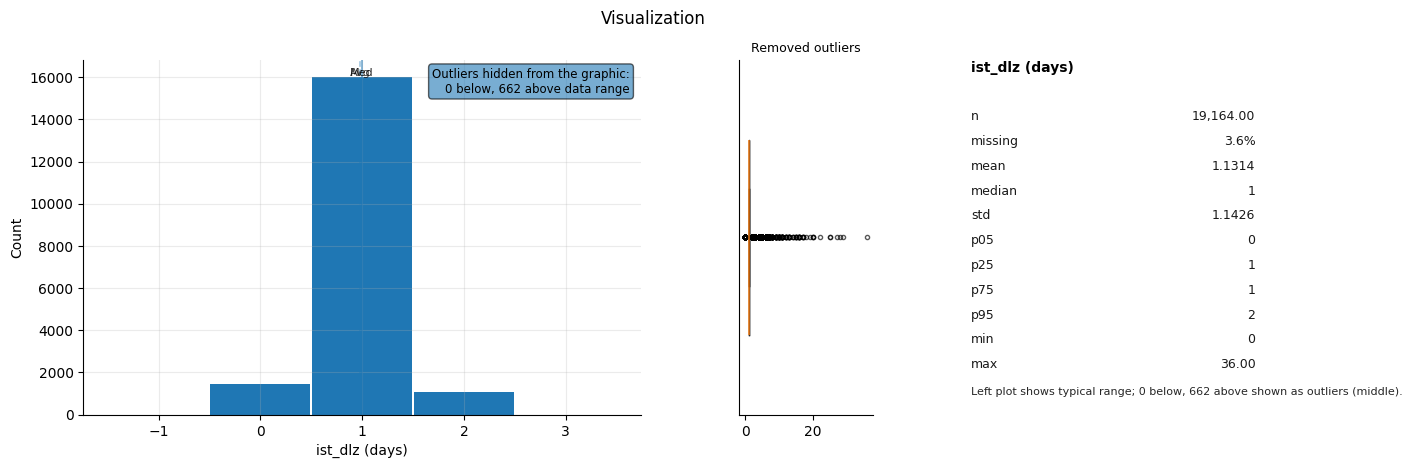


--- Summary ---
Generated analysis for: I want to improve cycle time (lower is better). What can I do? Show me decision options.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


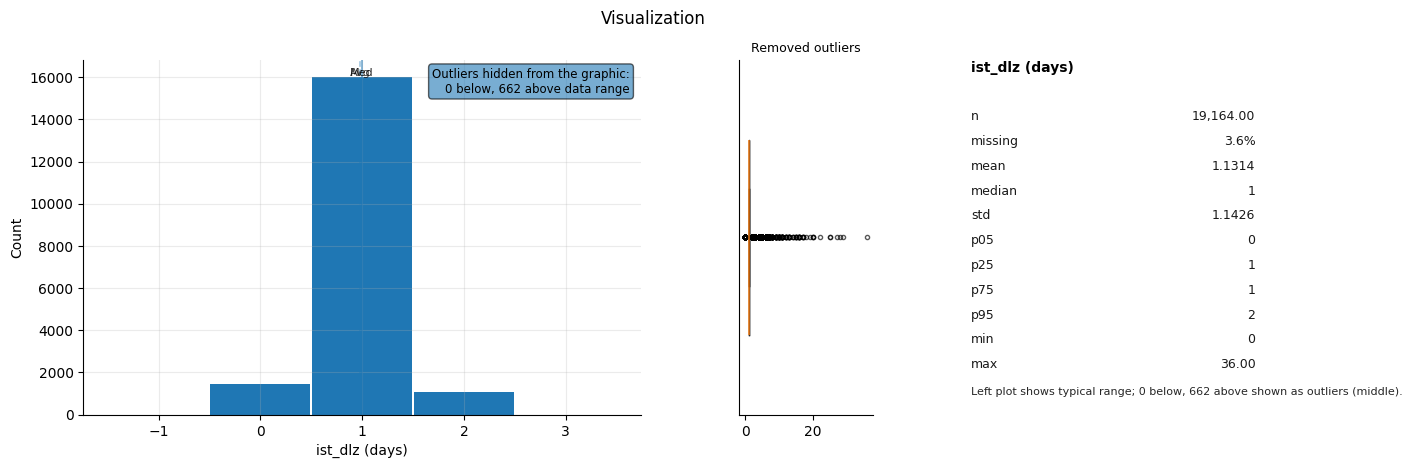


--- Summary ---
Generated analysis for: I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: To improve cycle time (lower is better), what can I do? Please show decision options.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


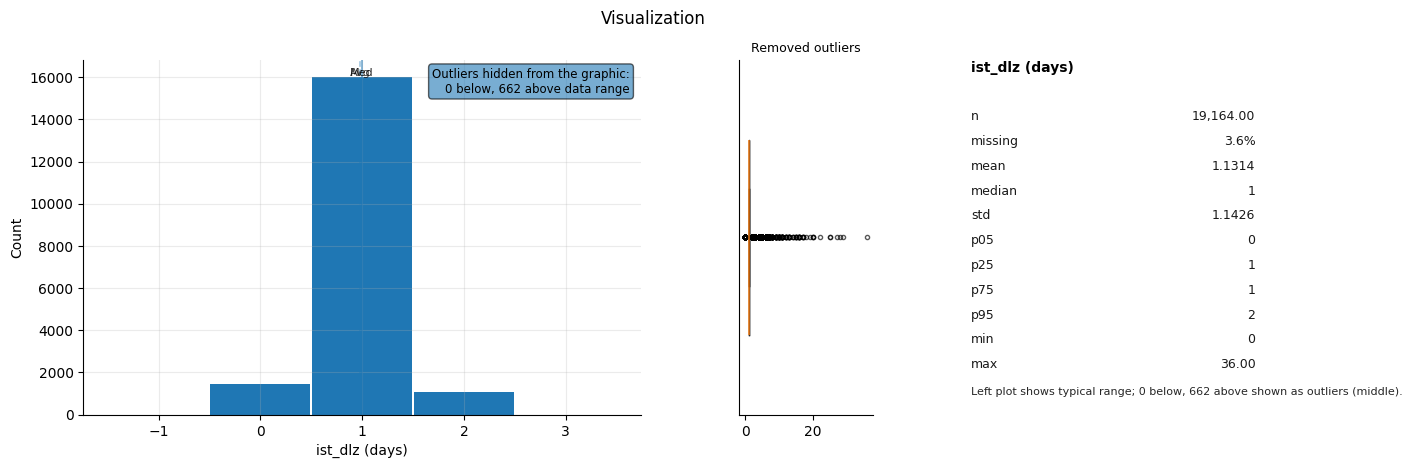


--- Summary ---
Generated analysis for: To improve cycle time (lower is better), what can I do? Please show decision options.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: I want lower cycle time (lower is better). Show me decision options to achieve that.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


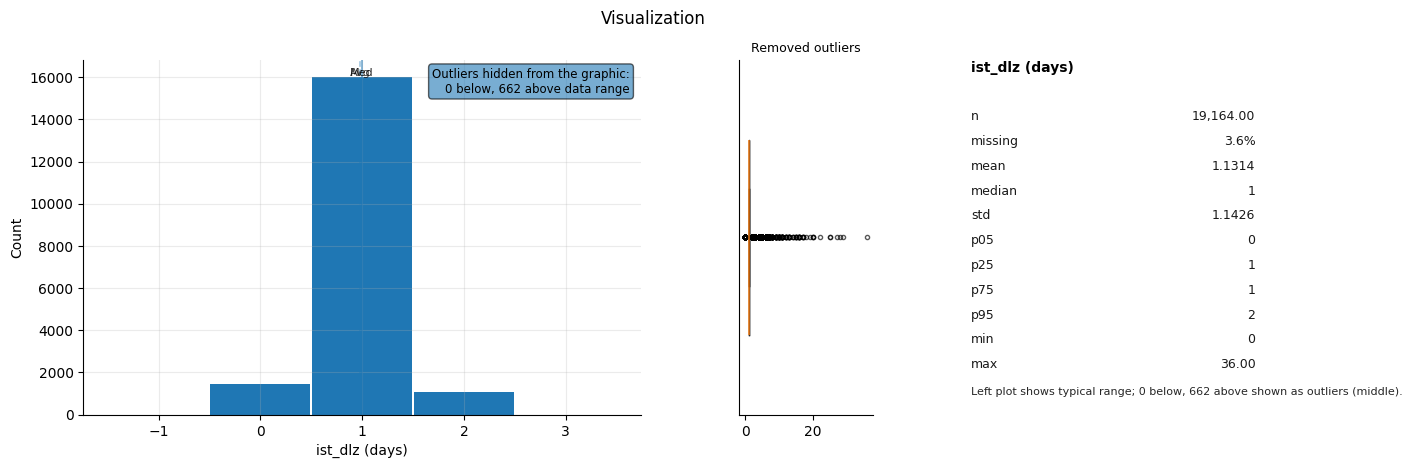


--- Summary ---
Generated analysis for: I want lower cycle time (lower is better). Show me decision options to achieve that.

--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: I want to decrease start deviation. What do I need to work on?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


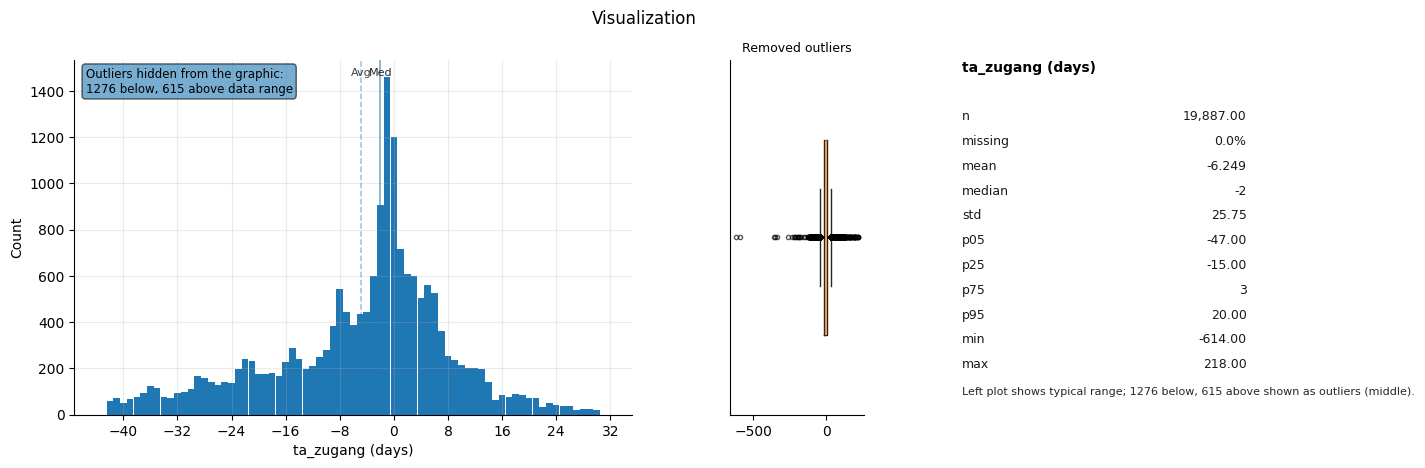


--- Summary ---
Generated analysis for: For unfinshed operations: I want to decrease start deviation. What do I need to work on?.

--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations, what should I work on to decrease start deviation?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


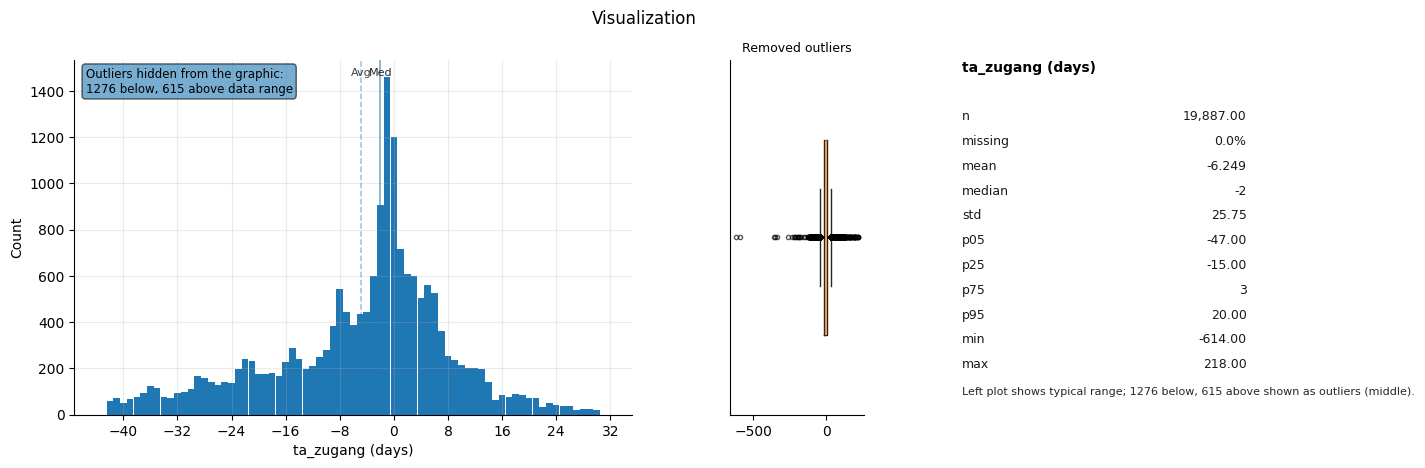


--- Summary ---
Generated analysis for: For unfinshed operations, what should I work on to decrease start deviation?.

--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: identify what I need to improve to decrease start deviation.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


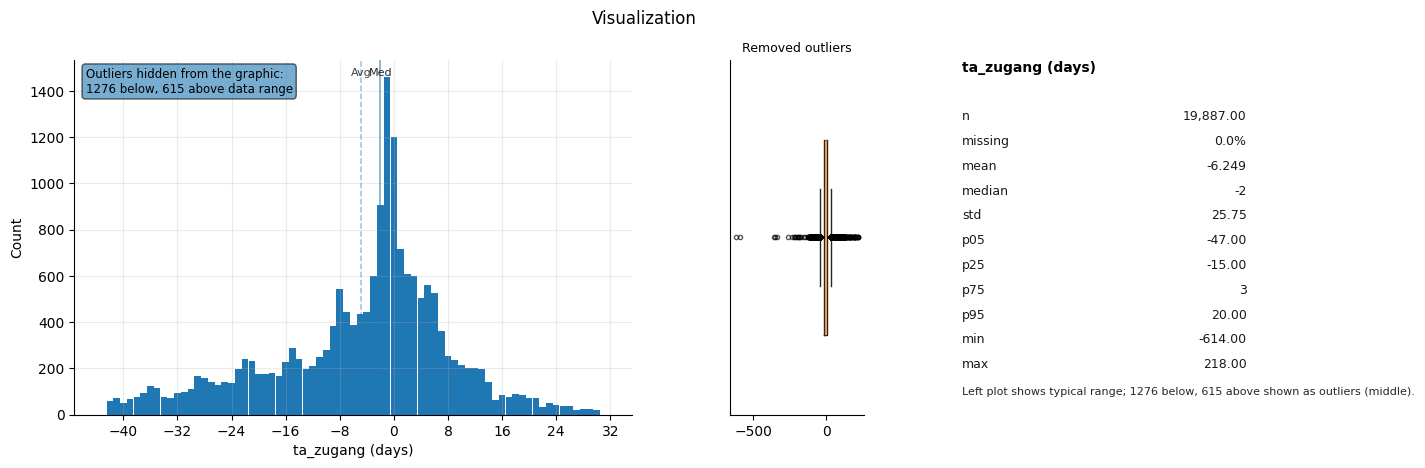


--- Summary ---
Generated analysis for: For unfinshed operations: identify what I need to improve to decrease start deviation.

--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: show the main levers to decrease start deviation.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


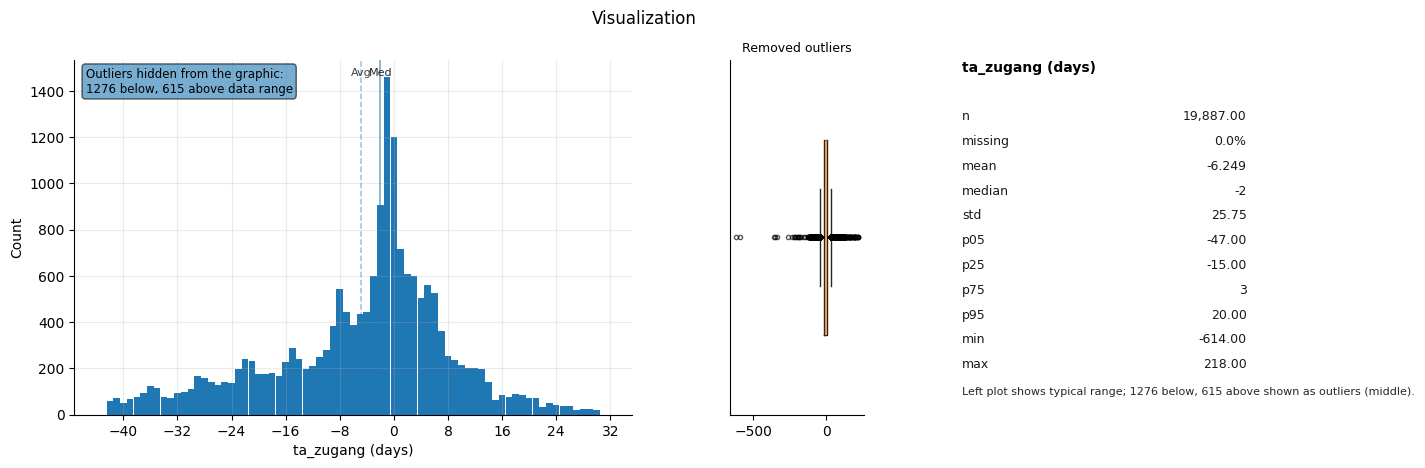


--- Summary ---
Generated analysis for: For unfinshed operations: show the main levers to decrease start deviation.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Could I improve average cycle time if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


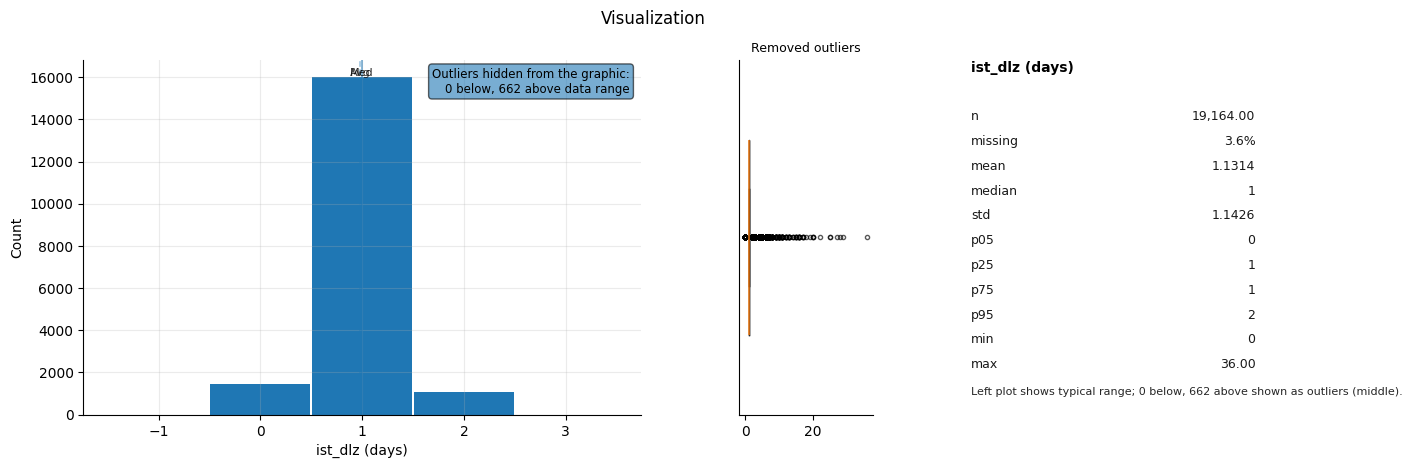


--- Summary ---
Generated analysis for: Could I improve average cycle time if I use '3D CAM' as a substitute for ‘CAM-Fertigung’?.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Would average cycle time improve if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


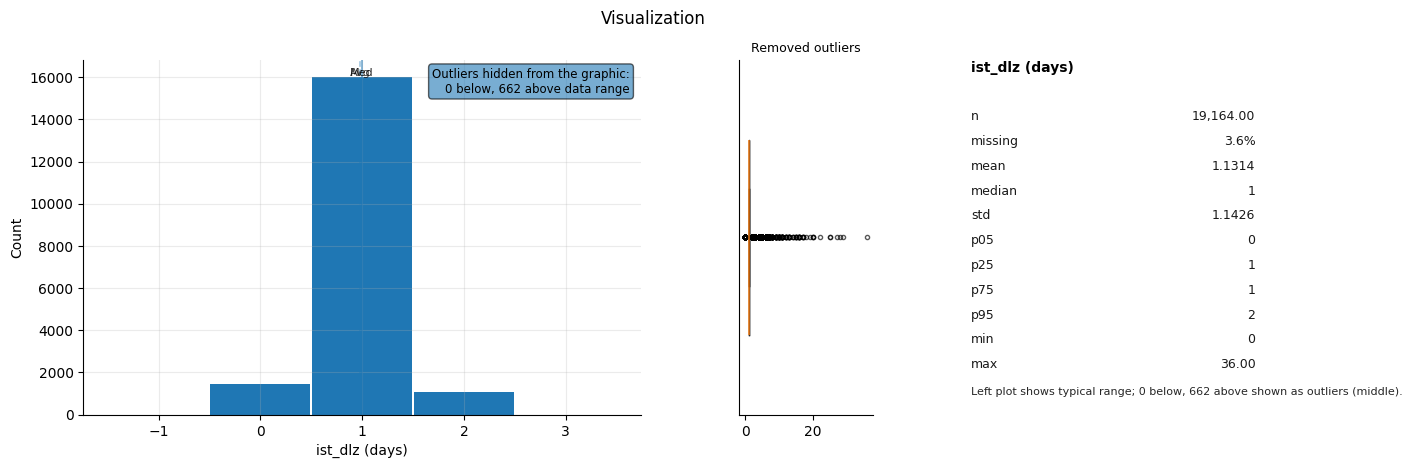


--- Summary ---
Generated analysis for: Would average cycle time improve if I use '3D CAM' as a substitute for ‘CAM-Fertigung’?.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate the impact on average cycle time if we substitute  ‘CAM-Fertigung’ with '3D CAM'.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


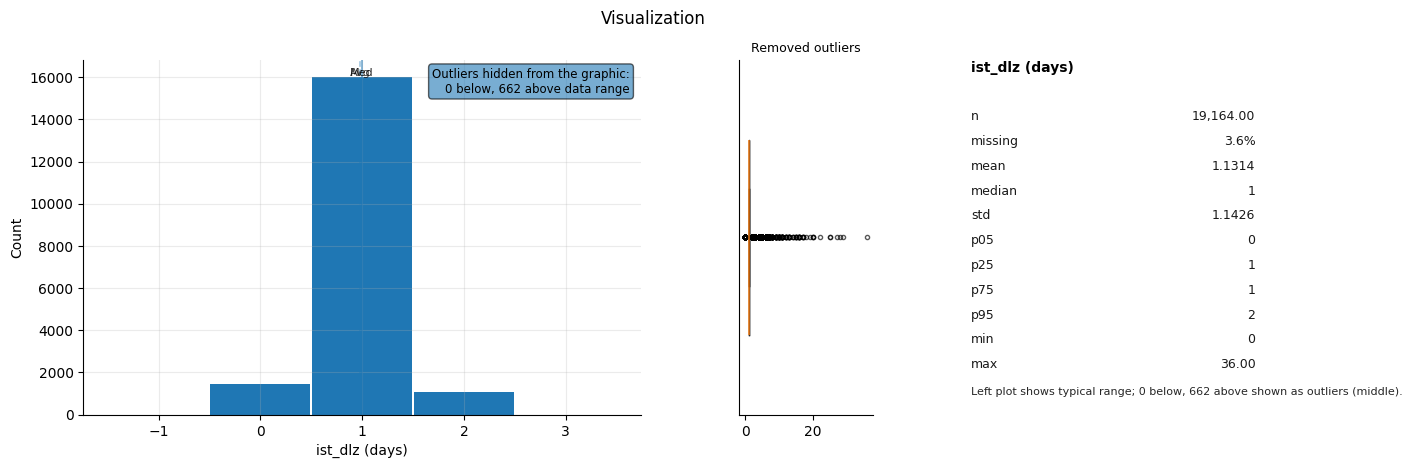


--- Summary ---
Generated analysis for: Estimate the impact on average cycle time if we substitute ‘CAM-Fertigung’ with '3D CAM'.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: If '3D CAM' replaces  ‘CAM-Fertigung’, could average cycle time get better?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


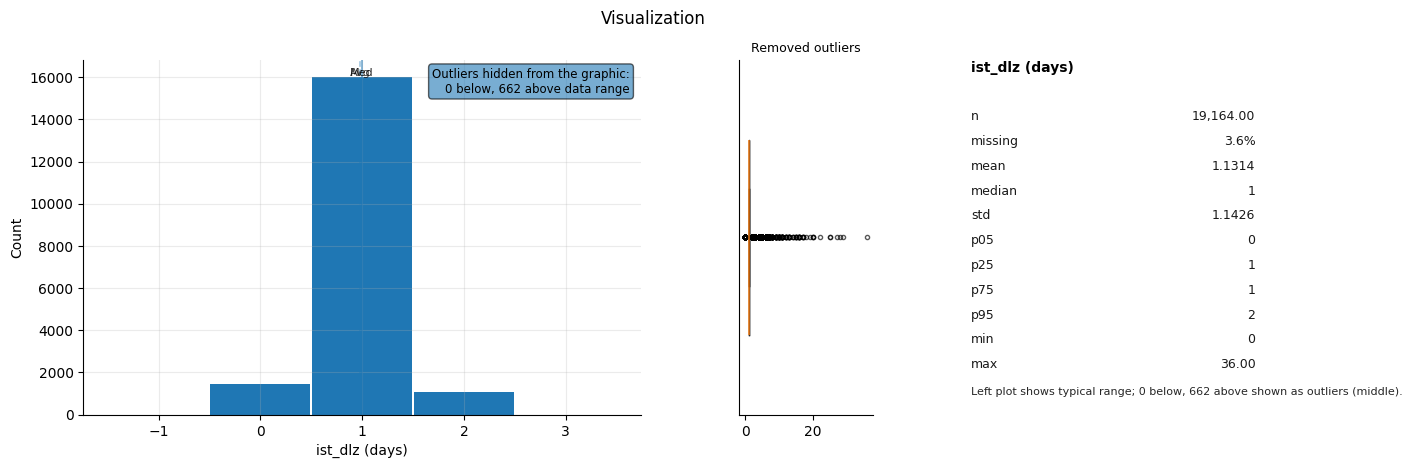


--- Summary ---
Generated analysis for: If '3D CAM' replaces ‘CAM-Fertigung’, could average cycle time get better?.

--- Output DF head() ---


ta_abgang
7         NaN
8         NaN
22        NaN
25        NaN
89        NaN


--- Run overview (inputs & key decisions) ---
Prompt: What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


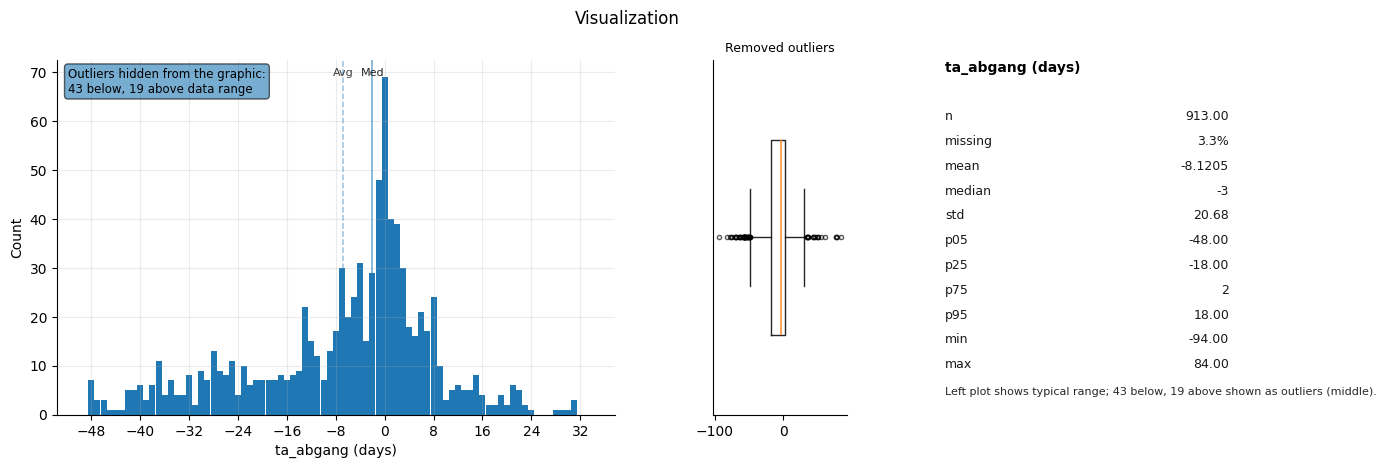


--- Summary ---
Generated analysis for: What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?.

--- Output DF head() ---


ta_abgang
7         NaN
8         NaN
22        NaN
25        NaN
89        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


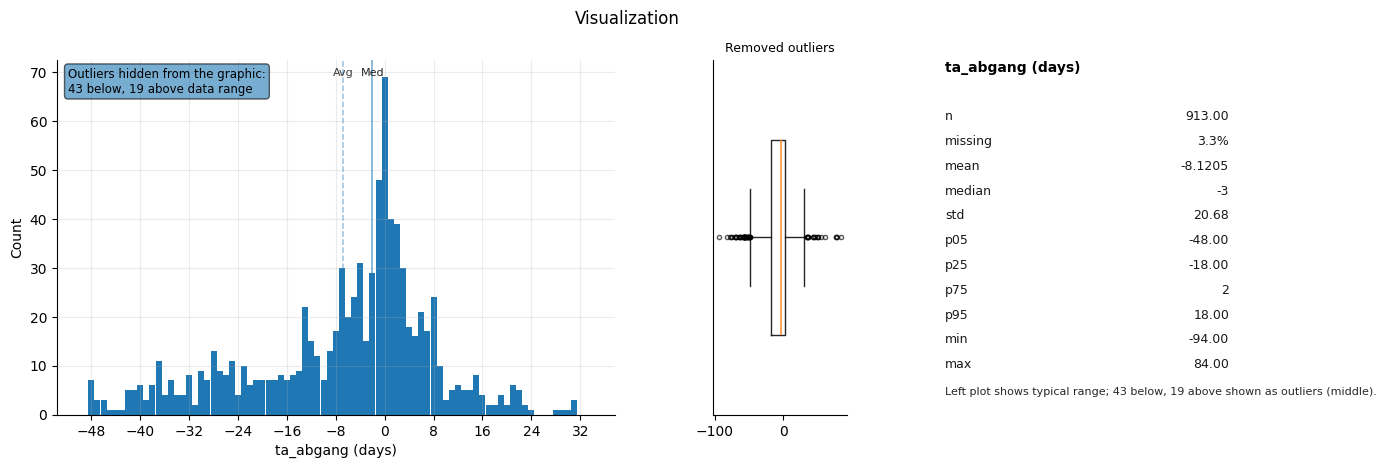


--- Summary ---
Generated analysis for: Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
7         NaN      NaN        8.0     NaN
8         NaN      NaN       14.0     NaN
22        NaN      NaN        8.0     NaN
25        NaN      NaN        8.0     NaN
89        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


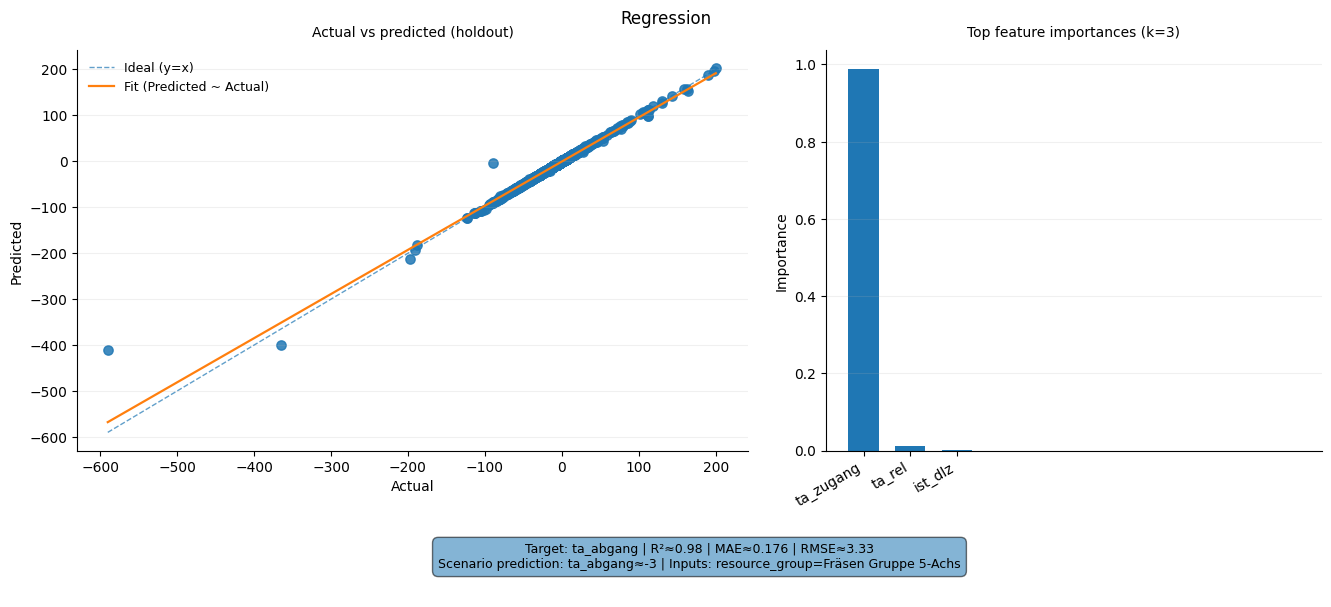


--- Summary ---
Generated analysis for: Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Done. Wrote 120 runs to: C:\Users\DarioKulaszewski\OneDrive - deepIng business solutions GmbH\deepIng - Team - Dokumente\23 Projekte\2024 deep.Control\data_agent_deeping\project_v2\run_reports\batch_20260202_184445
OK: 114 | ERROR: 6


In [4]:
# Kernel 3: run all 120 prompts (base + 3 alts per id) with OpenAI API key already set in Kernel 1

import json
import hashlib
import traceback
from datetime import datetime
from pathlib import Path


async def run_all_prompts_jupyter(
    prompts_with_alternatives,
    df,
    *,
    out_dir="run_reports",
    render_final=True,     # plots + final text
    final_head_rows=5,
    show_step_inputs=False,
    verbose_steps=False,
):
    out_dir = Path(out_dir).resolve()
    out_dir.mkdir(parents=True, exist_ok=True)

    run_ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    root = out_dir / f"batch_{run_ts}"
    root.mkdir(parents=True, exist_ok=True)

    summary = []

    for block in prompts_with_alternatives:
        block_id = block["id"]
        all_prompts = [("base", block["base"])] + [
            (f"alt{i+1}", p) for i, p in enumerate(block["alts"])
        ]

        for variant, prompt in all_prompts:
            # ultra-short run folder name to avoid WinError 206
            digest = hashlib.sha1(prompt.encode("utf-8")).hexdigest()[:10]
            run_path = root / f"{block_id:02d}_{variant}_{digest}"
            run_path.mkdir(parents=True, exist_ok=True)

            try:
                state, df_out, results = await run_pipeline(
                    prompt=prompt,
                    df=df,
                    review_config=ReviewConfig(
                        enabled=True,
                        after_steps={},
                        show_step_inputs=True,  # stored in results/state; don't double-print below
                    ),
                )

                (run_path / "prompt.txt").write_text(prompt, encoding="utf-8")
                (run_path / "state.json").write_text(
                    json.dumps(state, ensure_ascii=False, indent=2, default=str),
                    encoding="utf-8",
                )
                (run_path / "results.json").write_text(
                    json.dumps(results, ensure_ascii=False, indent=2, default=str),
                    encoding="utf-8",
                )

                # Optional: render plots + final message in notebook output
                show_run_report(
                    results,
                    show_head_df=df_out,
                    show_step_inputs=show_step_inputs,
                    verbose_steps=verbose_steps,
                    render_final=render_final,
                    final_head_rows=final_head_rows,
                )

                summary.append({
                    "block_id": block_id,
                    "variant": variant,
                    "status": "ok",
                    "prompt": prompt,
                    "artifact_dir": str(run_path),
                })

            except Exception as e:
                err_txt = "".join(traceback.format_exception(type(e), e, e.__traceback__))
                (run_path / "prompt.txt").write_text(prompt, encoding="utf-8")
                (run_path / "error.txt").write_text(err_txt, encoding="utf-8")

                print(f"[ERROR] block {block_id} {variant}: {e}")

                summary.append({
                    "block_id": block_id,
                    "variant": variant,
                    "status": "error",
                    "prompt": prompt,
                    "error": str(e),
                    "artifact_dir": str(run_path),
                })

    (root / "summary.json").write_text(
        json.dumps(summary, ensure_ascii=False, indent=2),
        encoding="utf-8",
    )

    print(f"Done. Wrote {len(summary)} runs to: {root}")
    return summary


summary = await run_all_prompts_jupyter(
    prompts_with_alternatives,
    df=df,
    out_dir="run_reports",
    render_final=True,      # set False if you want a quiet run
    show_step_inputs=False, # avoid duplicating step inputs in notebook output
    verbose_steps=False,
    final_head_rows=5,
)

# quick check
ok = sum(1 for s in summary if s["status"] == "ok")
err = sum(1 for s in summary if s["status"] == "error")
print(f"OK: {ok} | ERROR: {err}")

# evaluation table

In [5]:
import os
import pandas as pd

# --- build a flat table: one row per prompt (baseline + each alternative) ---
rows = []
for item in prompts_with_alternatives:
    pid = item["id"]

    # baseline
    rows.append({"id": pid, "variant": "base", "prompt": item["base"]})

    # alternatives
    for j, alt in enumerate(item.get("alts", []), start=1):
        rows.append({"id": pid, "variant": f"alt_{j}", "prompt": alt})

df = pd.DataFrame(rows, columns=["id", "variant", "prompt"])

In [ ]:
import os
import re
import pandas as pd

# ----------------------------
# A) Build the flat prompt table (baseline + alts)
# ----------------------------
rows = []
for item in prompts_with_alternatives:
    pid = item["id"]
    rows.append({"id": pid, "variant": "base", "prompt": item["base"]})
    for j, alt in enumerate(item.get("alts", []), start=1):
        rows.append({"id": pid, "variant": f"alt_{j}", "prompt": alt})

df = pd.DataFrame(rows, columns=["id", "variant", "prompt"])

# ----------------------------
# B) Paste your pipeline logs here (your big text blob)
# ----------------------------
raw_text = r"""

--- Output DF head() ---
ta_abgang
362	11.0
363	7.0
364	6.0
365	8.0
366	6.0

--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---
ta_abgang
362	11.0
363	7.0
364	6.0
365	8.0
366	6.0

--- Run overview (inputs & key decisions) ---
Prompt: Plot the distribution of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---
ta_abgang
362	11.0
363	7.0
364	6.0
365	8.0
366	6.0

--- Run overview (inputs & key decisions) ---
Prompt: Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.

--- Output DF head() ---
ta_abgang
362	11.0
363	7.0
364	6.0
365	8.0
366	6.0

--- Run overview (inputs & key decisions) ---
Prompt: Provide a histogram-style view of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Display the distribution of cycle time deviation for sawing operations with completion in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of cycle time deviation for sawing operations with completion in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Visualize the distribution of cycle time deviation for sawing operations completed in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_abgang (days): n=19164, mean≈-8.39, range≈[-613.00, 217.00].

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Plot cycle time deviation distribution for sawing operations with completion in 2024.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show me a statistical summary of the cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Show me a statistical summary of the cycle times for ressource group Drahtschneiden.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Provide a statistical summary of the cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Provide a statistical summary of the cycle times for ressource group Drahtschneiden.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Give me summary statistics for the cycle times in ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Give me summary statistics for the cycle times in ressource group Drahtschneiden.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Display key statistics of cycles times for finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Display key statistics of cycles times for finished operations.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show key statistics of cycles times for finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Show key statistics of cycles times for finished operations.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Provide key summary statistics for cycles times of finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Provide key summary statistics for cycles times of finished operations.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Report the main descriptive statistics of cycles times for finished operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Report the main descriptive statistics of cycles times for finished operations.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What are average cycle times by ressource group for finished parts?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: What are average cycle times by ressource group for finished parts?.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show average cycle times by ressource group for finished parts.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: Show average cycle times by ressource group for finished parts.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Compute the average cycle times by ressource group for finished parts.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: Compute the average cycle times by ressource group for finished parts.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Give me a breakdown of average cycle times per ressource group for finished parts.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Summary ---
Generated analysis for: Give me a breakdown of average cycle times per ressource group for finished parts.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Compare max lead times across operation type for Fräsen Gruppe Kleinteile.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Compare max lead times across operation type for Fräsen Gruppe Kleinteile.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.

--- Output DF head() ---
time_bucket	avg_ta_zugang	n_records
0	2023-08-01	-477.500000	4
1	2024-01-01	-102.000000	3
2	2024-02-01	-103.000000	10
3	2024-03-01	-51.041667	24
4	2024-04-01	-25.028736	348

--- Run overview (inputs & key decisions) ---
Prompt: Over time, how is monthly start schedule deviation developing for function check operations?
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 18 points; mean≈-45.01; Δend-start≈493.88).

--- Output DF head() ---
time_bucket	avg_ta_zugang	n_records
0	2023-08-01	-477.500000	4
1	2024-01-01	-102.000000	3
2	2024-02-01	-103.000000	10
3	2024-03-01	-51.041667	24
4	2024-04-01	-25.028736	348

--- Run overview (inputs & key decisions) ---
Prompt: Show how monthly start schedule deviation evolves over time for function check operations.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 18 points; mean≈-45.01; Δend-start≈493.88).

--- Output DF head() ---
time_bucket	avg_ta_rel	n_records
0	2023-08-01	-2.750000	4
1	2024-01-01	-0.500000	2
2	2024-02-01	-2.454545	11
3	2024-03-01	-7.208333	24
4	2024-04-01	-1.640351	342

--- Run overview (inputs & key decisions) ---
Prompt: Plot the monthly start schedule deviation trend over time for function check operations.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/month; metrics=[avg_ta_rel(mean:ta_rel), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_rel by group (2023-08-01T00:00:00 → 2025-04-01T00:00:00, 17 points; mean≈-1.97; Δend-start≈1.39).

--- Output DF head() ---
time_bucket	avg_ta_zugang	n_records
0	2023-08-01	-477.500000	4
1	2024-01-01	-102.000000	3
2	2024-02-01	-103.000000	10
3	2024-03-01	-51.041667	24
4	2024-04-01	-25.028736	348

--- Run overview (inputs & key decisions) ---
Prompt: How does monthly start schedule deviation change over time for function check operations?
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 18 points; mean≈-45.01; Δend-start≈493.88).

--- Output DF head() ---
time_bucket	avg_ta_abgang	n_records
0	2023-08-07	-590.000000	1
1	2023-08-14	-613.000000	1
2	2023-08-21	-359.000000	2
3	2024-01-22	-99.000000	1
4	2024-01-29	-105.666667	3

--- Run overview (inputs & key decisions) ---
Prompt: Show me the trend for weekly end schedule deviations of operations in 2025.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---
time_bucket	avg_ta_abgang	n_records
0	2023-08-07	-590.000000	1
1	2023-08-14	-613.000000	1
2	2023-08-21	-359.000000	2
3	2024-01-22	-99.000000	1
4	2024-01-29	-105.666667	3

--- Run overview (inputs & key decisions) ---
Prompt: Plot the weekly end schedule deviations trend for operations in 2025.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Display how weekly end schedule deviations develop for operations in 2025.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Display how weekly end schedule deviations develop for operations in 2025.

--- Output DF head() ---
time_bucket	avg_ta_abgang	n_records
0	2023-08-07	-590.000000	1
1	2023-08-14	-613.000000	1
2	2023-08-21	-359.000000	2
3	2024-01-22	-99.000000	1
4	2024-01-29	-105.666667	3

--- Run overview (inputs & key decisions) ---
Prompt: Visualize the weekly trend of end schedule deviations for operations in 2025.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---
ta_rel	ist_dlz	ta_zugang
0	NaN	NaN	19.0
1	NaN	NaN	17.0
2	NaN	NaN	13.0
3	NaN	NaN	85.0
4	NaN	NaN	8.0

--- Run overview (inputs & key decisions) ---
Prompt: How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show me how the numerical values in the data are related to each other, finished operations only.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Show me how the numerical values in the data are related to each other, finished operations only.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: For finished operations only, show how the numerical values in the data relate to each other.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For finished operations only, show how the numerical values in the data relate to each other.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Create an overview of relationships among the numerical values, finished operations only.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Create an overview of relationships among the numerical values, finished operations only.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: For finished operations only, visualize relationships between the numerical values in the data.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For finished operations only, visualize relationships between the numerical values in the data.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What are the main drivers for end-dates being higher or lower? Only operations in 2024.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What are the main drivers for end-dates being higher or lower? Only operations in 2024.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Identify the main drivers for end-dates being higher or lower, only operations in 2024.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Identify the main drivers for end-dates being higher or lower, only operations in 2024.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: For only operations in 2024, what factors are driving end-dates to be higher or lower?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For only operations in 2024, what factors are driving end-dates to be higher or lower?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which drivers affected lead times for assembly operations?
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Which drivers affected lead times for assembly operations?.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Identify which drivers affected lead times for assembly operations.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Identify which drivers affected lead times for assembly operations.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What factors are driving lead times for assembly operations?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What factors are driving lead times for assembly operations?.

--- Output DF head() ---
ist_dlz	ta_zugang	ta_abgang	ta_rel
0	NaN	19.0	NaN	NaN
1	NaN	17.0	NaN	NaN
2	NaN	13.0	NaN	NaN
3	NaN	85.0	NaN	NaN
4	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show the key drivers influencing lead times for assembly operations.
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Show the key drivers influencing lead times for assembly operations.
[ERROR] block 13 base: cannot convert the series to <class 'float'>
[ERROR] block 13 alt1: cannot convert the series to <class 'float'>
[ERROR] block 13 alt2: cannot convert the series to <class 'float'>

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Estimate the weekly average end-date deviation over the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Estimate the weekly average end-date deviation over the next 6 weeks.

--- Output DF head() ---
ta_zugang
0	19.0
1	17.0
2	13.0
3	85.0
4	8.0

--- Run overview (inputs & key decisions) ---
Prompt: Show me how the maximum start deviation will change for the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Show me how the maximum start deviation will change for the next 6 weeks.

--- Output DF head() ---
ta_zugang	ist_dlz	ta_abgang	ta_rel
0	19.0	NaN	NaN	NaN
1	17.0	NaN	NaN	NaN
2	13.0	NaN	NaN	NaN
3	85.0	NaN	NaN	NaN
4	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Forecast how the maximum start deviation will change for the next 6 weeks.
Family: predictive (confidence=0.35)
Type: forecasting (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Forecast how the maximum start deviation will change for the next 6 weeks.

--- Output DF head() ---
ta_zugang	ist_dlz	ta_abgang	ta_rel
0	19.0	NaN	NaN	NaN
1	17.0	NaN	NaN	NaN
2	13.0	NaN	NaN	NaN
3	85.0	NaN	NaN	NaN
4	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict the change in maximum start deviation for the next 6 weeks.
Family: predictive (confidence=0.35)
Type: forecasting (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Predict the change in maximum start deviation for the next 6 weeks.

--- Output DF head() ---
time_bucket	avg_ta_rel	n_records
0	2023-08-01	-2.750000	4
1	2024-01-01	-0.500000	2
2	2024-02-01	-2.454545	11
3	2024-03-01	-7.208333	24
4	2024-04-01	-1.640351	342

--- Run overview (inputs & key decisions) ---
Prompt: Display the expected trend of maximum start deviation for the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: trend (confidence=0.55)
Columns: ist_ende, ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/month; metrics=[avg_ta_rel(mean:ta_rel), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed monthly average avg_ta_rel by group (2023-08-01T00:00:00 → 2025-04-01T00:00:00, 17 points; mean≈-1.97; Δend-start≈1.39).

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---
ta_rel	ist_dlz	ta_zugang	ta_abgang
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?.

--- Output DF head() ---
ta_rel	ist_dlz	ta_zugang	ta_abgang
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?.

--- Output DF head() ---
ta_rel	ist_dlz	ta_zugang	ta_abgang
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.

--- Output DF head() ---
ta_rel	ist_dlz	ta_zugang	ta_abgang
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?.

--- Output DF head() ---
ta_rel	ist_dlz	ta_zugang	ta_abgang
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.

--- Output DF head() ---
ta_zugang	ist_dlz	ta_abgang	ta_rel
0	19.0	NaN	NaN	NaN
1	17.0	NaN	NaN	NaN
2	13.0	NaN	NaN	NaN
3	85.0	NaN	NaN	NaN
4	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.

--- Output DF head() ---
ta_zugang	ist_dlz	ta_abgang	ta_rel
0	19.0	NaN	NaN	NaN
1	17.0	NaN	NaN	NaN
2	13.0	NaN	NaN	NaN
3	85.0	NaN	NaN	NaN
4	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?.

--- Output DF head() ---
ta_zugang
0	19.0
1	17.0
2	13.0
3	85.0
4	8.0

--- Run overview (inputs & key decisions) ---
Prompt: Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.

--- Output DF head() ---
ta_zugang	ist_dlz	ta_abgang	ta_rel
0	19.0	NaN	NaN	NaN
1	17.0	NaN	NaN	NaN
2	13.0	NaN	NaN	NaN
3	85.0	NaN	NaN	NaN
4	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.

--- Output DF head() ---
status	ta_status	ta_zugang	ist_dlz	ta_abgang	ta_rel
0	laufend	TA nicht erreichbar	19.0	NaN	NaN	NaN
1	laufend	TA nicht erreichbar	17.0	NaN	NaN	NaN
2	laufend	TA nicht erreichbar	13.0	NaN	NaN	NaN
3	laufend	TA nicht erreichbar	85.0	NaN	NaN	NaN
4	laufend	TA nicht erreichbar	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.

--- Output DF head() ---
status	ta_status	ta_zugang	ist_dlz	ta_abgang	ta_rel
0	laufend	TA nicht erreichbar	19.0	NaN	NaN	NaN
1	laufend	TA nicht erreichbar	17.0	NaN	NaN	NaN
2	laufend	TA nicht erreichbar	13.0	NaN	NaN	NaN
3	laufend	TA nicht erreichbar	85.0	NaN	NaN	NaN
4	laufend	TA nicht erreichbar	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.

--- Output DF head() ---
status	ta_status	ta_zugang	ist_dlz	ta_abgang	ta_rel
0	laufend	TA nicht erreichbar	19.0	NaN	NaN	NaN
1	laufend	TA nicht erreichbar	17.0	NaN	NaN	NaN
2	laufend	TA nicht erreichbar	13.0	NaN	NaN	NaN
3	laufend	TA nicht erreichbar	85.0	NaN	NaN	NaN
4	laufend	TA nicht erreichbar	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?.

--- Output DF head() ---
status	ta_status	ta_zugang	ist_dlz	ta_abgang	ta_rel
0	laufend	TA nicht erreichbar	19.0	NaN	NaN	NaN
1	laufend	TA nicht erreichbar	17.0	NaN	NaN	NaN
2	laufend	TA nicht erreichbar	13.0	NaN	NaN	NaN
3	laufend	TA nicht erreichbar	85.0	NaN	NaN	NaN
4	laufend	TA nicht erreichbar	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.

--- Output DF head() ---
ist_dlz	status
97	NaN	laufend
104	NaN	laufend
105	NaN	laufend
135	NaN	laufend
137	NaN	laufend

--- Run overview (inputs & key decisions) ---
Prompt: Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?.

--- Output DF head() ---
status	ist_dlz	ta_zugang	ta_abgang	ta_rel
97	laufend	NaN	13.0	NaN	NaN
104	laufend	NaN	1.0	NaN	NaN
105	laufend	NaN	1.0	NaN	NaN
135	laufend	NaN	0.0	NaN	NaN
137	laufend	NaN	0.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: status, ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.

--- Output DF head() ---
ist_dlz	status
97	NaN	laufend
104	NaN	laufend
105	NaN	laufend
135	NaN	laufend
137	NaN	laufend

--- Run overview (inputs & key decisions) ---
Prompt: For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?.

--- Output DF head() ---
ist_dlz	status
97	NaN	laufend
104	NaN	laufend
105	NaN	laufend
135	NaN	laufend
137	NaN	laufend

--- Run overview (inputs & key decisions) ---
Prompt: Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Kleinbauteile schlichten
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.

--- Output DF head() ---
ta_zugang	status
10	8.0	laufend
11	13.0	laufend
65	10.0	laufend
69	16.0	laufend
70	6.0	laufend

--- Run overview (inputs & key decisions) ---
Prompt: Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.

--- Output DF head() ---
status	ta_zugang	ist_dlz	ta_abgang	ta_rel
0	laufend	19.0	NaN	NaN	NaN
1	laufend	17.0	NaN	NaN	NaN
2	laufend	13.0	NaN	NaN	NaN
3	laufend	85.0	NaN	NaN	NaN
4	laufend	8.0	NaN	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.

--- Output DF head() ---
ta_zugang	status
10	8.0	laufend
11	13.0	laufend
65	10.0	laufend
69	16.0	laufend
70	6.0	laufend

--- Run overview (inputs & key decisions) ---
Prompt: What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?.

--- Output DF head() ---
ta_zugang	status
10	8.0	laufend
11	13.0	laufend
65	10.0	laufend
69	16.0	laufend
70	6.0	laufend

--- Run overview (inputs & key decisions) ---
Prompt: Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.

--- Output DF head() ---
ist_dlz	status
0	NaN	laufend
1	NaN	laufend
2	NaN	laufend
3	NaN	laufend
4	NaN	laufend

--- Run overview (inputs & key decisions) ---
Prompt: How is the cycle time distributed for Profilschleifen across ta status categories?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: How is the cycle time distributed for Profilschleifen across ta status categories?.

--- Output DF head() ---
ist_dlz	status
0	NaN	laufend
1	NaN	laufend
2	NaN	laufend
3	NaN	laufend
4	NaN	laufend

--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of cycle time for Profilschleifen across ta status categories.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ist_dlz (days): n=19164, mean≈1.13, range≈[0.00, 36.00].

--- Output DF head() ---
status	ist_dlz	ta_zugang	ta_abgang	ta_rel
0	laufend	NaN	19.0	NaN	NaN
1	laufend	NaN	17.0	NaN	NaN
2	laufend	NaN	13.0	NaN	NaN
3	laufend	NaN	85.0	NaN	NaN
4	laufend	NaN	8.0	NaN	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Visualize how cycle time is distributed for Profilschleifen by ta status categories.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: status, ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Visualize how cycle time is distributed for Profilschleifen by ta status categories.

--- Output DF head() ---
ist_dlz	status
0	NaN	laufend
1	NaN	laufend
2	NaN	laufend
3	NaN	laufend
4	NaN	laufend

--- Run overview (inputs & key decisions) ---
Prompt: Plot cycle time distributions for Profilschleifen split by ta status categories.
Family: descriptive (confidence=0.35)
Type: distribution (confidence=0.55)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


--- Summary ---
Computed distribution of ist_dlz (days): n=19164, mean≈1.13, range≈[0.00, 36.00].

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: For Konstruktion operations, what are the main statistics about the end schedule deviation?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For Konstruktion operations, what are the main statistics about the end schedule deviation?.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show the main statistics about the end schedule deviation for Konstruktion operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Show the main statistics about the end schedule deviation for Konstruktion operations.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Provide summary statistics of end schedule deviation for Konstruktion operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Provide summary statistics of end schedule deviation for Konstruktion operations.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Report the key descriptive statistics for end schedule deviation in Konstruktion operations.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Report the key descriptive statistics for end schedule deviation in Konstruktion operations.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which resource groups drive the end-date deviation the most?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource groups drive the end-date deviation the most?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Identify which resource groups drive end-date deviation the most.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Identify which resource groups drive end-date deviation the most.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which resource groups have the strongest impact on end-date deviation?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource groups have the strongest impact on end-date deviation?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Show the resource groups with the biggest contribution to end-date deviation.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Show the resource groups with the biggest contribution to end-date deviation.
[ERROR] block 24 base: cannot convert the series to <class 'float'>
[ERROR] block 24 alt1: cannot convert the series to <class 'float'>
[ERROR] block 24 alt2: cannot convert the series to <class 'float'>

--- Output DF head() ---
ta_rel
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Estimate weekly average Lead-time deviation across the next 16 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Estimate weekly average Lead-time deviation across the next 16 weeks.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which resource group should we route to to minimize end deviation?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource group should we route to to minimize end deviation?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Recommend which resource group to route to in order to minimize end deviation.
Family: prescriptive (confidence=0.35)
Type: candidate_ranking (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Recommend which resource group to route to in order to minimize end deviation.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which resource group would best minimize end deviation if we route work there?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Which resource group would best minimize end deviation if we route work there?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Suggest a resource group to route to so that end deviation is minimized.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Suggest a resource group to route to so that end deviation is minimized.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which operation type would be best for low cycle times?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Which operation type would be best for low cycle times?.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Identify the operation type that is best for low cycle times.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Identify the operation type that is best for low cycle times.

--- Output DF head() ---
ta_abgang
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Which operation type tends to give the lowest cycle times?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Which operation type tends to give the lowest cycle times?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Recommend an operation type for achieving low cycle times.
Family: prescriptive (confidence=0.35)
Type: candidate_ranking (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: Recommend an operation type for achieving low cycle times.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: I want to improve cycle time (lower is better). What can I do? Show me decision options.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: I want to improve cycle time (lower is better). What can I do? Show me decision options.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: To improve cycle time (lower is better), what can I do? Please show decision options.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: To improve cycle time (lower is better), what can I do? Please show decision options.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: I want lower cycle time (lower is better). Show me decision options to achieve that.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: I want lower cycle time (lower is better). Show me decision options to achieve that.

--- Output DF head() ---
ta_zugang
0	19.0
1	17.0
2	13.0
3	85.0
4	8.0

--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: I want to decrease start deviation. What do I need to work on?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For unfinshed operations: I want to decrease start deviation. What do I need to work on?.

--- Output DF head() ---
ta_zugang
0	19.0
1	17.0
2	13.0
3	85.0
4	8.0

--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations, what should I work on to decrease start deviation?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For unfinshed operations, what should I work on to decrease start deviation?.

--- Output DF head() ---
ta_zugang
0	19.0
1	17.0
2	13.0
3	85.0
4	8.0

--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: identify what I need to improve to decrease start deviation.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For unfinshed operations: identify what I need to improve to decrease start deviation.

--- Output DF head() ---
ta_zugang
0	19.0
1	17.0
2	13.0
3	85.0
4	8.0

--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: show the main levers to decrease start deviation.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: For unfinshed operations: show the main levers to decrease start deviation.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Could I improve average cycle time if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Could I improve average cycle time if I use '3D CAM' as a substitute for ‘CAM-Fertigung’?.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Would average cycle time improve if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Would average cycle time improve if I use '3D CAM' as a substitute for ‘CAM-Fertigung’?.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Estimate the impact on average cycle time if we substitute  ‘CAM-Fertigung’ with '3D CAM'.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Estimate the impact on average cycle time if we substitute ‘CAM-Fertigung’ with '3D CAM'.

--- Output DF head() ---
ist_dlz
0	NaN
1	NaN
2	NaN
3	NaN
4	NaN

--- Run overview (inputs & key decisions) ---
Prompt: If '3D CAM' replaces  ‘CAM-Fertigung’, could average cycle time get better?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: If '3D CAM' replaces ‘CAM-Fertigung’, could average cycle time get better?.

--- Output DF head() ---
ta_abgang
7	NaN
8	NaN
22	NaN
25	NaN
89	NaN

--- Run overview (inputs & key decisions) ---
Prompt: What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?.

--- Output DF head() ---
ta_abgang
7	NaN
8	NaN
22	NaN
25	NaN
89	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
7	NaN	NaN	8.0	NaN
8	NaN	NaN	14.0	NaN
22	NaN	NaN	8.0	NaN
25	NaN	NaN	8.0	NaN
89	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.55)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Summary ---
Generated analysis for: How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?.

--- Output DF head() ---
ta_abgang	ist_dlz	ta_zugang	ta_rel
0	NaN	NaN	19.0	NaN
1	NaN	NaN	17.0	NaN
2	NaN	NaN	13.0	NaN
3	NaN	NaN	85.0	NaN
4	NaN	NaN	8.0	NaN

--- Run overview (inputs & key decisions) ---
Prompt: Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


--- Summary ---
Generated analysis for: Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Done. 120 runs. OK: 114 | ERROR: 6

"""

# ----------------------------
# C) Parse the logs -> dict keyed by exact Prompt text
# ----------------------------
def _clean(v: str) -> str:
    if v is None:
        return ""
    v = v.strip()
    # remove confidence parentheses if present: "(confidence=0.95)"
    v = re.sub(r"\s*\(confidence=[^)]+\)\s*", "", v).strip()
    # normalize some common suffixes
    v = v.replace("(disabled)", "").strip()
    return v

def parse_pipeline_runs(text: str) -> dict:
    """
    Returns: {prompt_text: {family,type,filters,columns,prepare,aggregate}}
    We only use the "Run overview" lines.
    """
    out = {}
    current_prompt = None
    current = None

    for line in text.splitlines():
        line = line.strip()
        if not line:
            continue

        if line.startswith("Prompt: "):
            # flush previous
            if current_prompt and current:
                out[current_prompt] = current
            current_prompt = line[len("Prompt: "):].strip()
            current = {k: "" for k in ["family", "type", "filters", "columns", "prepare", "aggregate"]}
            continue

        if current is None:
            continue

        # match the fields we care about
        if line.startswith("Family: "):
            current["family"] = _clean(line[len("Family: "):])
        elif line.startswith("Type: "):
            current["type"] = _clean(line[len("Type: "):])
        elif line.startswith("Filters: "):
            current["filters"] = _clean(line[len("Filters: "):])
        elif line.startswith("Columns: "):
            current["columns"] = _clean(line[len("Columns: "):])
        elif line.startswith("Prepare actions: "):
            current["prepare"] = _clean(line[len("Prepare actions: "):])
        elif line.startswith("Aggregate: "):
            current["aggregate"] = _clean(line[len("Aggregate: "):])

    # flush last
    if current_prompt and current:
        out[current_prompt] = current

    return out

pipeline_outputs = parse_pipeline_runs(raw_text)

FIELDS = ["family", "type", "filters", "columns", "prepare", "aggregate"]
for f in FIELDS:
    df[f] = df["prompt"].map(lambda p: pipeline_outputs.get(p, {}).get(f, ""))

# helper: what’s missing on this row?
def missing_fields(row):
    miss = [f for f in FIELDS if not str(row.get(f, "")).strip()]
    return ", ".join(miss)

df["missing_fields"] = df.apply(missing_fields, axis=1)

# ----------------------------
# D) Normalization + checks against baseline per id
# ----------------------------
def norm_str(x):
    s = "" if x is None else str(x)
    s = s.strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

def norm_cols(x):
    # columns may come like "a, b" or "a,b" or single col
    s = norm_str(x)
    if not s:
        return ""
    # split by comma, trim, sort
    parts = [p.strip() for p in s.split(",") if p.strip()]
    parts = sorted(parts)
    return ", ".join(parts)

df["_family_n"]    = df["family"].map(norm_str)
df["_type_n"]      = df["type"].map(norm_str)
df["_filters_n"]   = df["filters"].map(norm_str)
df["_columns_n"]   = df["columns"].map(norm_cols)
df["_prepare_n"]   = df["prepare"].map(norm_str)
df["_aggregate_n"] = df["aggregate"].map(norm_str)

def split_cols(s):
    s = norm_cols(s)
    if not s:
        return set()
    return set([c.strip() for c in s.split(",") if c.strip()])

def compare_group(g):
    base_row = g.loc[g["variant"].eq("base")].head(1)
    if base_row.empty:
        g["same_family_type"] = False
        g["same_filters"] = False
        g["columns_include_base"] = False
        g["same_prepare_aggregate"] = False
        g["all_three_ok"] = False
        return g

    base = base_row.iloc[0]

    # 1) Family + Type
    g["same_family_type"] = (g["_family_n"].eq(base["_family_n"]) & g["_type_n"].eq(base["_type_n"]))

    # 2) Filters must match exactly (note: if both missing -> True)
    g["same_filters"] = g["_filters_n"].eq(base["_filters_n"])

    # 2b) Columns: alts may include extra cols, but must include baseline cols
    base_cols = split_cols(base["_columns_n"])
    g_cols = g["_columns_n"].map(split_cols)

    if len(base_cols) == 0:
        # if baseline doesn't define columns, require the other also doesn't (both empty)
        g["columns_include_base"] = g_cols.map(lambda s: len(s) == 0)
    else:
        g["columns_include_base"] = g_cols.map(lambda s: base_cols.issubset(s))

    # 3) Prepare + Aggregate
    g["same_prepare_aggregate"] = (g["_prepare_n"].eq(base["_prepare_n"]) & g["_aggregate_n"].eq(base["_aggregate_n"]))

    # overall
    g["all_three_ok"] = g["same_family_type"] & g["same_filters"] & g["columns_include_base"] & g["same_prepare_aggregate"]
    return g

df = df.groupby("id", group_keys=False).apply(compare_group)

# clean helper cols
df_out = df.drop(columns=[c for c in df.columns if c.endswith("_n")])

# ----------------------------
# E) Export to Excel
# ----------------------------
out_dir = r"path_to_output"
out_path = os.path.join(out_dir, "stability_hybrid_cloud.xlsx")

df_out.to_excel(out_path, index=False)
print("Saved:", out_path)

df_out

# quick evaluation

In [7]:
import numpy as np
import pandas as pd

# --- assume df_out exists ---
df = df_out.copy()

# Only compare paraphrases vs baseline
alts = df[df["variant"] != "base"].copy()

N_rows = len(df)
N_alts = len(alts)
N_ids = df["id"].nunique()

# Rates across all alt rows
rate_family_type = alts["same_family_type"].mean()
rate_filters = alts["same_filters"].mean()
rate_columns_includes = alts["columns_include_base"].mean()
rate_prepare_agg = alts["same_prepare_aggregate"].mean()
rate_pipeline_all = alts["all_three_ok"].mean()

print("=== Overall similarity rates (alts vs baseline) ===")
print(f"Total ids (tasks): {N_ids}")
print(f"Total rows:        {N_rows}")
print(f"Alt rows:          {N_alts}")
print()
print(f"Task choice stability (Family+Type):           {rate_family_type:.3f}")
print(f"Filters identical to baseline:                {rate_filters:.3f}")
print(f"Columns include baseline columns (lenient):   {rate_columns_includes:.3f}")
print(f"Prepare+Aggregate identical to baseline:      {rate_prepare_agg:.3f}")
print(f"Full pipeline stability (all three blocks):   {rate_pipeline_all:.3f}")

# --- Per-id stability: how many alts match base? ---
per_id = alts.groupby("id", as_index=False).agg(
    n_alts=("variant", "size"),
    rate_family_type=("same_family_type", "mean"),
    rate_filters=("same_filters", "mean"),
    rate_columns_include_base=("columns_include_base", "mean"),
    rate_prepare_agg=("same_prepare_aggregate", "mean"),
    rate_all=("all_three_ok", "mean"),
)

# Useful: fraction of ids where all paraphrases match
per_id["all_alts_match_pipeline"] = (per_id["rate_all"] == 1.0)
per_id["all_alts_match_taskchoice"] = (per_id["rate_family_type"] == 1.0)

print("\n=== Per-task stability (by id) ===")
print(f"IDs where ALL paraphrases match Family+Type: {per_id['all_alts_match_taskchoice'].mean():.3f}")
print(f"IDs where ALL paraphrases match full pipeline: {per_id['all_alts_match_pipeline'].mean():.3f}")

# quick distribution for reporting
print("\nDistribution of full-pipeline match rate per id (alts-only):")
print(per_id["rate_all"].value_counts().sort_index())

=== Overall similarity rates (alts vs baseline) ===
Total ids (tasks): 30
Total rows:        120
Alt rows:          90

Task choice stability (Family+Type):           0.722
Filters identical to baseline:                0.978
Columns include baseline columns (lenient):   0.889
Prepare+Aggregate identical to baseline:      0.944
Full pipeline stability (all three blocks):   0.678

=== Per-task stability (by id) ===
IDs where ALL paraphrases match Family+Type: 0.400
IDs where ALL paraphrases match full pipeline: 0.333

Distribution of full-pipeline match rate per id (alts-only):
rate_all
0.000000     3
0.333333     3
0.666667    14
1.000000    10
Name: count, dtype: int64


In [8]:
import re

def norm_cols(x):
    s = "" if x is None else str(x)
    s = s.strip().lower()
    s = re.sub(r"\s+", " ", s)
    if not s:
        return ""
    parts = [p.strip() for p in s.split(",") if p.strip()]
    parts = sorted(parts)
    return ", ".join(parts)

tmp = df.copy()
tmp["_columns_n"] = tmp["columns"].map(norm_cols)

base_cols = tmp[tmp["variant"] == "base"][["id", "_columns_n"]].rename(columns={"_columns_n": "_base_cols"})
tmp = tmp.merge(base_cols, on="id", how="left")

alts_tmp = tmp[tmp["variant"] != "base"].copy()
alts_tmp["columns_exact_match"] = (alts_tmp["_columns_n"] == alts_tmp["_base_cols"])

print("Columns stability:")
print(f" - lenient (include base): {df[df['variant']!='base']['columns_include_base'].mean():.3f}")
print(f" - strict (exact match):   {alts_tmp['columns_exact_match'].mean():.3f}")

# optional: recompute full pipeline under strict columns rule
alts_tmp["all_three_ok_strict_cols"] = (
    alts_tmp["same_family_type"]
    & alts_tmp["same_filters"]
    & alts_tmp["columns_exact_match"]
    & alts_tmp["same_prepare_aggregate"]
)

print(f"Full pipeline stability (strict columns): {alts_tmp['all_three_ok_strict_cols'].mean():.3f}")

Columns stability:
 - lenient (include base): 0.889
 - strict (exact match):   0.733
Full pipeline stability (strict columns): 0.678


In [9]:
alts = df[df["variant"] != "base"].copy()

# Rows where parsing missed something
missing_any = alts["missing_fields"].astype(str).str.strip().ne("")
print("Alt rows with missing parsed fields:", missing_any.mean(), f"(n={missing_any.sum()}/{len(alts)})")

# Which fields are missing most?
from collections import Counter
cnt = Counter()
for s in alts.loc[missing_any, "missing_fields"].astype(str):
    for part in [p.strip() for p in s.split(",") if p.strip()]:
        cnt[part] += 1

pd.DataFrame(sorted(cnt.items(), key=lambda x: x[1], reverse=True), columns=["field", "count"])

Alt rows with missing parsed fields: 0.8888888888888888 (n=80/90)


field  count
0    filters     80
1     family      4
2       type      4
3    columns      4
4    prepare      4
5  aggregate      4

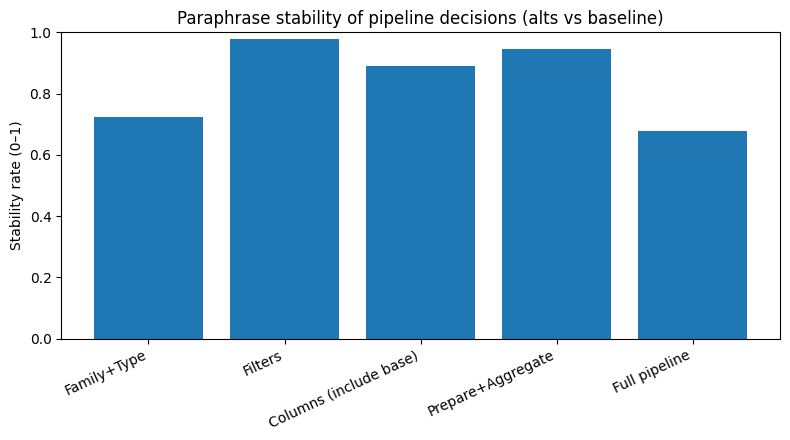

In [10]:
import matplotlib.pyplot as plt

labels = ["Family+Type", "Filters", "Columns (include base)", "Prepare+Aggregate", "Full pipeline"]
values = [
    alts["same_family_type"].mean(),
    alts["same_filters"].mean(),
    alts["columns_include_base"].mean(),
    alts["same_prepare_aggregate"].mean(),
    alts["all_three_ok"].mean(),
]

plt.figure(figsize=(8,4.5))
plt.bar(labels, values)
plt.ylim(0,1)
plt.xticks(rotation=25, ha="right")
plt.ylabel("Stability rate (0–1)")
plt.title("Paraphrase stability of pipeline decisions (alts vs baseline)")
plt.tight_layout()
plt.show()

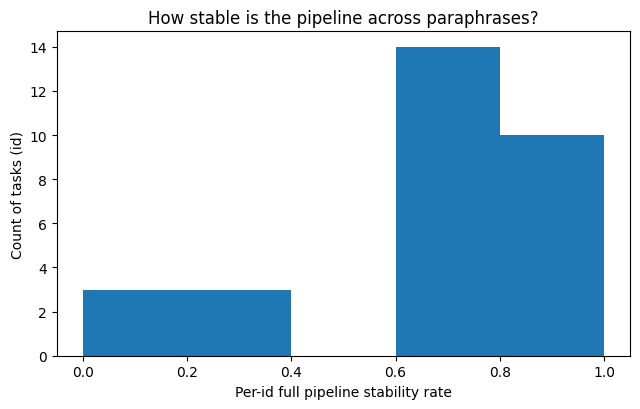

In [11]:
per_id = alts.groupby("id", as_index=False).agg(rate_all=("all_three_ok", "mean"))
plt.figure(figsize=(6.5,4.2))
plt.hist(per_id["rate_all"], bins=np.linspace(0,1,6))
plt.xlabel("Per-id full pipeline stability rate")
plt.ylabel("Count of tasks (id)")
plt.title("How stable is the pipeline across paraphrases?")
plt.tight_layout()
plt.show()